# Overview and Table of Contents
1. [Pull in datasets and clean](#1) <br>
    a. [Fixing 2018](#1) <br>
    b. [Bringing in additional vars for all 3 years](#2) <br>
    c. [Preliminary EDA](#11) <br>
    d. [Gathering several features separately](#12) <br>
    e. [Final file merging and finishing touches](#3) <br>
2. [EDA](#4) <br>
    a. [Numerical description](#4) <br>
    b. [Graphical description](#5) <br>
3. [Regression and Prediction](#6) <br>
    a. [Elementary models](#6) <br>
    b. [More complex models](#7) <br>
    c. [Interaction effects](#8) <br>
    d. [Rerunning the models with interactions](#9) <br>
    e. [Cluster regression](#10) <br>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## Pull in Datasets <a id="1"> </a> 

We chose to get county data for 2017, 2018, and 2019. 
For 2017 and 2019, we had found a nicely put together site that combined mostly ACS data for those years (linked [here](https://www.ahrq.gov/sdoh/data-analytics/sdoh-data.html#download)), but the 2018 file was missing. Knowing this, we began by piecing together the same features present in 2017 and 2019 into a cumulative 2018 file. This is where we start below.

Another side note: the target value data (referred to as CMS or MMD from here on out) contains the ED visit rates and some basic information on the counties it has values for. This dataset can be found [here](https://data.cms.gov/tools/mapping-medicare-disparities-by-population).

In [2]:
# Reading in two files that serve as a basis for work going forward
# Race_2018 is from the ACS and gives race breakdowns for each county
# SDOH_2018_WIP is just a list of all the county names in America, their fips codes, states, etc.
# Note: the df _2018 will serve as the working df where all joins will be made going forward for a bit

race = pd.read_csv("Race_2018.csv")
_2018 = pd.read_excel("SDOH_2018_WIP.xlsx")

In [3]:
# Extracting the actual FIPS from the GEO_ID
# Also renaming a column for ease of access in next step

index = race['Geography'].str.slice(-5).astype(int)
race.set_index(index, inplace = True)
del race['Geography']
del race['Geographic Area Name']
race.rename(columns = {"Estimate!!Total": "Total"}, inplace = True)

In [4]:
# Turning raw counts to proportions

for column in race.columns:
    if(column == "Total"): continue
    race[column] /= race["Total"]
race.head()

Total  Estimate!!Total!!White alone  \
Geography                                           
1003       218022.0                      0.861193   
1015       114277.0                      0.744209   
1043        83442.0                      0.942487   
1049        71385.0                      0.842712   
1051        81887.0                      0.740313   

           Estimate!!Total!!Black or African American alone  \
Geography                                                     
1003                                               0.094275   
1015                                               0.216465   
1043                                               0.010858   
1049                                               0.018701   
1051                                               0.208983   

           Estimate!!Total!!American Indian and Alaska Native alone  \
Geography                                                             
1003                                                0.005853          
1015                                                0.000936          
1043                                                0.003607          
1049                                                0.012159          
1051                                                0.004213          

           Estimate!!Total!!Asian alone  \
Geography                                 
1003                           0.010724   
1015                           0.003728   
1043                           0.001989   
1049                           0.002423   
1051                           0.006375   

           Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone  \
Geography                                                                      
1003                                                0.000206                   
1015                                                0.000000                   
1043                                                0.000000                   
1049                                                0.000000                   
1051                                                0.000000                   

           Estimate!!Total!!Some other race alone  \
Geography                                           
1003                                     0.011861   
1015                                     0.010343   
1043                                     0.016383   
1049                                     0.106227   
1051                                     0.016352   

           Estimate!!Total!!Two or more races  \
Geography                                       
1003                                 0.015888   
1015                                 0.024318   
1043                                 0.024676   
1049                                 0.017777   
1051                                 0.023764   

           Estimate!!Total!!Two or more races!!Two races including Some other race  \
Geography                                                                            
1003                                                0.000812                         
1015                                                0.007368                         
1043                                                0.004015                         
1049                                                0.000000                         
1051                                                0.000684                         

           Estimate!!Total!!Two or more races!!Two races excluding Some other race, and three or more races  
Geography                                                                                                    
1003                                                0.015076                                                 
1015                                                0.016950                                                 
1043                                                0.020661                    

In [5]:
# Dropping columns determined to be no longer necessary

del race["Estimate!!Total!!Two or more races!!Two races including Some other race"]
del race["Estimate!!Total!!Two or more races!!Two races excluding Some other race, and three or more races"]
del race['Total']
race.head()

Estimate!!Total!!White alone  \
Geography                                 
1003                           0.861193   
1015                           0.744209   
1043                           0.942487   
1049                           0.842712   
1051                           0.740313   

           Estimate!!Total!!Black or African American alone  \
Geography                                                     
1003                                               0.094275   
1015                                               0.216465   
1043                                               0.010858   
1049                                               0.018701   
1051                                               0.208983   

           Estimate!!Total!!American Indian and Alaska Native alone  \
Geography                                                             
1003                                                0.005853          
1015                                                0.000936          
1043                                                0.003607          
1049                                                0.012159          
1051                                                0.004213          

           Estimate!!Total!!Asian alone  \
Geography                                 
1003                           0.010724   
1015                           0.003728   
1043                           0.001989   
1049                           0.002423   
1051                           0.006375   

           Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone  \
Geography                                                                      
1003                                                0.000206                   
1015                                                0.000000                   
1043                                                0.000000                   
1049                                                0.000000                   
1051                                                0.000000                   

           Estimate!!Total!!Some other race alone  \
Geography                                           
1003                                     0.011861   
1015                                     0.010343   
1043                                     0.016383   
1049                                     0.106227   
1051                                     0.016352   

           Estimate!!Total!!Two or more races  
Geography                                      
1003                                 0.015888  
1015                                 0.024318  
1043                                 0.024676  
1049                                 0.017777  
1051                                 0.023764

In [6]:
# This reformats the names to get rid of the Estimate!!Total!! part and then renames to match the 2017 and 2019 files

new_names = []
for column in race.columns:
    new_names.append(column[17:])
race.columns = new_names

rename_dict = {"White alone": "ACS_PCT_WHITE", "Black or African American alone": "ACS_PCT_BLACK", 
               "American Indian and Alaska Native alone": "ACS_PCT_AIAN", "Asian alone": "ACS_PCT_ASIAN",
            "Native Hawaiian and Other Pacific Islander alone": "ACS_PCT_NHPI", "Some other race alone": "ACS_PCT_OTHER_RACE",
              "Two or more races": "ACS_PCT_MULT_RACE"}
race.rename(columns = rename_dict, inplace = True)

In [7]:
# Housekeeping for homogeneity

race.index.name = "COUNTYFIPS"
print(race.shape)
print(_2018.shape)

(838, 7)
(3232, 5)


In [8]:
# Merging and checking results

_2018 = pd.merge(_2018, race, on = 'COUNTYFIPS', how = 'left')
print(_2018.shape)
_2018.head()

(3232, 12)


YEAR  COUNTYFIPS  STATEFIPS    STATE          COUNTY  ACS_PCT_WHITE  \
0  2018        1001          1  Alabama  Autauga County            NaN   
1  2018        1003          1  Alabama  Baldwin County       0.861193   
2  2018        1005          1  Alabama  Barbour County            NaN   
3  2018        1007          1  Alabama     Bibb County            NaN   
4  2018        1009          1  Alabama   Blount County            NaN   

   ACS_PCT_BLACK  ACS_PCT_AIAN  ACS_PCT_ASIAN  ACS_PCT_NHPI  \
0            NaN           NaN            NaN           NaN   
1       0.094275      0.005853       0.010724      0.000206   
2            NaN           NaN            NaN           NaN   
3            NaN           NaN            NaN           NaN   
4            NaN           NaN            NaN           NaN   

   ACS_PCT_OTHER_RACE  ACS_PCT_MULT_RACE  
0                 NaN                NaN  
1            0.011861           0.015888  
2                 NaN                NaN  
3                 NaN                NaN  
4                 NaN                NaN

In [9]:
# Now that we have merged in race, we will merge in age information
# Age_2018.csv is from the ACS
# We will also drop the 1st row because it only serves to describe the column codes seen below in the usecols list
# This process with the age df will be used for a lot of the other merges as well
# The columns included past GEO_ID in order are Total Population, Number of People above 65, and Median Age

age = pd.read_csv("Age_2018.csv", usecols = ["GEO_ID", "S0101_C01_001E", "S0101_C01_030E", "S0101_C01_032E"])
age.drop(labels = 0, axis = 0, inplace = True)

In [10]:
# Fixing GEO_ID like before

index = age['GEO_ID'].str.slice(-5).astype(int)
age.set_index(index, inplace = True)
age.index.name = "COUNTYFIPS"
del age['GEO_ID']
age.head()

S0101_C01_001E S0101_C01_030E S0101_C01_032E
COUNTYFIPS                                             
1003               218022          44443           44.0
1015               114277          20515           40.1
1043                83442          15541           40.6
1049                71385          12261           39.5
1051                81887          12299           38.4

In [11]:
# Making a new series. This divides the # of people above 65 by total population. Updating naming conventions as well

percents = age['S0101_C01_030E'].astype(int) / age['S0101_C01_001E'].astype(int)
age['ACS_PCT_AGE_ABOVE65'] = percents * 100
age.rename(columns = {'S0101_C01_032E':'ACS_MEDIAN_AGE'}, inplace = True)
del age['S0101_C01_001E']
del age['S0101_C01_030E']

In [12]:
# Merging

_2018 = pd.merge(_2018, age, on = 'COUNTYFIPS', how = 'left')
_2018.head()

YEAR  COUNTYFIPS  STATEFIPS    STATE          COUNTY  ACS_PCT_WHITE  \
0  2018        1001          1  Alabama  Autauga County            NaN   
1  2018        1003          1  Alabama  Baldwin County       0.861193   
2  2018        1005          1  Alabama  Barbour County            NaN   
3  2018        1007          1  Alabama     Bibb County            NaN   
4  2018        1009          1  Alabama   Blount County            NaN   

   ACS_PCT_BLACK  ACS_PCT_AIAN  ACS_PCT_ASIAN  ACS_PCT_NHPI  \
0            NaN           NaN            NaN           NaN   
1       0.094275      0.005853       0.010724      0.000206   
2            NaN           NaN            NaN           NaN   
3            NaN           NaN            NaN           NaN   
4            NaN           NaN            NaN           NaN   

   ACS_PCT_OTHER_RACE  ACS_PCT_MULT_RACE ACS_MEDIAN_AGE  ACS_PCT_AGE_ABOVE65  
0                 NaN                NaN            NaN                  NaN  
1            0.011861           0.015888           44.0             20.38464  
2                 NaN                NaN            NaN                  NaN  
3                 NaN                NaN            NaN                  NaN  
4                 NaN                NaN            NaN                  NaN

In [13]:
# GINI_2018 is an ACS file that contains information on gini index of income inequality

gini = pd.read_csv("GINI_2018.csv")

In [14]:
# Housekeeping and renaming

index = gini['Geography'].str.slice(-5).astype(int)
gini.set_index(index, inplace = True)
gini.index.name = "COUNTYFIPS"
del gini['Geography']
gini.rename(columns = {"Estimate!!Gini Index": 'ACS_GINI_INDEX'}, inplace = True)

In [15]:
# Merging

_2018 = pd.merge(_2018, gini, on = 'COUNTYFIPS', how = 'left')
_2018.head()

YEAR  COUNTYFIPS  STATEFIPS    STATE          COUNTY  ACS_PCT_WHITE  \
0  2018        1001          1  Alabama  Autauga County            NaN   
1  2018        1003          1  Alabama  Baldwin County       0.861193   
2  2018        1005          1  Alabama  Barbour County            NaN   
3  2018        1007          1  Alabama     Bibb County            NaN   
4  2018        1009          1  Alabama   Blount County            NaN   

   ACS_PCT_BLACK  ACS_PCT_AIAN  ACS_PCT_ASIAN  ACS_PCT_NHPI  \
0            NaN           NaN            NaN           NaN   
1       0.094275      0.005853       0.010724      0.000206   
2            NaN           NaN            NaN           NaN   
3            NaN           NaN            NaN           NaN   
4            NaN           NaN            NaN           NaN   

   ACS_PCT_OTHER_RACE  ACS_PCT_MULT_RACE ACS_MEDIAN_AGE  ACS_PCT_AGE_ABOVE65  \
0                 NaN                NaN            NaN                  NaN   
1            0.011861           0.015888           44.0             20.38464   
2                 NaN                NaN            NaN                  NaN   
3                 NaN                NaN            NaN                  NaN   
4                 NaN                NaN            NaN                  NaN   

   ACS_GINI_INDEX  
0             NaN  
1          0.4725  
2             NaN  
3             NaN  
4             NaN

In [16]:
# Decided to have a df for total population so we don't have to use each file's column every time

total_pop = pd.read_csv("age_2018.csv", usecols = ['GEO_ID', 'S0101_C01_001E'])
total_pop.drop(labels = 0, axis = 0, inplace = True)
index = total_pop['GEO_ID'].str.slice(-5).astype(int)
total_pop.set_index(index, inplace = True)
total_pop.index.name = "COUNTYFIPS"
del total_pop['GEO_ID']
total_pop.rename(columns = {'S0101_C01_001E':'Total'}, inplace = True)
total_pop['Total'] = total_pop['Total'].astype(int)

In [17]:
# This ACS dataset is about the number of children living with their grandparents as primary caregivers

grandparents = pd.read_csv("Grandparents_2018.csv")
grandparents.drop(labels = 0, axis = 0, inplace = True)
index = grandparents['GEO_ID'].str.slice(-5).astype(int)
grandparents.set_index(index, inplace = True)
del grandparents['GEO_ID']
grandparents.index.name = 'COUNTYFIPS'

# This introduces the total population column into the df; this will also be done going forward quite often
grandparents = pd.merge(grandparents, total_pop, on = 'COUNTYFIPS', how = 'inner')
grandparents['ACS_PCT_CHILDREN_GRANDPARENT'] = grandparents['B10001_001E'].astype(float) / grandparents['Total'].astype(int)
grandparents.drop(labels = ['B10001_001E', 'Total'], axis = 1, inplace = True)

In [18]:
# Merging

_2018 = pd.merge(_2018, grandparents, on = 'COUNTYFIPS', how = 'left')

In [19]:
# Since the process of fixing the FIPS code on ACS files is mostly the same across all files, we pulled out the process

"""
Takes in the direct access to a dataframe as its df input.
Takes in the label for the the GEO_ID equivalent in the curr_label param.
Returns nothing but modifies the df directly so its in a standard form
"""
def fix_geo(df, curr_label):
    index = df[curr_label].str.slice(-5).astype(int)
    df.set_index(index, inplace = True)
    del df[curr_label]
    df.index.name = "COUNTYFIPS"

In [20]:
# Bringing in a dataset on various educational attainment levels

education = pd.read_csv("Education_2018.csv", usecols = ['GEO_ID', 'S1501_C01_006E', 'S1501_C01_015E'])
education.drop(labels = 0, axis = 0, inplace = True)
fix_geo(education, "GEO_ID") #Call to the function defined above

# Engineering the percentage
education['ACS_PCT_POSTHS_ED'] = education['S1501_C01_015E'].astype(float) / education['S1501_C01_006E'].astype(int) * 100
education.drop(labels = ['S1501_C01_006E', 'S1501_C01_015E'], axis = 1, inplace = True)

C:\Users\24tsagaj\AppData\Local\Temp\ipykernel_11208\1138636601.py:3: DtypeWarning: Columns (22,58) have mixed types. Specify dtype option on import or set low_memory=False.
  education = pd.read_csv("Education_2018.csv", usecols = ['GEO_ID', 'S1501_C01_006E', 'S1501_C01_015E'])


In [21]:
# Merging

_2018 = pd.merge(_2018, education, on = 'COUNTYFIPS', how = 'left')

The next dataset is the only dataset we found from the County Business Patterns government webpage (either to be referred as CBP or CCBP). Paths to the 2018 datasets can be traced from this [link](https://www.census.gov/data/datasets/2018/econ/cbp/2018-cbp.html).

In [22]:
# Merging in a dataset about prevalent industries in a county. This dataset is not from the ACS. (From the CBP)
# The process for cleaning this one is a little bit different than the rest.

industry = pd.read_csv("industry_2018.csv", dtype = {'fipstate': object, 'fipscty': object})

# We will not need these metrics
industry = industry.drop(['qp1_nf', 'qp1',
       'ap_nf', 'ap', 'est', 'n<5', 'n5_9', 'n10_19', 'n20_49', 'n50_99',
       'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1', 'n1000_2',
       'n1000_3', 'n1000_4', 'censtate', 'cencty', 'emp_nf'], axis = 1)

# Those columns held the 2-digit state code and the 3-digit county identifier, so we concatenated the values
industry['COUNTYFIPS'] = industry['fipstate'] + industry['fipscty']
del industry['fipstate']
del industry['fipscty']

# There are varying levels of NAICS classifications, so we only want specificity to 4 digits 
# (because that's what 2017 and 2019 have)
industry = industry[industry['naics'].str.match('[0-9][0-9][0-9][0-9]//')]

# Counties have several entries in accordance to the several industry groupings. We will group accordingly
ctys = industry.groupby('COUNTYFIPS')

# Traversing the df to find the highest employed industry by county.
# Labels holds the county labels and max_ind holds the str value of the 4-digit NAICS code with highest employment
labels = []
max_ind = []
for name, group in ctys:
    labels.append(name)
    curr_max = 0
    max_indus = ""
    for row in group.index:
        if industry.loc[row]['emp'] > curr_max:
            max_indus = industry.loc[row]['naics']
            curr_max = industry.loc[row]['emp']
    max_ind.append(max_indus)

# Combining the above two lists into a df
industry_values = pd.DataFrame(data = max_ind, index = labels)

# Housekeeping
industry_values.index = industry_values.index.astype(int)
industry_values = industry_values.rename(columns = {0: 'CCBP_LARGE_INDUSTRY'})
industry_values['CCBP_LARGE_INDUSTRY'] = industry_values['CCBP_LARGE_INDUSTRY'].str.slice(0,-2)
industry_values.index.name = 'COUNTYFIPS'

In [23]:
# Finally merge it in
_2018 = pd.merge(_2018, industry_values, on = 'COUNTYFIPS', how = 'left')

Also important to note is our use of data from County Health Rankings & Roadmaps (CHR). This contains a plethora of data of various social determinants found [here](https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation/national-data-documentation-2010-2019).

In [24]:
# We only will take the info on segregation indices for now and will take some other things later

segregation = pd.read_csv("CHR_2018.csv", header = 1, usecols = ['v142_rawvalue', 'fipscode'])
segregation = segregation.drop(labels = 0, axis = 0)
segregation = segregation.rename(columns = {'fipscode': "COUNTYFIPS", 'v142_rawvalue':'CHR_SEGREG_NON_WHITE'})
segregation.index = segregation['COUNTYFIPS']
del segregation['COUNTYFIPS']

In [25]:
# Merging

_2018 = pd.merge(_2018, segregation, how = 'left', on = 'COUNTYFIPS')

In [26]:
# Median Household Income data from the ACS. The process divides by the average number of people in a household (2.53) to get
# per capita income

housing = pd.read_csv('Housing_2018.csv', usecols = ['GEO_ID', 'S1902_C03_001E'])
housing = housing.drop(labels = 0, axis = 0)
fix_geo(housing, 'GEO_ID')
housing['S1902_C03_001E'] = round(housing['S1902_C03_001E'].astype(int) / 2.53)
housing = housing.rename(columns = {'S1902_C03_001E': 'ACS_PER_CAPITA_INC'})

In [27]:
# Merging

_2018 = pd.merge(_2018, housing, on = 'COUNTYFIPS', how = 'left')

In [28]:
# Unemployment rate data from the ACS

unemployment = pd.read_csv('employment_2018.csv', usecols = ['GEO_ID', 'S2301_C04_001E'])
unemployment = unemployment.drop(labels = 0, axis = 0)
fix_geo(unemployment, 'GEO_ID')
unemployment = unemployment.rename(columns = {'S2301_C04_001E': 'ACS_PCT_UNEMPLOY'})

In [29]:
# Final merging

_2018 = pd.merge(_2018, unemployment, on = 'COUNTYFIPS', how = 'left')

In [30]:
# Writing to an intermediate file to preserve this step in the process

_2018.to_csv('SDOH_2018_Data.csv', index = False)

Now that we have a feature list put together for 2018, we can bring in the aforementioned nicely-formatted tables from 2017 and 2019 along with another skeleton file for 2018 that has a list of county names and basic FIPS info, etc. with it.

In [31]:
# Reading in all three files for all 3 years

_2017 = pd.read_excel('2017.xlsx', sheet_name = 1)
_2018 = pd.read_csv('2018.csv')
_2019 = pd.read_excel('2019.xlsx', sheet_name = 1)

In [32]:
# These are the columns we had in the nice data

_2017.columns

Index(['YEAR', 'COUNTYFIPS', 'STATEFIPS', 'STATE', 'COUNTY', 'ACS_MEDIAN_AGE',
       'ACS_PCT_AGE_ABOVE65', 'ACS_PCT_AIAN', 'ACS_PCT_ASIAN', 'ACS_PCT_BLACK',
       'ACS_PCT_HISPANIC', 'ACS_PCT_MULT_RACE', 'ACS_PCT_NHPI',
       'ACS_PCT_OTHER_RACE', 'ACS_PCT_WHITE', 'ACS_PCT_CHILDREN_GRANDPARENT',
       'ACS_PCT_UNEMPLOY', 'ACS_GINI_INDEX', 'ACS_PER_CAPITA_INC',
       'ACS_PCT_POSTHS_ED', 'CCBP_LARGE_INDUSTRY', 'CHR_SEGREG_NON_WHITE'],
      dtype='object')

In [33]:
#Dropping territorial records that don't have data anywhere in the 2018 or the CMS files
_2017 = _2017.drop(labels = range(3142, 3232), axis = 0)
_2019 = _2019.drop(labels = range(3142, 3232), axis = 0)

#Imputing mode and mean for Industry and Segregation respectively for 2017 and 2019 (only features with missing values)
_2017.loc[_2017['CCBP_LARGE_INDUSTRY'].isna(), 'CCBP_LARGE_INDUSTRY'] = 7225
_2017.loc[_2017['CHR_SEGREG_NON_WHITE'].isna(), 'CHR_SEGREG_NON_WHITE'] = 31

_2019.loc[_2019['CCBP_LARGE_INDUSTRY'].isna(), 'CCBP_LARGE_INDUSTRY'] = 7225
_2019.loc[_2019['CHR_SEGREG_NON_WHITE'].isna(), 'CHR_SEGREG_NON_WHITE'] = 31

In [34]:
# Write them to intermediate files to use much later

_2017.to_csv('2017.csv', index = False)
_2019.to_csv('2019.csv', index = False)

In [35]:
#Getting percentages to the same scale (i.e. turning 0.95 to 95%)

_2018[['ACS_PCT_WHITE',
       'ACS_PCT_BLACK', 'ACS_PCT_AIAN', 'ACS_PCT_ASIAN', 'ACS_PCT_NHPI',
       'ACS_PCT_OTHER_RACE', 'ACS_PCT_MULT_RACE']] = _2018[['ACS_PCT_WHITE',
       'ACS_PCT_BLACK', 'ACS_PCT_AIAN', 'ACS_PCT_ASIAN', 'ACS_PCT_NHPI',
       'ACS_PCT_OTHER_RACE', 'ACS_PCT_MULT_RACE']] * 100

From here on for a little bit, we will be reading in the geographic comparison tables.
Each file has a column for "GEOID" which is a bunch of numbers + FIPS code (last 5 digits).
Each file has selected counties that have specific ESTIMATES for whatever the table is trying to describe.
Each file has a set of records that are strictly for state-urban/rural summaries (which we took advantage of).
There is a manufactured FLAG column we added in excel to differentiate between the county values and the summary values.
The approach is to try and fill in with county values and anything left we aggregate the summary statistic for the whole state based on urban/rural status for that year.

[Geographic Comparison Tables](https://www.census.gov/acs/www/data/data-tables-and-tools/geographic-comparison-tables/)

In [36]:
# We will start with median age

ma_state = pd.read_csv('GCT0101.csv')
del ma_state['GEOID']
states_and_rural = ma_state['GEONAME'].str.split(' -- ', n = 1, expand = True)
ma_state = ma_state.set_index([states_and_rural[0].str.upper(), states_and_rural[1].str.lower()])

In [37]:
# CMS data with the analysis_values -- this is mainly included now so we get the urban/rural for each county
mmd_2018 = pd.read_csv('mmd_data_2018.csv')
mmd_2018.rename(columns = {"year": "YEAR", 'fips':"COUNTYFIPS", 'county':"COUNTY", 'state':"STATE"}, inplace = True)
_2018['STATE'] = _2018['STATE'].str.upper()

# Define a new df with this addition -- this is what we will use to get in the geo comparison tables for 2018
wip_2018 = pd.merge(mmd_2018, _2018, how = 'left', on = ['COUNTYFIPS', 'STATE', 'YEAR', 'COUNTY'])

# Drop strictly state info
wip_2018.drop(labels = wip_2018[wip_2018['COUNTY'].isna()].index, axis = 0, inplace = True)

In [38]:
# Filling in all NAs with summary for median age

import math
df1 = wip_2018.copy()
for index in df1.index:
    if math.isnan(df1.loc[index]['ACS_MEDIAN_AGE']):
        df1.loc[index, 'ACS_MEDIAN_AGE'] = ma_state.loc[df1.loc[index]['STATE'], df1.loc[index]['urban'].lower()]['ESTIMATE']

In [39]:
# Abstracting out the process

"""
Takes in a geo comparison table that was read from one of the files raw into the df parameter
Returns a "key" dataframe that has the summary for urban/rural per state
"""
def get_state_keys(df):
    split = df['GEONAME'].str.split(' -- ', n = 1, expand = True)
    df1 = df.copy()
    df1.set_index([split[0].str.upper(), split[1].str.lower()], inplace = True)
    del df1['GEONAME']
    return df1

"""
Takes in the main df (wip_2018) in df parameter so it can use the existing values as much as possible
Takes in the "key" dataframe returned from above in the keydf parameter
The target parameter takes a string value with what you're trying to fill
"""
def populate_values(df, keydf, target):
    df1 = df.copy()
    for index in df1.index:
        if math.isnan(df1.loc[index][target]):
            df1.loc[index, target] = keydf.loc[df1.loc[index]['STATE'], df1.loc[index]['urban'].lower()]['ESTIMATE']
    return df1

In [40]:
# Deleting all the columns very null-ridden to redo the process completely
wip_2018.drop(labels = ['ACS_PCT_WHITE', 'ACS_PCT_BLACK', 'ACS_PCT_AIAN', 'ACS_PCT_ASIAN', 'ACS_PCT_MULT_RACE', 
                        'ACS_PCT_NHPI',  'ACS_PCT_OTHER_RACE'], axis = 1, inplace = True)
del wip_2018['ACS_PCT_AGE_ABOVE65']
del wip_2018['ACS_PCT_POSTHS_ED']

In [41]:
"""
This function does the entire process of reading a file and filling in the most specific it can and imputing otherwise
Takes in the file name of the geographic comparison table in the filepath parameter
Takes in the desired new variable name (string) in the var_name param
Returns an updated df based on the current status of wip_2018 and the changes made in the function
"""
def do_process(filepath, var_name):
    df_orig = pd.read_csv(filepath, encoding = 'latin1')
    counties = df_orig.query('Flag == 0')
    states = df_orig.query('Flag == 1')
    fix_geo(counties, 'GEOID')
    counties = counties.rename(columns = {'ESTIMATE': var_name})
    del counties['GEONAME']
    del counties['Flag']
    keys = get_state_keys(states)
    del keys['GEOID']
    del keys['Flag']
    to_return = wip_2018.copy()
    to_return = pd.merge(to_return, counties, how = 'left', on = 'COUNTYFIPS')
    to_return = populate_values(to_return, keys, var_name)
    return to_return

In [42]:
# The following are calls to the above function for the vars dropped above. No info will be lost since the geo comparison
# tables are from the ACS; any data accessed before will be present and used in the process

wip_2018 = do_process('GCT0103.csv', 'ACS_PCT_AGE_ABOVE65')
wip_2018 = do_process('GCT0201.csv', 'ACS_PCT_WHITE')
wip_2018 = do_process('GCT0202.csv', 'ACS_PCT_BLACK')
wip_2018 = do_process('GCT0203.csv', 'ACS_PCT_AIAN')
wip_2018 = do_process('GCT0204.csv', 'ACS_PCT_ASIAN')
wip_2018 = do_process('GCT0205.csv', 'ACS_PCT_NHPI')
wip_2018 = do_process('GCT0206.csv', 'ACS_PCT_OTHER_RACE')
wip_2018 = do_process('GCT0207.csv', 'ACS_PCT_MULT_RACE')
wip_2018 = do_process('GCT1502.csv', 'ACS_PCT_POSTHS_ED')

wip_2018.isna().sum()

YEAR                               0
COUNTYFIPS                         0
COUNTY                             0
STATE                              0
urban                              0
analysis_value                     0
STATEFIPS                         30
ACS_MEDIAN_AGE                  2372
ACS_GINI_INDEX                  2372
ACS_PCT_CHILDREN_GRANDPARENT    2454
CCBP_LARGE_INDUSTRY              119
CHR_SEGREG_NON_WHITE             436
ACS_PER_CAPITA_INC              2372
ACS_PCT_UNEMPLOY                2372
ACS_PCT_AGE_ABOVE65                0
ACS_PCT_WHITE                      0
ACS_PCT_BLACK                      0
ACS_PCT_AIAN                       0
ACS_PCT_ASIAN                      0
ACS_PCT_NHPI                       0
ACS_PCT_OTHER_RACE                 0
ACS_PCT_MULT_RACE                  0
ACS_PCT_POSTHS_ED                  0
dtype: int64

In [43]:
# Trying to fill in segregation again since some counties were added and deleted in the merging process with the CMS set

del wip_2018['CHR_SEGREG_NON_WHITE']
segregation = pd.read_csv("CHR_2018.csv", header = 1, usecols = ['v142_rawvalue', 'fipscode'])
segregation = segregation.drop(labels = 0, axis = 0)
segregation = segregation.rename(columns = {'fipscode': "COUNTYFIPS", 'v142_rawvalue':'CHR_SEGREG_NON_WHITE'})
segregation.index = segregation['COUNTYFIPS']
del segregation['COUNTYFIPS']
temp = pd.merge(wip_2018, segregation, how = 'left', on = 'COUNTYFIPS')
wip_2018 = temp

In [44]:
# Trying to do the same with industry. The process is the same as above.

df = wip_2018.copy()
del df['CCBP_LARGE_INDUSTRY']
industry = pd.read_csv("industry_2018.csv", dtype = {'fipstate': object, 'fipscty': object})
industry = industry.drop(['qp1_nf', 'qp1',
       'ap_nf', 'ap', 'est', 'n<5', 'n5_9', 'n10_19', 'n20_49', 'n50_99',
       'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1', 'n1000_2',
       'n1000_3', 'n1000_4', 'censtate', 'cencty', 'emp_nf'], axis = 1)
industry['COUNTYFIPS'] = industry['fipstate'] + industry['fipscty']
del industry['fipstate']
del industry['fipscty']
industry = industry[industry['naics'].str.match('[0-9][0-9][0-9][0-9]//')]
ctys = industry.groupby('COUNTYFIPS')

labels = []
max_ind = []
for name, group in ctys:
    labels.append(name)
    curr_max = 0
    max_indus = ""
    for row in group.index:
        if industry.loc[row]['emp'] > curr_max:
            max_indus = industry.loc[row]['naics']
            curr_max = industry.loc[row]['emp']
    max_ind.append(max_indus)
    
industry_values = pd.DataFrame(data = max_ind, index = labels)
industry_values.index = industry_values.index.astype(int)
industry_values = industry_values.rename(columns = {0: 'CCBP_LARGE_INDUSTRY'})
industry_values['CCBP_LARGE_INDUSTRY'] = industry_values['CCBP_LARGE_INDUSTRY'].str.slice(0,-2)
industry_values.index.name = 'COUNTYFIPS'

temp = pd.merge(df, industry_values, on = 'COUNTYFIPS', how = 'left')
wip_2018 = temp

In [45]:
# Looking at the NA values across all years thus far. A lot of those don't have data in the geo comparison tables.
pd.concat([_2017, wip_2018, _2019]).isna().sum()

YEAR                               0
COUNTYFIPS                         0
STATEFIPS                         30
STATE                              0
COUNTY                             0
ACS_MEDIAN_AGE                  2372
ACS_PCT_AGE_ABOVE65                0
ACS_PCT_AIAN                       0
ACS_PCT_ASIAN                      0
ACS_PCT_BLACK                      0
ACS_PCT_HISPANIC                3205
ACS_PCT_MULT_RACE                  0
ACS_PCT_NHPI                       0
ACS_PCT_OTHER_RACE                 0
ACS_PCT_WHITE                      0
ACS_PCT_CHILDREN_GRANDPARENT    2454
ACS_PCT_UNEMPLOY                2372
ACS_GINI_INDEX                  2372
ACS_PER_CAPITA_INC              2372
ACS_PCT_POSTHS_ED                  0
CCBP_LARGE_INDUSTRY              108
CHR_SEGREG_NON_WHITE             427
urban                           6284
analysis_value                  6284
dtype: int64

In [46]:
# Merging in the CMS dataset for 2017 and 2019 as well

mmd_2017 = pd.read_csv('mmd_2017.csv')
mmd_2017.rename(columns = {"year": "YEAR", 'fips':"COUNTYFIPS", 'county':"COUNTY", 'state':"STATE"}, inplace = True)
_2017['STATE'] = _2017['STATE'].str.upper()
_2017 = pd.merge(mmd_2017, _2017, on = ['COUNTYFIPS', 'COUNTY', 'STATE'], how = 'inner')

mmd_2019 = pd.read_csv('mmd_2019.csv')
mmd_2019.rename(columns = {"year": "YEAR", 'fips':"COUNTYFIPS", 'county':"COUNTY", 'state':"STATE"}, inplace = True)
_2019['STATE'] = _2019['STATE'].str.upper()
_2019 = pd.merge(mmd_2019, _2019, on = ['COUNTYFIPS', 'COUNTY', 'STATE'], how = 'inner')

Refining overall dataset and looking at a variety of outside predictors to later bring together. <a id="2"> </a>

In [47]:
# Finally combining all 3 years into one df
all3 = pd.concat([_2017, wip_2018, _2019])

# Features thus far:
all3.columns

Index(['COUNTYFIPS', 'COUNTY', 'STATE', 'urban', 'analysis_value', 'YEAR',
       'STATEFIPS', 'ACS_MEDIAN_AGE', 'ACS_PCT_AGE_ABOVE65', 'ACS_PCT_AIAN',
       'ACS_PCT_ASIAN', 'ACS_PCT_BLACK', 'ACS_PCT_HISPANIC',
       'ACS_PCT_MULT_RACE', 'ACS_PCT_NHPI', 'ACS_PCT_OTHER_RACE',
       'ACS_PCT_WHITE', 'ACS_PCT_CHILDREN_GRANDPARENT', 'ACS_PCT_UNEMPLOY',
       'ACS_GINI_INDEX', 'ACS_PER_CAPITA_INC', 'ACS_PCT_POSTHS_ED',
       'CCBP_LARGE_INDUSTRY', 'CHR_SEGREG_NON_WHITE'],
      dtype='object')

In [48]:
# Dropping features that didn't have data available in the geo comparison tables

all3 = all3.drop(labels = ['ACS_PCT_HISPANIC', 'ACS_PCT_CHILDREN_GRANDPARENT'], axis = 1)
all3 = all3.drop(labels = ['ACS_PCT_UNEMPLOY', 'ACS_GINI_INDEX', 'ACS_PER_CAPITA_INC'], axis = 1)
all3.drop(labels = 'CHR_SEGREG_NON_WHITE', axis = 1, inplace = True)

In [49]:
# Imputing mode for industry for now

all3['CCBP_LARGE_INDUSTRY'].fillna(7225, inplace = True)

In [50]:
# Get unique indices

all3 = all3.reset_index().drop('index', axis = 1)

In [51]:
# Trying to do some preliminary feature engineering -- this is not that important

all3['ACS_PCT_NON_WHITE'] = (all3['ACS_PCT_AIAN'] + all3['ACS_PCT_ASIAN'] + all3['ACS_PCT_BLACK'] + all3['ACS_PCT_MULT_RACE'] \
                             + all3['ACS_PCT_NHPI'] + all3['ACS_PCT_OTHER_RACE'])

# Grouping of variables so we don't have to type them all out later
race_vars = ['ACS_PCT_AIAN',
       'ACS_PCT_ASIAN', 'ACS_PCT_BLACK', 'ACS_PCT_MULT_RACE', 'ACS_PCT_NHPI',
       'ACS_PCT_OTHER_RACE', 'ACS_PCT_WHITE']

means = all3.groupby('YEAR')[race_vars].agg('mean')

In [52]:
# Displaying mean values for race vals over the years
means

ACS_PCT_AIAN  ACS_PCT_ASIAN  ACS_PCT_BLACK  ACS_PCT_MULT_RACE  \
YEAR                                                                  
2017      1.769030       1.302651       9.071761           2.304428   
2018      1.784961       1.965772       8.539345           2.658440   
2019      1.805949       1.353615       9.113980           2.417579   

      ACS_PCT_NHPI  ACS_PCT_OTHER_RACE  ACS_PCT_WHITE  
YEAR                                                   
2017      0.083929            2.044989      83.423196  
2018      0.086739            2.376693      82.573947  
2019      0.089990            2.089027      83.129817

In [53]:
# Displaying correlations with analysis_value and each other to see effect individually and combined
all3[race_vars + ['analysis_value']].corr()

ACS_PCT_AIAN  ACS_PCT_ASIAN  ACS_PCT_BLACK  \
ACS_PCT_AIAN            1.000000      -0.055055      -0.123292   
ACS_PCT_ASIAN          -0.055055       1.000000       0.071567   
ACS_PCT_BLACK          -0.123292       0.071567       1.000000   
ACS_PCT_MULT_RACE       0.208774       0.423711      -0.055664   
ACS_PCT_NHPI            0.015343       0.438961      -0.037633   
ACS_PCT_OTHER_RACE     -0.027779       0.202985       0.017918   
ACS_PCT_WHITE          -0.304038      -0.327632      -0.820885   
analysis_value         -0.091874      -0.106736       0.301084   

                    ACS_PCT_MULT_RACE  ACS_PCT_NHPI  ACS_PCT_OTHER_RACE  \
ACS_PCT_AIAN                 0.208774      0.015343           -0.027779   
ACS_PCT_ASIAN                0.423711      0.438961            0.202985   
ACS_PCT_BLACK               -0.055664     -0.037633            0.017918   
ACS_PCT_MULT_RACE            1.000000      0.487136            0.169932   
ACS_PCT_NHPI                 0.487136      1.000000            0.037506   
ACS_PCT_OTHER_RACE           0.169932      0.037506            1.000000   
ACS_PCT_WHITE               -0.283497     -0.144520           -0.308043   
analysis_value              -0.052057     -0.066901           -0.053390   

                    ACS_PCT_WHITE  analysis_value  
ACS_PCT_AIAN            -0.304038       -0.091874  
ACS_PCT_ASIAN           -0.327632       -0.106736  
ACS_PCT_BLACK           -0.820885        0.301084  
ACS_PCT_MULT_RACE       -0.283497       -0.052057  
ACS_PCT_NHPI            -0.144520       -0.066901  
ACS_PCT_OTHER_RACE      -0.308043       -0.053390  
ACS_PCT_WHITE            1.000000       -0.182192  
analysis_value          -0.182192        1.000000

In [54]:
#Lumping together the strong positive from black and weak negatives from the others was not good
del all3['ACS_PCT_NON_WHITE']

In [55]:
# Trying making some "buckets" for counties based on whether or not they are above average in the nation in having
# a specific demographic. "Dominant race" is defined as the racial group that is highest above the average in the nation

dominant_race = []
for row in all3.index:
    above_average = []
    for race in race_vars:
        mean = means.loc[all3.loc[row]['YEAR']][race]
        diff = all3.loc[row][race] - mean
        if diff > 0:
            above_average.append(race)
    dominant_race.append(above_average)
    
all3['ACS_DOMINANT_RACE'] = pd.Series(dominant_race)

In [56]:
# Making buckets for race prevalences above the national average

aian = []
asian = []
black = []
mult = []
nhpi = []
other = []
white = []
for row in dominant_race:
    if 'ACS_PCT_AIAN' in row:
        aian.append(True)
    else:
        aian.append(False)
    if 'ACS_PCT_ASIAN' in row:
        asian.append(True)
    else:
        asian.append(False)
    if 'ACS_PCT_BLACK' in row:
        black.append(True)
    else:
        black.append(False)
    if 'ACS_PCT_MULT_RACE' in row:
        mult.append(True)
    else:
        mult.append(False)
    if 'ACS_PCT_NHPI' in row:
        nhpi.append(True)
    else:
        nhpi.append(False)
    if 'ACS_PCT_OTHER_RACE' in row:
        other.append(True)
    else:
        other.append(False)
    if 'ACS_PCT_WHITE' in row:
        white.append(True)
    else:
        white.append(False)
        
all3['ABOVE_AIAN'] = aian
all3['ABOVE_ASIAN'] = asian
all3['ABOVE_BLACK'] = black
all3['ABOVE_MULT_RACE'] = mult
all3['ABOVE_NHPI'] = nhpi
all3['ABOVE_OTHER_RACE'] = other
all3['ABOVE_WHITE'] = white

#Simple grouping so don't have to type all of these out later
above_vars = ['ABOVE_AIAN', 'ABOVE_ASIAN', 'ABOVE_BLACK', 'ABOVE_MULT_RACE', 'ABOVE_NHPI', 'ABOVE_OTHER_RACE', 'ABOVE_WHITE']
all3[above_vars] = all3[above_vars].astype(object)

In [57]:
# Writing to another intermediate file for now 

all3.to_csv('CONCATENATED1.csv', index = False)

Unfortunately, I accidentally deleted a file documenting intermediate steps in the process and was unable to recover it despite my best efforts. All that happened in the meantime, however, was the dropping of the following columns (none of the data was altered):
- CCBP_LARGE_INDUSTRY
- ABOVE_AIAN
- ABOVE_ASIAN
- ABOVE_BLACK
- ABOVE_MULT_RACE
- ABOVE_NHPI
- ABOVE_OTHER_RACE
- ABOVE_WHITE
- ACS_MEDIAN_AGE

This leaves us with the following columns in the next file:
- COUNTYFIPS
- COUNTY
- STATE
- urban
- analysis_value
- YEAR
- STATEFIPS
- ACS_PCT_AGE_ABOVE65
- ACS_PCT_AIAN
- ACS_PCT_ASIAN
- ACS_PCT_BLACK
- ACS_PCT_MULT_RACE
- ACS_PCT_NHPI
- ACS_PCT_OTHER_RACE
- ACS_PCT_WHITE
- ACS_PCT_POSTHS_ED
- ACS_DOMINANT_RACE

In [58]:
# Bringing in this new dataset and full CHR datasets for all 3 years
# Some warnings show up with dtypes. We will ignore for now and fix them later.
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

data = pd.read_csv('merge1.csv')

chr2017 = pd.read_csv('CHR_full_2017.csv')
chr2018 = pd.read_csv('CHR_full_2018.csv')
chr2019 = pd.read_csv('CHR_full_2019.csv')

In [59]:
# Combine the CHR data into one df
chr_all = pd.concat([chr2017, chr2018, chr2019])
chr_all.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2017                        NaN   
2         Alabama         2017                        NaN   
3  Autauga County         2017                          1   
4  Baldwin County         2017                          1   

  Premature death raw value Premature death numerator  \
0             v001_rawvalue            v001_numerator   
1                    6601.2                   3439572   
2                    9573.2                     75262   
3                    9158.2                       830   
4                    7393.9                      2573   

  Premature death denominator  ... Severe housing cost burden raw value  \
0            v001_denominator  ...                                  NaN   
1                   890407742  ...                                  NaN   
2                    13597347  ...                                  NaN   
3                      157247  ...                                  NaN   
4                      543456  ...                                  NaN   

  Severe housing cost burden numerator Severe housing cost burden denominator  \
0                                  NaN                                    NaN   
1                                  NaN                                    NaN   
2                                  NaN                                    NaN   
3                                  NaN                                    NaN   
4                                  NaN                                    NaN   

  Severe housing cost burden CI low Severe housing cost burden CI high  \
0                               NaN                                NaN   
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN                                NaN   

  Opioid hospital visits raw value Opioid hospital visits numerator  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

  Opioid hospital visits denominator Opioid hospital visits CI low  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   

  Opioid hospital visits CI high  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  

[5 rows x 575 columns]

In [60]:
# Some columns off the bat appear useless and will drop (including all the CI columns)
chr_all = chr_all.drop(labels = ['State FIPS Code', 'County Ranked (Yes=1/No=0)', 
                       'Severe housing cost burden raw value', 'Severe housing cost burden numerator', 
                       'Severe housing cost burden denominator', 'Severe housing cost burden CI low',
                       'Severe housing cost burden CI high','Opioid hospital visits raw value',
                       'Opioid hospital visits numerator','Opioid hospital visits denominator','Opioid hospital visits CI low',
                       'Opioid hospital visits CI high'], axis = 1)

all_ci = []
for column in chr_all.columns:
    if(column.find('CI') > -1):
        all_ci.append(column)

chr_all = chr_all.drop(labels = all_ci, axis = 1)
chr_all = chr_all.reset_index().drop(labels = 'index', axis = 1)
chr_all.shape

(9586, 365)

In [61]:
# Row 0 is supposed to be descriptions of the above columns. If even those entries are null, it's a good sign most of the
# data is also going to be null. Proceeded to weed out and drop those

fake_columns = []
for column in chr_all.columns:
    if str(chr_all.loc[0][column]) == 'nan':
        fake_columns.append(column)
        
chr_all.drop(labels = fake_columns, axis = 1, inplace = True)

In [62]:
# Some of these "header rows" got concated into the middle of the combined df. 
# Fixing and repeating the process from above on those

chr_all.query('Name == "county"')
fake_columns1 = []
fake_columns2 = []
for column in chr_all.columns:
    if(str(chr_all.loc[3196][column]) == 'nan'):
        fake_columns1.append(column)
    if str(chr_all.loc[6391][column]) == 'nan':
        fake_columns2.append(column)
        
chr_all.drop(labels = (fake_columns1 + fake_columns2), axis = 1, inplace = True)
chr_all.drop_duplicates(inplace = True)

In [63]:
# More criteria for null-ridden: If > 3000 entries (~1/3) of the entries are null, remove

missing = []
for column in chr_all.columns:
    if chr_all[column].isna().sum() > 3000:
        missing.append(column)
chr_all.drop(labels = missing, axis = 1, inplace = True)

#These rows are summaries for the whole nation. Will not be useful to us
chr_all.drop(labels = [0, 1], axis = 0, inplace = True)

In [64]:
# There is no need for these columns because there is always a column that shows the two divided as a proportion
num_den = []
for column in chr_all.columns:
    if 'numerator' in column or 'denominator' in column:
        num_den.append(column)
        
chr_all.drop(labels = num_den, axis = 1, inplace = True)

In [65]:
# We are now left with very few columns and will drop those that don't seem too useful or that we have already

chr_all.drop(labels = ['Uninsured adults raw value','Uninsured children raw value'], axis = 1, inplace = True)
chr_all.drop(labels = ['Firearm fatalities raw value', 'Population raw value',
       '% not proficient in English raw value'], axis = 1, inplace = True)
chr_all.drop(labels = ['% below 18 years of age raw value', '% 65 and older raw value',
       '% Non-Hispanic African American raw value'], axis = 1, inplace = True)
chr_all.drop(labels = [
       '% American Indian and Alaskan Native raw value', '% Asian raw value'], axis = 1, inplace = True)
chr_all.drop(labels = ['% Females raw value',
       '% Rural raw value', '% Non-Hispanic white raw value'], axis = 1, inplace = True)
chr_all.drop(labels = [
       '% Native Hawaiian/Other Pacific Islander raw value'], axis = 1, inplace = True)
chr_all.drop(labels = ['Premature death raw value', 'Low birthweight raw value','Alcohol-impaired driving deaths raw value',
                       'Sexually transmitted infections raw value', 'Teen births raw value', 'Dentists raw value',
                       'Preventable hospital stays raw value', 'Mammography screening raw value', 
                       'High school graduation raw value', 'Some college raw value', 'Children in poverty raw value', 
                       'Children in single-parent households raw value', 'Social associations raw value', 
                       'Injury deaths raw value', 'Driving alone to work raw value', 'Long commute - driving alone raw value',
                       'Premature age-adjusted mortality raw value', 'Frequent physical distress raw value',
                       'Frequent mental distress raw value', 'Diabetes prevalence raw value', 'HIV prevalence raw value',
                       'Insufficient sleep raw value', 'Other primary care providers raw value',
                       'Children eligible for free or reduced price lunch raw value'], axis = 1, inplace = True)

chr_all.reset_index(inplace = True)
del chr_all['index']
del chr_all['Mental health providers raw value']
del chr_all['Motor vehicle crash deaths raw value']
del chr_all['Residential segregation - non-white/white raw value']

In [66]:
# This is the df with the running dataset for all 3 years

data.columns

Index(['COUNTYFIPS', 'COUNTY', 'STATE', 'urban', 'analysis_value', 'YEAR',
       'STATEFIPS', 'ACS_PCT_AGE_ABOVE65', 'ACS_PCT_AIAN', 'ACS_PCT_ASIAN',
       'ACS_PCT_BLACK', 'ACS_PCT_MULT_RACE', 'ACS_PCT_NHPI',
       'ACS_PCT_OTHER_RACE', 'ACS_PCT_WHITE', 'ACS_PCT_POSTHS_ED',
       'ACS_DOMINANT_RACE'],
      dtype='object')

In [67]:
# Preparing for merge and merging CHR into the running dataset

chr_all.rename({'County FIPS Code': 'COUNTYFIPS', 'Name': 'COUNTY', 'State Abbreviation':'STATE', 'Release Year': 'YEAR'}, 
               axis = 1, inplace = True)
del chr_all['STATE']
del chr_all['COUNTYFIPS']
del chr_all['% Hispanic raw value']
chr_all.rename({'5-digit FIPS Code':'COUNTYFIPS'}, axis = 1, inplace = True)
chr_all.drop(labels = 2460, axis = 0, inplace = True) # Missed a summary row
chr_all['COUNTYFIPS'] = chr_all['COUNTYFIPS'].astype(int)

#The selected features of the CHR dataset:
chr_all.columns

Index(['COUNTYFIPS', 'COUNTY', 'YEAR', 'Poor or fair health raw value',
       'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value',
       'Physical inactivity raw value',
       'Access to exercise opportunities raw value',
       'Excessive drinking raw value', 'Uninsured raw value',
       'Primary care physicians raw value', 'Unemployment raw value',
       'Income inequality raw value', 'Violent crime raw value',
       'Air pollution - particulate matter raw value',
       'Drinking water violations raw value',
       'Severe housing problems raw value', 'Food insecurity raw value',
       'Limited access to healthy foods raw value',
       'Median household income raw value'],
      dtype='object')

In [68]:
# And how null they are

chr_all.isna().sum()

COUNTYFIPS                                        0
COUNTY                                            0
YEAR                                              7
Poor or fair health raw value                     9
Poor physical health days raw value               9
Poor mental health days raw value                 9
Adult smoking raw value                           9
Adult obesity raw value                           7
Food environment index raw value                 45
Physical inactivity raw value                     7
Access to exercise opportunities raw value       92
Excessive drinking raw value                      9
Uninsured raw value                              10
Primary care physicians raw value               408
Unemployment raw value                           10
Income inequality raw value                      11
Violent crime raw value                         544
Air pollution - particulate matter raw value    111
Drinking water violations raw value             157
Severe housi

In [69]:
# Further housekeeping and continuation

chr_all.rename({'county':'COUNTY'}, axis = 1, inplace = True)
chr_all.drop(labels = {78, 83, 89, 90, 92, 95, 2454}, axis = 0, inplace = True) # These are not counties in the running set
chr_all['YEAR'] = chr_all['YEAR'].astype(int)

total = pd.merge(data, chr_all, how = 'left', on = ['COUNTYFIPS', 'COUNTY', 'YEAR'])

In [70]:
# Looking at how many counties were missing in the CHR set compared to the running dataset

total.isna().sum()

COUNTYFIPS                                        0
COUNTY                                            0
STATE                                             0
urban                                             0
analysis_value                                    0
YEAR                                              0
STATEFIPS                                         0
ACS_PCT_AGE_ABOVE65                               0
ACS_PCT_AIAN                                      0
ACS_PCT_ASIAN                                     0
ACS_PCT_BLACK                                     0
ACS_PCT_MULT_RACE                                 0
ACS_PCT_NHPI                                      0
ACS_PCT_OTHER_RACE                                0
ACS_PCT_WHITE                                     0
ACS_PCT_POSTHS_ED                                 0
ACS_DOMINANT_RACE                                 0
Poor or fair health raw value                   165
Poor physical health days raw value             165
Poor mental 

In [71]:
#Getting indices of state summary statistics to impute them for the missing CHR values

states = data['STATE'].str.lower().unique()
states_index = []
for row in chr_all.index:
    if chr_all.loc[row]['COUNTY'].lower() in states:
        states_index.append(row)
        
states_df = chr_all.loc[states_index]
states_df['COUNTY'] = states_df['COUNTY'].str.lower()
states_df.set_index(['COUNTY', 'YEAR'], inplace = True)

In [72]:
#Ones that need to be filled in that we want to fill in
empties = ['Poor or fair health raw value',
       'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value',
       'Physical inactivity raw value',
       'Access to exercise opportunities raw value',
       'Excessive drinking raw value', 'Uninsured raw value',
       'Primary care physicians raw value', 'Unemployment raw value',
       'Income inequality raw value', 'Violent crime raw value',
       'Air pollution - particulate matter raw value',
       'Drinking water violations raw value',
       'Severe housing problems raw value', 'Food insecurity raw value',
       'Limited access to healthy foods raw value',
       'Median household income raw value']

#Fill in with the state summary
total2 = total.copy()
for column in empties:
    series = states_df[column]
    for row in total2.index:
        state = total2.loc[row, 'STATE'].lower()
        if state == 'puerto rico':  #Handle Puerto Rico separately because CHR has no data on it
            continue
        if str(total2.loc[row][column]) == 'nan':
            total2.loc[row, column] = series[(state, total2.loc[row, 'YEAR'])].values[0]

C:\Users\24tsagaj\AppData\Local\Temp\ipykernel_11208\1279605860.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  total2.loc[row, column] = series[(state, total2.loc[row, 'YEAR'])].values[0]


In [73]:
# Further imputation for Puerto Rico and other states that had no entries for specific features

states2 = states_df.copy()
for column in states2.columns:
    states2[column] = states2[column].astype(float)

years_and_states = states2.reset_index().groupby('YEAR')
years_chr = years_and_states.agg('mean')

#Fill in based on year and state the rest that don't have summaries available
total3 = total2.copy()
for column in empties:
    series = years_chr[column]
    for row in total3.index:
        if str(total3.loc[row][column]) == 'nan':
            total3.loc[row, column] = series[total3.loc[row, 'YEAR']]
            
for column in empties:
    total3[column] = total3[column].astype(float)

In [74]:
# All the features thus far

total3.columns

Index(['COUNTYFIPS', 'COUNTY', 'STATE', 'urban', 'analysis_value', 'YEAR',
       'STATEFIPS', 'ACS_PCT_AGE_ABOVE65', 'ACS_PCT_AIAN', 'ACS_PCT_ASIAN',
       'ACS_PCT_BLACK', 'ACS_PCT_MULT_RACE', 'ACS_PCT_NHPI',
       'ACS_PCT_OTHER_RACE', 'ACS_PCT_WHITE', 'ACS_PCT_POSTHS_ED',
       'ACS_DOMINANT_RACE', 'Poor or fair health raw value',
       'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value',
       'Physical inactivity raw value',
       'Access to exercise opportunities raw value',
       'Excessive drinking raw value', 'Uninsured raw value',
       'Primary care physicians raw value', 'Unemployment raw value',
       'Income inequality raw value', 'Violent crime raw value',
       'Air pollution - particulate matter raw value',
       'Drinking water violations raw value',
       'Severe housing problems raw value', 'Food insecurity raw value',
       'L

In [75]:
#Getting names to friendly strings
total3.rename({'analysis_value':'ED_VISITS_PER_1000', 'Poor or fair health raw value': '%POOR_OR_FAIR_HEALTH', 
               'Poor physical health days raw value': 'POOR_PHYSICAL_HEALTH_DAYS_MONTH', 'Poor mental health days raw value':
               'POOR_MENTAL_HEALTH_DAYS_MONTH', 'Adult smoking raw value':'%ADULT_SMOKING', 'Adult obesity raw value':
               '%ADULT_OBESITY', 'Food environment index raw value':'HEALTHY_FOOD_INDEX', 'Physical inactivity raw value':
               '%INACTIVE', 'Access to exercise opportunities raw value':'%ACCESS_EXERCISE', 'Excessive drinking raw value':
               '%EXCESSIVE_DRINKING','Primary care physicians raw value':'%PRIMARY_CARE_PHYSICIANS', 'Unemployment raw value':
               'UNEMPLOYMENT_RATE', 'Income inequality raw value':'INCOME_INEQ', 'Violent crime raw value': 'CRIME_PER_1000', 
               'Air pollution - particulate matter raw value':'PM2.5_DENSITY', 'Drinking water violations raw value':
               'DRINKING_WATER_VIOLATION', 'Severe housing problems raw value':'%HOUSING_PROBLEM', 'Food insecurity raw value':
               '%INADEQUATE_FOOD', 'Limited access to healthy foods raw value':'%POOR_NO_GROCERY_STORE', 
               'Median household income raw value':'MEDIAN_HH_INCOME'}, axis = 1, inplace = True)
total3.drop(labels = ['Uninsured raw value'], axis = 1, inplace = True)

In [76]:
# The DRINKING_WATER_VIOLATION had to be handled separately since it's categorical (0 means there was no water violation in the
# past year and 1 means yes there was)

total4 = total3.copy()
for row in total4.index:
    elem = total4.loc[row]['DRINKING_WATER_VIOLATION']
    if not(elem == 1) and not(elem == 0):
        total4.loc[row, 'DRINKING_WATER_VIOLATION'] = float('nan')

In [77]:
#We will take the median of this to get the mode and hope it's not 0.5 (it didn't end up 50/50 ever)
county_year = total4.groupby(['STATEFIPS'])
medians = county_year.agg('median')['DRINKING_WATER_VIOLATION']

for row in total4.index:
    elem = total4.loc[row, 'DRINKING_WATER_VIOLATION']
    state = total4.loc[row, 'STATEFIPS']
    if not(str(elem) == 'nan'):
        continue
    if str(state) == 'nan':
        continue
    to_fill = medians[state]
    if str(to_fill) == 'nan':
        continue
    total4.loc[row, 'DRINKING_WATER_VIOLATION'] = to_fill

In [78]:
# Wyoming and Puerto Rico had absolutely no data, so we filled all Puerto Rico with 1 and Wyoming with 0 based on the results
# from similar counties across the states

total5 = total4.copy()
for row in total5.index:
    elem = total5.loc[row, 'DRINKING_WATER_VIOLATION']
    if str(elem) == 'nan':
        if total5.loc[row, 'STATE'] == 'PUERTO RICO':
            total5.loc[row, 'DRINKING_WATER_VIOLATION'] = 1
        else:
            total5.loc[row, 'DRINKING_WATER_VIOLATION'] = 0

In [79]:
# Fixing percentages to be on 0-100 scale vs 0-1

for column in total5.columns:
    if '%' in column:
        total5[column] *= 100
        
total5['UNEMPLOYMENT_RATE'] *= 100

In [80]:
# The features so far
total5.columns

Index(['COUNTYFIPS', 'COUNTY', 'STATE', 'urban', 'ED_VISITS_PER_1000', 'YEAR',
       'STATEFIPS', 'ACS_PCT_AGE_ABOVE65', 'ACS_PCT_AIAN', 'ACS_PCT_ASIAN',
       'ACS_PCT_BLACK', 'ACS_PCT_MULT_RACE', 'ACS_PCT_NHPI',
       'ACS_PCT_OTHER_RACE', 'ACS_PCT_WHITE', 'ACS_PCT_POSTHS_ED',
       'ACS_DOMINANT_RACE', '%POOR_OR_FAIR_HEALTH',
       'POOR_PHYSICAL_HEALTH_DAYS_MONTH', 'POOR_MENTAL_HEALTH_DAYS_MONTH',
       '%ADULT_SMOKING', '%ADULT_OBESITY', 'HEALTHY_FOOD_INDEX', '%INACTIVE',
       '%ACCESS_EXERCISE', '%EXCESSIVE_DRINKING', '%PRIMARY_CARE_PHYSICIANS',
       'UNEMPLOYMENT_RATE', 'INCOME_INEQ', 'CRIME_PER_1000', 'PM2.5_DENSITY',
       'DRINKING_WATER_VIOLATION', '%HOUSING_PROBLEM', '%INADEQUATE_FOOD',
       '%POOR_NO_GROCERY_STORE', 'MEDIAN_HH_INCOME'],
      dtype='object')

Notes to consider:
- All percentages are in ##.####...
- Anything before ACS data is from the original dataset (CMS)
- Anything labeled ACS is from the ACS
- Anything after is from CHR
- Race variables still have to be dealt with (their skew among other issues)
- INCOME_INEQ is the ratio for 80th percentile : 20th percentile incomes
- DRINKING_WATER_VIOLATION is a flag variable for any violations at all
- HEALTHY_FOOD_INDEX is on scale from 0-10 where 10 is healthy
- 36 total columns
- of those 5 are for ID, 1 is the target

In [81]:
# Intermediate file writing

total5.to_csv('CONCATENATED2.csv', index = False)

We will now focus on entering natural disaster data into the running dataset

In [82]:
# The dataset from the EPA containing all disaster declarations for the past several years with each record as an event

disasters = pd.read_csv('DisasterDeclarationsSummaries.csv')
disasters['declarationDate'] = pd.to_datetime(disasters.declarationDate.str.slice(0,10))

# Get the right range of time for our purposes
post_2017 = disasters[disasters['declarationDate'] >= pd.to_datetime('2017-01-01')]
in_range = post_2017[post_2017['declarationDate'] < pd.to_datetime('2020-01-01')]

# Get each year's
_2017 = in_range[in_range['declarationDate'] < pd.to_datetime('2018-01-01')]
_2018 = in_range[(in_range['declarationDate'] >= pd.to_datetime('2018-01-01')) & (in_range['declarationDate'] \
                                                                                  < pd.to_datetime('2019-01-01'))]
_2019 = in_range[in_range['declarationDate'] >= pd.to_datetime('2019-01-01')]

In [83]:
# Drop all of the nonuseful attributes that come with a declaration of a disaster and add some that are useful

relevant = in_range.drop(labels = ['id', 'disasterNumber', 'femaDeclarationString', 'placeCode', 'declarationRequestNumber', 
                        'lastIAFilingDate', 'lastRefresh', 'hash', 'ihProgramDeclared', 'iaProgramDeclared',
                        'paProgramDeclared', 'hmProgramDeclared', 'incidentBeginDate', 'incidentEndDate',
                        'disasterCloseoutDate', 'fyDeclared', 'declarationTitle', 'designatedArea',
                        'incidentType', 'declarationType', 'state'], axis = 1)
relevant['declarationYear'] = relevant['declarationDate'].dt.year
del relevant['declarationDate']

# This sets us up for adding together the number of incidents per county
relevant['numIncidents'] = 1

# Formatting & housekeeping
relevant['COUNTYFIPS'] = relevant['fipsStateCode'].astype(str) + relevant['fipsCountyCode'].apply(lambda x: '{0:0>3}'.format(x))
relevant.drop(labels = ['fipsStateCode', 'fipsCountyCode'], axis = 1, inplace = True)
relevant_prepped = relevant.groupby(['declarationYear', 'COUNTYFIPS']).agg('sum').reset_index()
relevant_prepped.rename({'declarationYear':'YEAR'}, axis = 1, inplace = True)
relevant_prepped['COUNTYFIPS'] = relevant_prepped['COUNTYFIPS'].astype(int)

In [84]:
# Get back the intermediate dataset for further concatenation

full_data = pd.read_csv('CONCATENATED2.csv')

# Now doing operations on the combined dataset
augmented = pd.merge(full_data, relevant_prepped, how = 'left', on = ['COUNTYFIPS', 'YEAR'])
augmented['numIncidents'] = augmented['numIncidents'].fillna(0)
augmented.rename({'numIncidents':'NUM_NAT_DISAST'}, axis = 1, inplace = True)

In [85]:
# Now we have the 'augmented' set, we will write to intermediate file

augmented.to_csv('CONCATENATED2A.csv', index = False)

Now we will merge in data about political preference based on the party of the house of representatives member representing the counties in each of the applicable years.

In [86]:
# This is a Congressional District --> County crosswalk and will fix so it is usable easily

crosswalk = pd.read_csv('natl_cocd_delim.txt', dtype = {'State':object, 'County':object, 'Congressional District':object})
crosswalk['COUNTYFIPS'] = crosswalk['State'] + crosswalk['County']
del crosswalk['County']
crosswalk['Congressional District'] = crosswalk['Congressional District'].astype(float)
crosswalk['State'] = crosswalk['State'].astype(int)

# This is the election data for each CD for 2017 and 2019 (2018 will be the same as 2017 b/c elections every 2 years)

ptx_2017 = pd.read_excel('Politics.xlsx', sheet_name = 0, dtype = {'STATE':int, 'CD':float})
ptx_2017.rename({'STATE':'State', 'CD':"Congressional District", 'Party':'Party_2017_2018'}, axis = 1, inplace = True)
combined = pd.merge(crosswalk, ptx_2017, how = 'right', on = ['State', 'Congressional District'])
combined['COUNTYFIPS'] = combined['COUNTYFIPS'].astype(float)

ptx_2019 = pd.read_excel('Politics.xlsx', sheet_name = 1, dtype = {'STATE':int, 'CD':float})
ptx_2019.rename({'STATE':'State', 'CD':"Congressional District", 'Party':'Party_2019'}, axis = 1, inplace = True)
combined = pd.merge(combined, ptx_2019, how = 'right', on = ['State', 'Congressional District'])

In [87]:
# Now we will bring in the intermediate file and fill in the values based on the combined df from above

data = pd.read_csv('CONCATENATED2A.csv')
parties = []
for index in data.index:
    year = data.loc[index, 'YEAR']
    fips = data.loc[index, 'COUNTYFIPS']
    roi = combined.query('COUNTYFIPS == @fips')
    if len(roi) == 0:
        state = data.loc[index, 'STATEFIPS']
        roi = combined.query('State == @state')
    if year == 2019:
        parties.append(roi['Party_2019'].values)
    else:
        parties.append(roi['Party_2017_2018'].values)

In [88]:
# Now will get the overall characteristic of the county since a county can be in multiple CDs by finding the mode party pref.

"""
Takes a list of values for a county (arr) and computes the mode (either R, D, or I)
Note: I is used for ties between R and D and signifies no large political preference
"""
def determine_mode(arr):
    num_R = 0
    num_D = 0
    for elem in arr:
        if elem == 'R':
            num_R += 1
        else:
            num_D += 1
    if num_R > num_D:
        return 'R'
    if num_D > num_R:
        return 'D'
    return 'I'

parties2 = []
for elem in parties:
    parties2.append(determine_mode(elem))

In [89]:
# Using this to add another feature

data['POLITICAL_PREFERENCE'] = parties2
data.POLITICAL_PREFERENCE.value_counts()

R    7471
D    1622
I     358
Name: POLITICAL_PREFERENCE, dtype: int64

In [90]:
# Expanding this categorical value into flag variables

data1 = data.copy()
for row in data1.index:
    if data1.loc[row, 'POLITICAL_PREFERENCE'] == 'R':
        data1.loc[row, 'REPUBLICAN_MAJ'] = 1
        data1.loc[row, 'DEM_MAJ'] = 0
    elif data1.loc[row, 'POLITICAL_PREFERENCE'] == 'D':
        data1.loc[row, 'REPUBLICAN_MAJ'] = 0
        data1.loc[row, 'DEM_MAJ'] = 1
    else:
        data1.loc[row, 'REPUBLICAN_MAJ'] = 0
        data1.loc[row, 'DEM_MAJ'] = 0
        
del data1['POLITICAL_PREFERENCE']

data1['REPUBLICAN_MAJ'] = data1['REPUBLICAN_MAJ'].astype(object)
data1['DEM_MAJ'] = data1['DEM_MAJ'].astype(object)

In [91]:
# Write to another intermediate file

data1.to_csv('CONCATENATED2B.csv')

In [92]:
# Read this back in

data = pd.read_csv('CONCATENATED2B.csv')
del data['Unnamed: 0']

In [93]:
# Adding in some new features starting with gender

gender17 = pd.read_csv('2017_gender.csv')
gender18 = pd.read_csv('2018_gender.csv')
gender19 = pd.read_csv('2019_gender.csv')

gender17['YEAR'] = 2017
gender18['YEAR'] = 2018
gender19['YEAR'] = 2019

#These two files had whole US summaries while 2017 did not
gender18.drop(labels = 0, axis = 0, inplace = True)
gender19.drop(labels = 0, axis = 0, inplace = True)

#Combine the gender dataset
gender = pd.concat([gender17, gender18, gender19])
gender.head(3)

GEO_ID                     NAME                     S0101_C01_001E  \
0       Geography     Geographic Area Name  Total!!Estimate!!Total population   
1  0500000US01003  Baldwin County, Alabama                             212628   
2  0500000US01015  Calhoun County, Alabama                             114728   

                     S0101_C03_001E                      S0101_C05_001E  YEAR  
0  Male!!Estimate!!Total population  Female!!Estimate!!Total population  2017  
1                            104698                              107930  2017  
2                             55339                               59389  2017

In [94]:
# Housekeeping

gender.rename({'S0101_C01_001E':'TOTAL', 'S0101_C03_001E':'MALE', 'S0101_C05_001E':'FEMALE'}, axis = 1, inplace = True)
gender.drop(labels = 0, axis = 0, inplace = True)
fix_geo(gender, 'GEO_ID') #This is the same function defined far above
del gender['NAME']
gender.reset_index(inplace = True)

# Getting proportions out of raw counts
gender['%MALE'] = gender['MALE'].astype(float) / gender['TOTAL'].astype(float) * 100
gender['%FEMALE'] = gender['FEMALE'].astype(float) / gender['TOTAL'].astype(float) * 100
gender.drop(labels = ['MALE', 'FEMALE', 'TOTAL'], axis = 1, inplace = True)

In [95]:
# Merge the gender dataset into the running one

data1 = pd.merge(data, gender, on = ['COUNTYFIPS', 'YEAR'], how = 'left')

In [96]:
# New function to populate
"""
Takes in the working dataframe in the df parameter.
Takes in the "key" dataframe that has the State/urban-rural/year combinations and their values
Target is the feature you're aiming to impute with new values
Returns the imputed version of the working dataframe
"""
def pop_vals(df, keydf, target):
    df1 = df.copy()
    for index in df1.index:
        if math.isnan(df1.loc[index][target]):
            df1.loc[index, target] = keydf.loc[df1.loc[index]['STATE'], df1.loc[index]['urban'], df1.loc[index]['YEAR']][target]
    return df1

# We will apply the same method of grouping by year, state, and urban/rural and imputing means of those for all missing values

groups = data1.groupby(['STATE', 'urban', 'YEAR'])
keys = groups.agg('mean')[['%MALE', '%FEMALE']]

# These use the new function
data1 = pop_vals(data1, keys, '%MALE')
data1 = pop_vals(data1, keys, '%FEMALE')

# Some have absolutely no data here so we will need to bring in something else to classify
data1[data1['%MALE'].isna()]['STATE'].unique()

array(['ALASKA', 'COLORADO', 'IOWA', 'KANSAS', 'MASSACHUSETTS',
       'NEBRASKA', 'NEVADA', 'SOUTH DAKOTA', 'UTAH', 'VERMONT', 'WYOMING',
       'PUERTO RICO'], dtype=object)

In [97]:
# Grouping states into regions based on US Census groupings:

northeast = ['CONNECTICUT', 'MAINE', 'MASSACHUSETTS', 'NEW HAMPSHIRE', 'RHODE ISLAND', 'VERMONT', 'NEW JERSEY', 'NEW YORK', 
             'PENNSYLVANIA']
midwest = ['INDIANA', 'ILLINOIS', 'MICHIGAN', 'OHIO', 'WISCONSIN', 'IOWA', 'KANSAS', 'NEBRASKA', 'NORTH DAKOTA', 'SOUTH DAKOTA',
           'MINNESOTA', 'MISSOURI']
south = ['DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'MARYLAND', 'NORTH CAROLINA', 'SOUTH CAROLINA', 'VIRGINIA',
         'WEST VIRGINIA', 'ALABAMA', 'KENTUCKY', 'MISSISSIPPI', 'TENNESSEE', 'ARKANSAS', 'LOUISIANA', 'OKLAHOMA', 'TEXAS']
west = ['ARIZONA', 'COLORADO', 'IDAHO', 'NEW MEXICO', 'MONTANA', 'UTAH', 'NEVADA', 'WYOMING', 'ALASKA', 'CALIFORNIA', 'HAWAII',
        'OREGON', 'WASHINGTON']
territory = ['PUERTO RICO']

for row in data1.index:
    state = data1.loc[row]['STATE']
    if state in northeast:
        data1.loc[row, 'NORTHEAST'] = 1
        data1.loc[row, 'MIDWEST'] = 0
        data1.loc[row, 'SOUTH'] = 0
        data1.loc[row, 'WEST'] = 0
        data1.loc[row, 'REGION'] = 'NORTHEAST'
    elif state in midwest:
        data1.loc[row, 'NORTHEAST'] = 0
        data1.loc[row, 'MIDWEST'] = 1
        data1.loc[row, 'SOUTH'] = 0
        data1.loc[row, 'WEST'] = 0
        data1.loc[row, 'REGION'] = 'MIDWEST'
    elif state in south:
        data1.loc[row, 'NORTHEAST'] = 0
        data1.loc[row, 'MIDWEST'] = 0
        data1.loc[row, 'SOUTH'] = 1
        data1.loc[row, 'WEST'] = 0
        data1.loc[row, 'REGION'] = 'SOUTH'
    elif state in west:
        data1.loc[row, 'NORTHEAST'] = 0
        data1.loc[row, 'MIDWEST'] = 0
        data1.loc[row, 'SOUTH'] = 0
        data1.loc[row, 'WEST'] = 1
        data1.loc[row, 'REGION'] = 'WEST'
    else:
        data1.loc[row, 'NORTHEAST'] = 0
        data1.loc[row, 'MIDWEST'] = 0
        data1.loc[row, 'SOUTH'] = 0
        data1.loc[row, 'WEST'] = 0
        data1.loc[row, 'REGION'] = 'TERRITORY'

In [98]:
"""
This is the exact same as the function pop_vals except it does it by region not state in the keydf
"""
def populate_values1(df, keydf, target):
    df1 = df.copy()
    for index in df1.index:
        if math.isnan(df1.loc[index][target]):
            df1.loc[index, target] = keydf.loc[df1.loc[index]['REGION'], df1.loc[index]['urban'], 
                                               df1.loc[index]['YEAR']][target]
    return df1

In [99]:
# Now we just do the same process but group by region instead of state

groups1 = data1.groupby(['REGION', 'urban', 'YEAR'])
keys1 = groups1.agg('mean')[['%MALE','%FEMALE']]
data1 = populate_values1(data1, keys1, '%MALE')
data1 = populate_values1(data1, keys1, '%FEMALE')

In [100]:
# Puerto Rico only had data for 2018 so we just extended it to the other years
# All other entries were filled at this point

pr18_mean = data1.groupby(['REGION', 'YEAR']).agg('mean').loc[('TERRITORY', 2018)]['%MALE']
for index in data1.index:
    if math.isnan(data1.loc[index]['%MALE']):
        data1.loc[index, '%MALE'] = pr18_mean
        data1.loc[index, '%FEMALE'] = 100 - pr18_mean

In [101]:
# Write to another intermediate file

data1.to_csv('CONCATENATED2C.csv', index = False)

Some intermediate EDA <a id="11"> </a>

In [102]:
# Let's look deeper into the data thus far:

data = pd.read_csv('CONCATENATED2C.csv')

In [103]:
# Checking for duplicates:

print(data.shape)
data = data.drop_duplicates(keep = "first")
print(data.shape)

(9451, 46)
(9451, 46)


In [104]:
#And dtypes

data.dtypes

COUNTYFIPS                           int64
COUNTY                              object
STATE                               object
urban                                int64
ED_VISITS_PER_1000                   int64
YEAR                                 int64
STATEFIPS                            int64
ACS_PCT_AGE_ABOVE65                float64
ACS_PCT_AIAN                       float64
ACS_PCT_ASIAN                      float64
ACS_PCT_BLACK                      float64
ACS_PCT_MULT_RACE                  float64
ACS_PCT_NHPI                       float64
ACS_PCT_OTHER_RACE                 float64
ACS_PCT_WHITE                      float64
ACS_PCT_POSTHS_ED                  float64
ACS_DOMINANT_RACE                   object
%POOR_OR_FAIR_HEALTH               float64
POOR_PHYSICAL_HEALTH_DAYS_MONTH    float64
POOR_MENTAL_HEALTH_DAYS_MONTH      float64
%ADULT_SMOKING                     float64
%ADULT_OBESITY                     float64
HEALTHY_FOOD_INDEX                 float64
%INACTIVE  

In [105]:
#Force COUNTYFIPS, YEAR, STATEFIPS to be strings since we won't be aggregating
data['COUNTYFIPS'] = data['COUNTYFIPS'].astype(object)
data['YEAR'] = data['YEAR'].astype(object)
data['STATEFIPS'] = data['STATEFIPS'].astype(object)

In [106]:
#All dtypes should be good. Renaming some variables for ease of access temporarily
data.rename({'ACS_PCT_AGE_ABOVE65':'%AGE_ABOVE65', 'ACS_PCT_AIAN':'%AIAN', 'ACS_PCT_ASIAN':'%ASIAN', 'ACS_PCT_BLACK':
             '%BLACK', 'ACS_PCT_MULT_RACE':'%MULT_RACE', 'ACS_PCT_NHPI':"%NHPI", 'ACS_PCT_OTHER_RACE':
             "%OTHER_RACE", 'ACS_PCT_WHITE':"%WHITE", 'ACS_PCT_POSTHS_ED':'%BACHELORS', 'ACS_DOMINANT_RACE':
             'DOMINANT_RACE', 'POOR_PHYSICAL_HEALTH_DAYS_MONTH': 'POOR_PHYSICAL_DAYS', 'POOR_MENTAL_HEALTH_DAYS_MONTH':
             'POOR_MENTAL_DAYS'}, axis = 1, inplace = True)

### Data thus far
- **COUNTYFIPS** 5-digit unique identifier for each county
- **COUNTY** County name
- **STATE** State name
- **urban** flag variable where 1 indicates classification as urban and 0 as rural
- **ED_VISITS_PER_1000** target variable... number of visits per 1000 people in that county
- **YEAR** Year in which data was collected. Either 2017, 2018, 2019
- **STATEFIPS** 2-digit unique identifier for the state the county is located in
- **%AGE_ABOVE65** Number of people per 100 that are 65 years of age or older
- **%AIAN** Number of people per 100 that identify as Native American/Alaskan Indian only
- **%ASIAN** Number of people per 100 that identify as Asian only
- **%BLACK** Number of people per 100 that identify as African American only
- **%MULT_RACE** Number of people per 100 that identify with 2 or more of the above races
- **%NHPI** Number of people per 100 that identify as Native Hawaiian/Pacific Islander only
- **%OTHER_RACE** Number of people per 100 that identify as white alone
- **%BACHELORS** Number of people per 100 that have a bachelor's degree or higher
- **DOMINANT_RACE** The race in the county that is the highest above its respective national average
- **%POOR_OR_FAIR_HEALTH** People per 100 that are classified as having poor or fair health
- **POOR_PHYSICAL_DAYS** Average number of poor physical health days per month per person.
- **POOR_MENTAL_DAYS** Average number of poor mental health days per month per person
- **%ADULT_SMOKING** Number of people per 100 adults that smoke
- **%ADULT_OBESITY** Number of people per 100 adults that are obese
- **HEALTHY_FOOD_INDEX** Rating from 1-10 on the healthiness of accessible food, where 10 is the healthiest
- **%INACTIVE** Number of people per 100 adults that are inactive
- **%ACCESS_TO_EXERCISE** Number of people per 100 adults that don't have adequate access to exercise facilities
- **%EXCESSIVE_DRINKING** Number of people per 100 eligible drinkers (21+) that drink excessively
- **%PRIMARY_CARE_PHYSICIANS** Number of people per 100 that are a primary care physician
- **UNEMPLOYMENT_RATE** Number of people per 100 seeking a job that cannot secure one
- **INCOME_INEQ** Ratio of 80th percentile of income to 20th percentile of income
- **CRIME_PER_1000** Number of violent crimes per 1000 people
- **PM2.5_DENSITY** Average density of particulate matter (ppm?b?)
- **DRINKING_WATER_VIOLATION** Flag for whether or not there has been a drinking water violation in the past year
- **%HOUSING_PROBLEM** Number of people per 100 that have an issue with housing
- **%INADEQUATE_FOOD** Number of people per 100 that have inadequate access to food
- **%POOR_NO_GROCERY_STORE** Number of people per 100 impoverished that don't have adequate access to grocery stores
- **MEDIAN_HH_INCOME** Median household income (dollars)
- **NUM_NAT_DISAST** Number of natural disasters (as classified by EPA) in the past year
- **REPUBLICAN_MAJ** Flag for counties with a Republican House of Representatives member
- **DEM_MAJ** Flag for counties with a Democratic House of Representatives member
- **%MALE** Number of people per 100 that are male (XY)
- **%FEMALE** Number of people per 100 that are female (XX)
- **NORTHEAST** Flag for counties in a state in the Census Northeast region
- **MIDWEST** Flag for counties in a state in the Census Midwest region
- **SOUTH** Flag for counties in a state in the Census South region
- **WEST** Flag for counties in a state in the Census West region
- **REGION** US Census classification of the state the county is in (Northeast, Midwest, South, West, or Territory)

In [107]:
# Some descriptive statistics

data.describe().T

count          mean           std           min  \
urban                     9451.0      0.356047      0.478855      0.000000   
ED_VISITS_PER_1000        9451.0    691.441117    148.166085     36.000000   
%AGE_ABOVE65              9451.0     18.233003      4.133144      3.200000   
%AIAN                     9451.0      1.786632      6.189260      0.000000   
%ASIAN                    9451.0      1.544368      2.718212      0.000000   
%BLACK                    9451.0      8.905160     13.267253      0.000000   
%MULT_RACE                9451.0      2.461870      1.815253      0.000000   
%NHPI                     9451.0      0.086885      0.412079      0.000000   
%OTHER_RACE               9451.0      2.172027      3.802330      0.000000   
%WHITE                    9451.0     83.038256     15.409643      8.330000   
%BACHELORS                9451.0     43.655251     15.549917      6.280000   
%POOR_OR_FAIR_HEALTH      9451.0     17.312599      4.700887      7.876413   
POOR_PHYSICAL_DAYS        9451.0      3.916303      0.711976      2.164197   
POOR_MENTAL_DAYS          9451.0      3.882806      0.599131      2.276255   
%ADULT_SMOKING            9451.0     17.858201      3.547369      6.546207   
%ADULT_OBESITY            9451.0     31.481473      4.540219     11.800000   
HEALTHY_FOOD_INDEX        9451.0      7.304607      1.201800      0.000000   
%INACTIVE                 9451.0     26.141617      5.192194      8.100000   
%ACCESS_EXERCISE          9451.0     62.125004     23.394014      0.000000   
%EXCESSIVE_DRINKING       9451.0     17.147438      3.221177      8.424242   
%PRIMARY_CARE_PHYSICIANS  9451.0      0.055803      0.034162      0.000000   
UNEMPLOYMENT_RATE         9451.0      5.110244      1.835724      1.624170   
INCOME_INEQ               9451.0      4.525214      0.729071      2.556075   
CRIME_PER_1000            9451.0    254.536481    188.024292      0.000000   
PM2.5_DENSITY             9451.0      8.967873      1.705057      3.000000   
DRINKING_WATER_VIOLATION  9451.0      0.444397      0.496925      0.000000   
%HOUSING_PROBLEM          9451.0     14.359127      4.484174      0.987654   
%INADEQUATE_FOOD          9451.0     14.159825      4.169040      3.400000   
%POOR_NO_GROCERY_STORE    9451.0      8.458391      8.108712      0.000000   
MEDIAN_HH_INCOME          9451.0  49806.004314  12912.846780  22045.000000   
NUM_NAT_DISAST            9451.0      0.435298      0.731685      0.000000   
REPUBLICAN_MAJ            9451.0      0.790498      0.406974      0.000000   
DEM_MAJ                   9451.0      0.171622      0.377072      0.000000   
%MALE                     9451.0     49.676385      1.263637     45.503937   
%FEMALE                   9451.0     50.323615      1.263637     40.184096   
NORTHEAST                 9451.0      0.068882      0.253266      0.000000   
MIDWEST                   9451.0      0.334250      0.471753      0.000000   
SOUTH                     9451.0      0.451169      0.497636      0.000000   
WEST                      9451.0      0.137657      0.344558      0.000000   

                                   25%           50%           75%  \
urban                         0.000000      0.000000      1.000000   
ED_VISITS_PER_1000          597.000000    690.000000    783.000000   
%AGE_ABOVE65                 15.620000     18.190000     20.300000   
%AIAN                         0.200000      0.390000      0.880000   
%ASIAN                        0.400000      0.710000      1.670000   
%BLACK                        0.800000      2.620000     12.300000   
%MULT_RACE                    1.440000      2.100000      2.900000   
%NHPI                         0.000000      0.010000      0.100000   
%OTHER_RACE                   0.400000      0.970000      2.315000   
%WHITE                       76.700000     88.010000     94.650000   
%BACHELORS                   29.325000     44.770000     55.640000   
%POOR_OR_FAIR_HEALTH         13.723352     16.487879     20.260845

Feature selection and additions <a id="12"> </a>

In [108]:
# Now we continue..
# Reread the set and rename to make changes permanent

data = pd.read_csv('CONCATENATED2C.csv')
data.rename({'ACS_PCT_AGE_ABOVE65':'%AGE_ABOVE65', 'ACS_PCT_AIAN':'%AIAN', 'ACS_PCT_ASIAN':'%ASIAN', 'ACS_PCT_BLACK':
             '%BLACK', 'ACS_PCT_MULT_RACE':'%MULT_RACE', 'ACS_PCT_NHPI':"%NHPI", 'ACS_PCT_OTHER_RACE':
             "%OTHER_RACE", 'ACS_PCT_WHITE':"%WHITE", 'ACS_PCT_POSTHS_ED':'%BACHELORS', 'ACS_DOMINANT_RACE':
             'DOMINANT_RACE', 'POOR_PHYSICAL_HEALTH_DAYS_MONTH': 'POOR_PHYSICAL_DAYS', 'POOR_MENTAL_HEALTH_DAYS_MONTH':
             'POOR_MENTAL_DAYS'}, axis = 1, inplace = True)

# Drop region because it has been expanded and dominant race because it's useless
data.drop(labels = ['DOMINANT_RACE', 'REGION'], axis = 1, inplace = True)

In [109]:
# Write this to an intermediate file for further addition on others' parts

data.to_csv("DATASET.csv", index = False)

In [110]:
# Since this had been sent already, we made some separate files getting in hospitalization rate data and depression rate data
# from CMS to aid in our investigation
# Start with hospitalization
# The files are from the CMS website

h17 = pd.read_csv('hosp_2017.csv')
h18 = pd.read_csv('hosp_2018.csv')
h19 = pd.read_csv('hosp_2019.csv')

h17 = h17[['year', 'fips', 'county', 'analysis_value']]
h18 = h18[['year', 'fips', 'county', 'analysis_value']]
h19 = h19[['year', 'fips', 'county', 'analysis_value']]

print(h17.shape)
print(h18.shape)
print(h19.shape)

total_hosp = pd.merge(h17, h18, on = ['fips', 'county', 'year', 'analysis_value'], how = 'outer')
total_hosp = pd.merge(total_hosp, h19, on = ['fips', 'county', 'year', 'analysis_value'], how = 'outer')

total_hosp = total_hosp.dropna()

total_hosp.rename({'analysis_value':'HOSPITALIZATION_PER_1000', 'fips':'COUNTYFIPS'}, axis = 1, inplace = True)
total_hosp.rename({'county':'COUNTY', 'year':'YEAR'}, axis = 1, inplace = True)

(3227, 4)
(3224, 4)
(3221, 4)


In [111]:
# Get in that dataset for before to see what counties we have left to be working with
total = pd.read_csv('DATASET.csv')

# Merge it in and only keep predictor, county info, and analysis_value
df = pd.merge(total, total_hosp, on = ['YEAR', 'COUNTYFIPS', 'COUNTY'], how = 'left')
hosp_ed = df[['YEAR', 'COUNTYFIPS', 'COUNTY', 'ED_VISITS_PER_1000', 'HOSPITALIZATION_PER_1000']]
hosp_ed.to_csv('HOSP_AND_ED.csv', index = False)

In [112]:
# Repeat with depression rate data

d17 = pd.read_csv('depression_2017.csv')
d18 = pd.read_csv('depression_2018.csv')
d19 = pd.read_csv('depression_2019.csv')

print(d17.shape)
print(d18.shape)
print(d19.shape)

depression = pd.merge(d17, d18, how = 'outer')
depression = pd.merge(depression, d19, how = 'outer')

depression.drop(labels = ['geography', 'measure', 'adjustment', 'analysis', 'domain', 'condition', 'primary_sex', 
                          'primary_age', 'primary_dual', 'urban', 'primary_race', 'primary_eligibility', 'primary_denominator'],
                axis = 1, inplace = True)
depression.dropna(inplace = True)

# Housekeeping
depression.drop(labels = ['county', 'state'], axis = 1, inplace = True)
depression.rename({'analysis_value':'DEPRESSION_RATE'}, axis = 1, inplace = True)
depression.rename({'fips':'COUNTYFIPS', 'year':'YEAR'}, axis = 1, inplace = True)

(3224, 18)
(3223, 18)
(3220, 18)


In [113]:
# Read in that working dataset again
dataset = pd.read_csv('DATASET.csv')
total = pd.merge(dataset, depression, how = 'left', on = ['COUNTYFIPS', 'YEAR'])

# Get only relevant info
to_write = total[['COUNTYFIPS', 'COUNTY', "STATE", 'ED_VISITS_PER_1000', 'YEAR', 'STATEFIPS', 'DEPRESSION_RATE']]
to_write.to_csv('Depression_and_ED.csv', index = False)

We move to combine some more datasets in this way where it's just predictor vs. analysis_value. This is done first with occupation:

In [114]:
allcols = ["Geography","Geographic Area Name","Total!!Estimate!!Civilian employed population 16 years and over",
           "Total!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Total!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Total!!Estimate!!Civilian employed population 16 years and over",
           "Management, business, science, and arts occupations!!Estimate!!Civilian employed population 16 years and over",
           "Management, business, science, and arts occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Management, business, science, and arts occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Management, business, science, and arts occupations!!Estimate!!Civilian employed population 16 years and over",
           "Service occupations!!Estimate!!Civilian employed population 16 years and over",
           "Service occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Service occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Service occupations!!Estimate!!Civilian employed population 16 years and over",
           "Sales and office occupations!!Estimate!!Civilian employed population 16 years and over",
           "Sales and office occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Sales and office occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Sales and office occupations!!Estimate!!Civilian employed population 16 years and over",
           "Natural resources, construction, and maintenance occupations!!Estimate!!Civilian employed population 16 years and over",
           "Natural resources, construction, and maintenance occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Civilian employed population 16 years and over",
           "Production, transportation, and material moving occupations!!Estimate!!Civilian employed population 16 years and over",
           "Production, transportation, and material moving occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Civilian employed population 16 years and over",
           "Annotation of Production, transportation, and material moving occupations!!Estimate!!Civilian employed population 16 years and over",
           "Total!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Total!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Total!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Total!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Management, business, science, and arts occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Management, business, science, and arts occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Management, business, science, and arts occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Management, business, science, and arts occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Service occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Service occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Service occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Service occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Sales and office occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Sales and office occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Sales and office occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Sales and office occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Natural resources, construction, and maintenance occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Natural resources, construction, and maintenance occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining",
           "Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Production, transportation, and material moving occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining",
           "Production, transportation, and material moving occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Agriculture, forestry, fishing and hunting, and mining","Annotation of Production, transportation, and material moving occupations!!Estimate!!Agriculture, forestry, fishing and hunting, and mining","Total!!Estimate!!Construction","Annotation of Total!!Estimate!!Construction","Total!!Margin of Error!!Construction","Annotation of Total!!Margin of Error!!Construction","Management, business, science, and arts occupations!!Estimate!!Construction","Management, business, science, and arts occupations!!Margin of Error!!Construction","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Construction","Annotation of Management, business, science, and arts occupations!!Estimate!!Construction","Service occupations!!Estimate!!Construction","Service occupations!!Margin of Error!!Construction","Annotation of Service occupations!!Margin of Error!!Construction","Annotation of Service occupations!!Estimate!!Construction","Sales and office occupations!!Estimate!!Construction","Annotation of Sales and office occupations!!Estimate!!Construction","Sales and office occupations!!Margin of Error!!Construction","Annotation of Sales and office occupations!!Margin of Error!!Construction","Natural resources, construction, and maintenance occupations!!Estimate!!Construction","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Construction","Natural resources, construction, and maintenance occupations!!Margin of Error!!Construction","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Construction","Production, transportation, and material moving occupations!!Estimate!!Construction","Annotation of Production, transportation, and material moving occupations!!Estimate!!Construction","Production, transportation, and material moving occupations!!Margin of Error!!Construction","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Construction","Total!!Estimate!!Manufacturing","Annotation of Total!!Estimate!!Manufacturing","Total!!Margin of Error!!Manufacturing","Annotation of Total!!Margin of Error!!Manufacturing","Management, business, science, and arts occupations!!Estimate!!Manufacturing","Annotation of Management, business, science, and arts occupations!!Estimate!!Manufacturing","Management, business, science, and arts occupations!!Margin of Error!!Manufacturing","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Manufacturing","Service occupations!!Estimate!!Manufacturing","Annotation of Service occupations!!Estimate!!Manufacturing","Service occupations!!Margin of Error!!Manufacturing","Annotation of Service occupations!!Margin of Error!!Manufacturing","Sales and office occupations!!Estimate!!Manufacturing","Sales and office occupations!!Margin of Error!!Manufacturing","Annotation of Sales and office occupations!!Margin of Error!!Manufacturing","Annotation of Sales and office occupations!!Estimate!!Manufacturing","Natural resources, construction, and maintenance occupations!!Estimate!!Manufacturing","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Manufacturing","Natural resources, construction, and maintenance occupations!!Margin of Error!!Manufacturing","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Manufacturing","Production, transportation, and material moving occupations!!Estimate!!Manufacturing","Production, transportation, and material moving occupations!!Margin of Error!!Manufacturing","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Manufacturing","Annotation of Production, transportation, and material moving occupations!!Estimate!!Manufacturing","Total!!Estimate!!Wholesale trade","Total!!Margin of Error!!Wholesale trade","Annotation of Total!!Margin of Error!!Wholesale trade","Annotation of Total!!Estimate!!Wholesale trade","Management, business, science, and arts occupations!!Estimate!!Wholesale trade","Annotation of Management, business, science, and arts occupations!!Estimate!!Wholesale trade","Management, business, science, and arts occupations!!Margin of Error!!Wholesale trade","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Wholesale trade","Service occupations!!Estimate!!Wholesale trade","Service occupations!!Margin of Error!!Wholesale trade","Annotation of Service occupations!!Margin of Error!!Wholesale trade","Annotation of Service occupations!!Estimate!!Wholesale trade","Sales and office occupations!!Estimate!!Wholesale trade","Sales and office occupations!!Margin of Error!!Wholesale trade","Annotation of Sales and office occupations!!Margin of Error!!Wholesale trade","Annotation of Sales and office occupations!!Estimate!!Wholesale trade","Natural resources, construction, and maintenance occupations!!Estimate!!Wholesale trade","Natural resources, construction, and maintenance occupations!!Margin of Error!!Wholesale trade","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Wholesale trade","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Wholesale trade","Production, transportation, and material moving occupations!!Estimate!!Wholesale trade","Annotation of Production, transportation, and material moving occupations!!Estimate!!Wholesale trade","Production, transportation, and material moving occupations!!Margin of Error!!Wholesale trade","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Wholesale trade","Total!!Estimate!!Retail trade","Total!!Margin of Error!!Retail trade","Annotation of Total!!Margin of Error!!Retail trade","Annotation of Total!!Estimate!!Retail trade","Management, business, science, and arts occupations!!Estimate!!Retail trade","Management, business, science, and arts occupations!!Margin of Error!!Retail trade","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Retail trade","Annotation of Management, business, science, and arts occupations!!Estimate!!Retail trade","Service occupations!!Estimate!!Retail trade","Annotation of Service occupations!!Estimate!!Retail trade","Service occupations!!Margin of Error!!Retail trade","Annotation of Service occupations!!Margin of Error!!Retail trade","Sales and office occupations!!Estimate!!Retail trade","Sales and office occupations!!Margin of Error!!Retail trade","Annotation of Sales and office occupations!!Margin of Error!!Retail trade","Annotation of Sales and office occupations!!Estimate!!Retail trade","Natural resources, construction, and maintenance occupations!!Estimate!!Retail trade","Natural resources, construction, and maintenance occupations!!Margin of Error!!Retail trade","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Retail trade","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Retail trade","Production, transportation, and material moving occupations!!Estimate!!Retail trade","Production, transportation, and material moving occupations!!Margin of Error!!Retail trade","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Retail trade","Annotation of Production, transportation, and material moving occupations!!Estimate!!Retail trade","Total!!Estimate!!Transportation and warehousing, and utilities","Total!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Total!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Total!!Estimate!!Transportation and warehousing, and utilities","Management, business, science, and arts occupations!!Estimate!!Transportation and warehousing, and utilities","Management, business, science, and arts occupations!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Management, business, science, and arts occupations!!Estimate!!Transportation and warehousing, and utilities","Service occupations!!Estimate!!Transportation and warehousing, and utilities","Annotation of Service occupations!!Estimate!!Transportation and warehousing, and utilities","Service occupations!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Service occupations!!Margin of Error!!Transportation and warehousing, and utilities","Sales and office occupations!!Estimate!!Transportation and warehousing, and utilities","Annotation of Sales and office occupations!!Estimate!!Transportation and warehousing, and utilities","Sales and office occupations!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Sales and office occupations!!Margin of Error!!Transportation and warehousing, and utilities","Natural resources, construction, and maintenance occupations!!Estimate!!Transportation and warehousing, and utilities","Natural resources, construction, and maintenance occupations!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Transportation and warehousing, and utilities","Production, transportation, and material moving occupations!!Estimate!!Transportation and warehousing, and utilities","Production, transportation, and material moving occupations!!Margin of Error!!Transportation and warehousing, and utilities","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Transportation and warehousing, and utilities",
           "Annotation of Production, transportation, and material moving occupations!!Estimate!!Transportation and warehousing, and utilities","Total!!Estimate!!Information","Annotation of Total!!Estimate!!Information","Total!!Margin of Error!!Information","Annotation of Total!!Margin of Error!!Information","Management, business, science, and arts occupations!!Estimate!!Information","Annotation of Management, business, science, and arts occupations!!Estimate!!Information","Management, business, science, and arts occupations!!Margin of Error!!Information","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Information","Service occupations!!Estimate!!Information","Service occupations!!Margin of Error!!Information","Annotation of Service occupations!!Margin of Error!!Information","Annotation of Service occupations!!Estimate!!Information","Sales and office occupations!!Estimate!!Information","Annotation of Sales and office occupations!!Estimate!!Information","Sales and office occupations!!Margin of Error!!Information","Annotation of Sales and office occupations!!Margin of Error!!Information","Natural resources, construction, and maintenance occupations!!Estimate!!Information","Natural resources, construction, and maintenance occupations!!Margin of Error!!Information","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Information","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Information","Production, transportation, and material moving occupations!!Estimate!!Information","Annotation of Production, transportation, and material moving occupations!!Estimate!!Information","Production, transportation, and material moving occupations!!Margin of Error!!Information","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Information","Total!!Estimate!!Finance and insurance, and real estate and rental and leasing","Annotation of Total!!Estimate!!Finance and insurance, and real estate and rental and leasing","Total!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Total!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Management, business, science, and arts occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Management, business, science, and arts occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Management, business, science, and arts occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Service occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Service occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Service occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Service occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Sales and office occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Sales and office occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Sales and office occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Sales and office occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Natural resources, construction, and maintenance occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Natural resources, construction, and maintenance occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Production, transportation, and material moving occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Production, transportation, and material moving occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Finance and insurance, and real estate and rental and leasing","Annotation of Production, transportation, and material moving occupations!!Estimate!!Finance and insurance, and real estate and rental and leasing","Total!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Total!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Total!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Total!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Management, business, science, and arts occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Annotation of Management, business, science, and arts occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Management, business, science, and arts occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Service occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Service occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Service occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Service occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Sales and office occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Sales and office occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Sales and office occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Sales and office occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Natural resources, construction, and maintenance occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Natural resources, construction, and maintenance occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Production, transportation, and material moving occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Annotation of Production, transportation, and material moving occupations!!Estimate!!Professional, scientific, and management, and administrative and waste management services","Production, transportation, and material moving occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Professional, scientific, and management, and administrative and waste management services","Total!!Estimate!!Educational services, and health care and social assistance","Total!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Total!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Total!!Estimate!!Educational services, and health care and social assistance","Management, business, science, and arts occupations!!Estimate!!Educational services, and health care and social assistance","Management, business, science, and arts occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Management, business, science, and arts occupations!!Estimate!!Educational services, and health care and social assistance","Service occupations!!Estimate!!Educational services, and health care and social assistance","Service occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Service occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Service occupations!!Estimate!!Educational services, and health care and social assistance","Sales and office occupations!!Estimate!!Educational services, and health care and social assistance","Sales and office occupations!!Margin of Error!!Educational services, and health care and social assistance",
           "Annotation of Sales and office occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Sales and office occupations!!Estimate!!Educational services, and health care and social assistance","Natural resources, construction, and maintenance occupations!!Estimate!!Educational services, and health care and social assistance","Natural resources, construction, and maintenance occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Educational services, and health care and social assistance","Production, transportation, and material moving occupations!!Estimate!!Educational services, and health care and social assistance","Production, transportation, and material moving occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Educational services, and health care and social assistance","Annotation of Production, transportation, and material moving occupations!!Estimate!!Educational services, and health care and social assistance","Total!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Total!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Total!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Total!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Management, business, science, and arts occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Management, business, science, and arts occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Management, business, science, and arts occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Service occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Service occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Service occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Service occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Sales and office occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Sales and office occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Sales and office occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Sales and office occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Natural resources, construction, and maintenance occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Natural resources, construction, and maintenance occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Production, transportation, and material moving occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Production, transportation, and material moving occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Arts, entertainment, and recreation, and accommodation and food services","Annotation of Production, transportation, and material moving occupations!!Estimate!!Arts, entertainment, and recreation, and accommodation and food services","Total!!Estimate!!Other services, except public administration","Total!!Margin of Error!!Other services, except public administration","Annotation of Total!!Margin of Error!!Other services, except public administration","Annotation of Total!!Estimate!!Other services, except public administration","Management, business, science, and arts occupations!!Estimate!!Other services, except public administration","Annotation of Management, business, science, and arts occupations!!Estimate!!Other services, except public administration","Management, business, science, and arts occupations!!Margin of Error!!Other services, except public administration","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Other services, except public administration","Service occupations!!Estimate!!Other services, except public administration","Service occupations!!Margin of Error!!Other services, except public administration","Annotation of Service occupations!!Margin of Error!!Other services, except public administration","Annotation of Service occupations!!Estimate!!Other services, except public administration","Sales and office occupations!!Estimate!!Other services, except public administration","Annotation of Sales and office occupations!!Estimate!!Other services, except public administration","Sales and office occupations!!Margin of Error!!Other services, except public administration","Annotation of Sales and office occupations!!Margin of Error!!Other services, except public administration","Natural resources, construction, and maintenance occupations!!Estimate!!Other services, except public administration","Natural resources, construction, and maintenance occupations!!Margin of Error!!Other services, except public administration","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Other services, except public administration","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Other services, except public administration","Production, transportation, and material moving occupations!!Estimate!!Other services, except public administration","Production, transportation, and material moving occupations!!Margin of Error!!Other services, except public administration","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Other services, except public administration","Annotation of Production, transportation, and material moving occupations!!Estimate!!Other services, except public administration","Total!!Estimate!!Public administration","Annotation of Total!!Estimate!!Public administration","Total!!Margin of Error!!Public administration","Annotation of Total!!Margin of Error!!Public administration","Management, business, science, and arts occupations!!Estimate!!Public administration","Management, business, science, and arts occupations!!Margin of Error!!Public administration","Annotation of Management, business, science, and arts occupations!!Margin of Error!!Public administration","Annotation of Management, business, science, and arts occupations!!Estimate!!Public administration","Service occupations!!Estimate!!Public administration","Service occupations!!Margin of Error!!Public administration","Annotation of Service occupations!!Margin of Error!!Public administration","Annotation of Service occupations!!Estimate!!Public administration","Sales and office occupations!!Estimate!!Public administration","Annotation of Sales and office occupations!!Estimate!!Public administration","Sales and office occupations!!Margin of Error!!Public administration","Annotation of Sales and office occupations!!Margin of Error!!Public administration","Natural resources, construction, and maintenance occupations!!Estimate!!Public administration","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!Public administration","Natural resources, construction, and maintenance occupations!!Margin of Error!!Public administration","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!Public administration","Production, transportation, and material moving occupations!!Estimate!!Public administration","Production, transportation, and material moving occupations!!Margin of Error!!Public administration","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!Public administration","Annotation of Production, transportation, and material moving occupations!!Estimate!!Public administration","Total!!Estimate!!PERCENT ALLOCATED!!Industry","Annotation of Total!!Estimate!!PERCENT ALLOCATED!!Industry","Total!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Total!!Margin of Error!!PERCENT ALLOCATED!!Industry","Management, business, science, and arts occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Annotation of Management, business, science, and arts occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Management, business, science, and arts occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Management, business, science, and arts occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Service occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Service occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Service occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry",
           "Annotation of Service occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Sales and office occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Sales and office occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Sales and office occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Sales and office occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Natural resources, construction, and maintenance occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Natural resources, construction, and maintenance occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Natural resources, construction, and maintenance occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Natural resources, construction, and maintenance occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Production, transportation, and material moving occupations!!Estimate!!PERCENT ALLOCATED!!Industry","Production, transportation, and material moving occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Production, transportation, and material moving occupations!!Margin of Error!!PERCENT ALLOCATED!!Industry","Annotation of Production, transportation, and material moving occupations!!Estimate!!PERCENT ALLOCATED!!Industry"]

In [115]:
#Filtering out only the useful columns

filteredcols = ['Geography', 'Geographic Area Name']
for col in allcols:
    if 'Estimate' in col and 'Annotation' not in col and '!!Civilian employed population 16 years and over' in col: 
        filteredcols.append(col)

In [116]:
#Bring in MMD to concatenate

mmd17 = pd.read_csv('mmd_data_2017.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd18 = pd.read_csv('mmd_data_2018.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd19 = pd.read_csv('mmd_data_2019.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])

In [117]:
#Importing datasets

occupation17 = pd.read_csv('occupation_2017.csv',
  header = 1,
  usecols=
['Geography',
 'Geographic Area Name',
 'Total!!Estimate!!Civilian employed population 16 years and over',
 'Management, business, science, and arts occupations!!Estimate!!Civilian employed population 16 years and over',
 'Service occupations!!Estimate!!Civilian employed population 16 years and over',
 'Sales and office occupations!!Estimate!!Civilian employed population 16 years and over',
 'Natural resources, construction, and maintenance occupations!!Estimate!!Civilian employed population 16 years and over',
 'Production, transportation, and material moving occupations!!Estimate!!Civilian employed population 16 years and over'])
occupation18 = pd.read_csv('occupation_2018.csv',
  header = 1,
  usecols=
['Geography',
 'Geographic Area Name',
 'Estimate!!Total!!Civilian employed population 16 years and over',
 'Estimate!!Management, business, science, and arts occupations!!Civilian employed population 16 years and over',
 'Estimate!!Service occupations!!Civilian employed population 16 years and over',
 'Estimate!!Sales and office occupations!!Civilian employed population 16 years and over',
 'Estimate!!Natural resources, construction, and maintenance occupations!!Civilian employed population 16 years and over',
 'Estimate!!Production, transportation, and material moving occupations!!Civilian employed population 16 years and over'])
occupation19 = pd.read_csv('occupation_2019.csv',
  header = 1,
  usecols=
['Geography',
 'Geographic Area Name',
 'Estimate!!Total!!Civilian employed population 16 years and over',
 'Estimate!!Management, business, science, and arts occupations!!Civilian employed population 16 years and over',
 'Estimate!!Service occupations!!Civilian employed population 16 years and over',
 'Estimate!!Sales and office occupations!!Civilian employed population 16 years and over',
 'Estimate!!Natural resources, construction, and maintenance occupations!!Civilian employed population 16 years and over',
 'Estimate!!Production, transportation, and material moving occupations!!Civilian employed population 16 years and over'])

In [118]:
# Renaming

occupation17 = occupation17.rename(columns={
 'Total!!Estimate!!Civilian employed population 16 years and over':"Total Civilians (16+) Employed",
 'Management, business, science, and arts occupations!!Estimate!!Civilian employed population 16 years and over':"Management, business, science, and arts occupations",
 'Service occupations!!Estimate!!Civilian employed population 16 years and over':"Service occupations",
 'Sales and office occupations!!Estimate!!Civilian employed population 16 years and over':"Sales and office occupations",
 'Natural resources, construction, and maintenance occupations!!Estimate!!Civilian employed population 16 years and over':"Natural resources, construction, and maintenance occupations",
 'Production, transportation, and material moving occupations!!Estimate!!Civilian employed population 16 years and over':"Production, transportation, and material moving occupations"})
occupation18 = occupation18.rename(columns={
 'Estimate!!Total!!Civilian employed population 16 years and over':"Total Civilians (16+) Employed",
 'Estimate!!Management, business, science, and arts occupations!!Civilian employed population 16 years and over':"Management, business, science, and arts occupations",
 'Estimate!!Service occupations!!Civilian employed population 16 years and over':"Service occupations",
 'Estimate!!Sales and office occupations!!Civilian employed population 16 years and over':"Sales and office occupations",
 'Estimate!!Natural resources, construction, and maintenance occupations!!Civilian employed population 16 years and over':"Natural resources, construction, and maintenance occupations",
 'Estimate!!Production, transportation, and material moving occupations!!Civilian employed population 16 years and over':"Production, transportation, and material moving occupations"})
occupation19 = occupation19.rename(columns={
 'Estimate!!Total!!Civilian employed population 16 years and over':"Total Civilians (16+) Employed",
 'Estimate!!Management, business, science, and arts occupations!!Civilian employed population 16 years and over':"Management, business, science, and arts occupations",
 'Estimate!!Service occupations!!Civilian employed population 16 years and over':"Service occupations",
 'Estimate!!Sales and office occupations!!Civilian employed population 16 years and over':"Sales and office occupations",
 'Estimate!!Natural resources, construction, and maintenance occupations!!Civilian employed population 16 years and over':"Natural resources, construction, and maintenance occupations",
 'Estimate!!Production, transportation, and material moving occupations!!Civilian employed population 16 years and over':"Production, transportation, and material moving occupations"})

In [119]:
# Fixing NaN

occupation17 = occupation17.replace({"N" : np.nan, "(X)" : np.nan})
occupation18 = occupation18.replace({"N" : np.nan, "(X)" : np.nan})
occupation19 = occupation19.replace({"N" : np.nan, "(X)" : np.nan})

In [120]:
# Adding necessary columns

occupation17['fips'] = occupation17['Geography'].str[-5:]
occupation18['fips'] = occupation18['Geography'].str[-5:]
occupation19['fips'] = occupation19['Geography'].str[-5:]
occupation17.fips = occupation17.fips.apply(lambda x: np.int64(x[1:]) if x[0] == '0' else np.int64(x))
occupation18.fips = occupation18.fips.apply(lambda x: np.int64(x[1:]) if x[0] == '0' else np.int64(x))
occupation19.fips = occupation19.fips.apply(lambda x: np.int64(x[1:]) if x[0] == '0' else np.int64(x))

In [121]:
#Look at dtypes

occupation17.dtypes

Geography                                                       object
Geographic Area Name                                            object
Total Civilians (16+) Employed                                  object
Management, business, science, and arts occupations             object
Service occupations                                             object
Sales and office occupations                                    object
Natural resources, construction, and maintenance occupations    object
Production, transportation, and material moving occupations     object
fips                                                             int64
dtype: object

In [122]:
# Fixing dtypes

occupation17['Total Civilians (16+) Employed'] = occupation17['Total Civilians (16+) Employed'].astype(np.float64)
occupation17['Management, business, science, and arts occupations'] = occupation17['Management, business, science, and arts occupations'].astype(np.float64)
occupation17['Service occupations'] = occupation17['Service occupations'].astype(np.float64)
occupation17['Sales and office occupations'] = occupation17['Sales and office occupations'].astype(np.float64)
occupation17['Natural resources, construction, and maintenance occupations'] = occupation17['Natural resources, construction, and maintenance occupations'].astype(np.float64)
occupation17['Production, transportation, and material moving occupations'] = occupation17['Production, transportation, and material moving occupations'].astype(np.float64)

occupation18['Total Civilians (16+) Employed'] = occupation18['Total Civilians (16+) Employed'].astype(np.float64)
occupation18['Management, business, science, and arts occupations'] = occupation18['Management, business, science, and arts occupations'].astype(np.float64)
occupation18['Service occupations'] = occupation18['Service occupations'].astype(np.float64)
occupation18['Sales and office occupations'] = occupation18['Sales and office occupations'].astype(np.float64)
occupation18['Natural resources, construction, and maintenance occupations'] = occupation18['Natural resources, construction, and maintenance occupations'].astype(np.float64)
occupation18['Production, transportation, and material moving occupations'] = occupation18['Production, transportation, and material moving occupations'].astype(np.float64)

occupation19['Total Civilians (16+) Employed'] = occupation19['Total Civilians (16+) Employed'].astype(np.float64)
occupation19['Management, business, science, and arts occupations'] = occupation19['Management, business, science, and arts occupations'].astype(np.float64)
occupation19['Service occupations'] = occupation19['Service occupations'].astype(np.float64)
occupation19['Sales and office occupations'] = occupation19['Sales and office occupations'].astype(np.float64)
occupation19['Natural resources, construction, and maintenance occupations'] = occupation19['Natural resources, construction, and maintenance occupations'].astype(np.float64)
occupation19['Production, transportation, and material moving occupations'] = occupation19['Production, transportation, and material moving occupations'].astype(np.float64)

In [123]:
# Removing unnecessary columns and rows

occupation17 = occupation17.drop(['Geography', 'Geographic Area Name'], axis=1)
occupation18 = occupation18.drop(['Geography', 'Geographic Area Name'], axis=1)
occupation19 = occupation19.drop(['Geography', 'Geographic Area Name'], axis=1)

occupation17 = occupation17.dropna(subset=['Total Civilians (16+) Employed'])
occupation18 = occupation18.dropna(subset=['Total Civilians (16+) Employed'])
occupation19 = occupation19.dropna(subset=['Total Civilians (16+) Employed'])

In [124]:
# Finally merging and joining to MMD

yr17 = pd.merge(mmd17, occupation17, how='left', on='fips')
yr18 = pd.merge(mmd18, occupation18, how='left', on='fips')
yr19 = pd.merge(mmd19, occupation19, how='left', on='fips')

allyrs = pd.concat([yr17, yr18, yr19])

In [125]:
# Writing out the file
allyrs.to_csv('MMD_vs_Occupation.csv')

Do the same with houshold data:

In [126]:
# Get the datasets

hf17 = pd.read_csv('house_and_fam_2017.csv', 
                   usecols=["GEO_ID", "NAME", "S1101_C01_004E"])
hf18 = pd.read_csv('house_and_fam_2018.csv',
                  usecols=["GEO_ID", "NAME", "S1101_C01_004E"])
hf19 = pd.read_csv('house_and_fam_2019.csv',
                 usecols=["GEO_ID", "NAME", "S1101_C01_004E"])

mmd17 = pd.read_csv('mmd_data_2017.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd18 = pd.read_csv('mmd_data_2018.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd19 = pd.read_csv('mmd_data_2019.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])

In [127]:
# Give appropriate names

hf17 = hf17.drop(0)
hf18 = hf18.drop(0)
hf19 = hf19.drop(0)
hf17 = hf17.rename(columns={"GEO_ID":"Geography", "NAME":"Geographic Area Name", "S1101_C01_004E":"Household Size"})
hf18 = hf18.rename(columns={"GEO_ID":"Geography", "NAME":"Geographic Area Name", "S1101_C01_004E":"Household Size"})
hf19 = hf19.rename(columns={"GEO_ID":"Geography", "NAME":"Geographic Area Name", "S1101_C01_004E":"Household Size"})

In [128]:
# Adding in fips

hf17['fips'] = hf17['Geography'].str[-5:]
hf18['fips'] = hf18['Geography'].str[-5:]
hf19['fips'] = hf19['Geography'].str[-5:]
hf17.fips = hf17.fips.apply(lambda x: x[1:] if x[0] == '0' else x)
hf18.fips = hf18.fips.apply(lambda x: x[1:] if x[0] == '0' else x)
hf19.fips = hf19.fips.apply(lambda x: x[1:] if x[0] == '0' else x)

hf17 = hf17.drop(['Geography', 'Geographic Area Name'], axis=1)
hf18 = hf18.drop(['Geography', 'Geographic Area Name'], axis=1)
hf19 = hf19.drop(['Geography', 'Geographic Area Name'], axis=1)

In [129]:
# Merge

hf17['fips'] = hf17['fips'].astype(np.int64)
hf18['fips'] = hf18['fips'].astype(np.int64)
hf19['fips'] = hf19['fips'].astype(np.int64)

yr17 = pd.merge(mmd17, hf17, how='left', on='fips')
yr18 = pd.merge(mmd18, hf18, how='left', on='fips')
yr19 = pd.merge(mmd19, hf19, how='left', on='fips')

allyrs = pd.concat([yr17, yr18, yr19])

In [130]:
# Write the file

allyrs.to_csv('MMD_vs_Household_Size.csv')

Perform a similar process for Commute durations:

In [131]:
allcols = ["Geography","Geographic Area Name","Total!!Estimate!!Workers 16 years and over","Total!!Margin of Error!!Workers 16 years and over","Annotation of Total!!Margin of Error!!Workers 16 years and over","Annotation of Total!!Estimate!!Workers 16 years and over","Male!!Estimate!!Workers 16 years and over","Annotation of Male!!Estimate!!Workers 16 years and over","Male!!Margin of Error!!Workers 16 years and over","Annotation of Male!!Margin of Error!!Workers 16 years and over","Female!!Estimate!!Workers 16 years and over","Female!!Margin of Error!!Workers 16 years and over","Annotation of Female!!Margin of Error!!Workers 16 years and over","Annotation of Female!!Estimate!!Workers 16 years and over","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)",
           "Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Walked","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Walked","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Walked","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Walked","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Walked","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Walked","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Walked","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Walked","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Walked","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Walked","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Walked","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Walked","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Bicycle","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means","Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Annotation of Total!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Annotation of Total!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Annotation of Male!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Annotation of Male!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Annotation of Female!!Estimate!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Annotation of Female!!Margin of Error!!MEANS OF TRANSPORTATION TO WORK!!Worked at home","Total!!Estimate!!PLACE OF WORK!!Worked in state of residence","Annotation of Total!!Estimate!!PLACE OF WORK!!Worked in state of residence","Total!!Margin of Error!!PLACE OF WORK!!Worked in state of residence","Annotation of Total!!Margin of Error!!PLACE OF WORK!!Worked in state of residence","Male!!Estimate!!PLACE OF WORK!!Worked in state of residence","Male!!Margin of Error!!PLACE OF WORK!!Worked in state of residence","Annotation of Male!!Margin of Error!!PLACE OF WORK!!Worked in state of residence","Annotation of Male!!Estimate!!PLACE OF WORK!!Worked in state of residence","Female!!Estimate!!PLACE OF WORK!!Worked in state of residence","Annotation of Female!!Estimate!!PLACE OF WORK!!Worked in state of residence","Female!!Margin of Error!!PLACE OF WORK!!Worked in state of residence","Annotation of Female!!Margin of Error!!PLACE OF WORK!!Worked in state of residence","Total!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Annotation of Total!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Total!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Annotation of Total!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Male!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Male!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Annotation of Male!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Annotation of Male!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Female!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Female!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Annotation of Female!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Annotation of Female!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked in county of residence","Total!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Total!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Annotation of Total!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Annotation of Total!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Male!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Male!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Annotation of Male!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Annotation of Male!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Female!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Female!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Annotation of Female!!Margin of Error!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Annotation of Female!!Estimate!!PLACE OF WORK!!Worked in state of residence!!Worked outside county of residence","Total!!Estimate!!PLACE OF WORK!!Worked outside state of residence","Total!!Margin of Error!!PLACE OF WORK!!Worked outside state of residence","Annotation of Total!!Margin of Error!!PLACE OF WORK!!Worked outside state of residence","Annotation of Total!!Estimate!!PLACE OF WORK!!Worked outside state of residence","Male!!Estimate!!PLACE OF WORK!!Worked outside state of residence","Annotation of Male!!Estimate!!PLACE OF WORK!!Worked outside state of residence","Male!!Margin of Error!!PLACE OF WORK!!Worked outside state of residence","Annotation of Male!!Margin of Error!!PLACE OF WORK!!Worked outside state of residence","Female!!Estimate!!PLACE OF WORK!!Worked outside state of residence","Annotation of Female!!Estimate!!PLACE OF WORK!!Worked outside state of residence","Female!!Margin of Error!!PLACE OF WORK!!Worked outside state of residence","Annotation of Female!!Margin of Error!!PLACE OF WORK!!Worked outside state of residence","Total!!Estimate!!Living in a place","Total!!Margin of Error!!Living in a place","Annotation of Total!!Margin of Error!!Living in a place","Annotation of Total!!Estimate!!Living in a place","Male!!Estimate!!Living in a place","Annotation of Male!!Estimate!!Living in a place","Male!!Margin of Error!!Living in a place","Annotation of Male!!Margin of Error!!Living in a place","Female!!Estimate!!Living in a place","Annotation of Female!!Estimate!!Living in a place","Female!!Margin of Error!!Living in a place","Annotation of Female!!Margin of Error!!Living in a place","Total!!Estimate!!Living in a place!!Worked in place of residence","Annotation of Total!!Estimate!!Living in a place!!Worked in place of residence","Total!!Margin of Error!!Living in a place!!Worked in place of residence","Annotation of Total!!Margin of Error!!Living in a place!!Worked in place of residence","Male!!Estimate!!Living in a place!!Worked in place of residence","Annotation of Male!!Estimate!!Living in a place!!Worked in place of residence","Male!!Margin of Error!!Living in a place!!Worked in place of residence","Annotation of Male!!Margin of Error!!Living in a place!!Worked in place of residence",
    "Female!!Estimate!!Living in a place!!Worked in place of residence","Annotation of Female!!Estimate!!Living in a place!!Worked in place of residence","Female!!Margin of Error!!Living in a place!!Worked in place of residence","Annotation of Female!!Margin of Error!!Living in a place!!Worked in place of residence","Total!!Estimate!!Living in a place!!Worked outside place of residence","Annotation of Total!!Estimate!!Living in a place!!Worked outside place of residence","Total!!Margin of Error!!Living in a place!!Worked outside place of residence","Annotation of Total!!Margin of Error!!Living in a place!!Worked outside place of residence","Male!!Estimate!!Living in a place!!Worked outside place of residence","Male!!Margin of Error!!Living in a place!!Worked outside place of residence","Annotation of Male!!Margin of Error!!Living in a place!!Worked outside place of residence","Annotation of Male!!Estimate!!Living in a place!!Worked outside place of residence","Female!!Estimate!!Living in a place!!Worked outside place of residence","Annotation of Female!!Estimate!!Living in a place!!Worked outside place of residence","Female!!Margin of Error!!Living in a place!!Worked outside place of residence","Annotation of Female!!Margin of Error!!Living in a place!!Worked outside place of residence","Total!!Estimate!!Not living in a place","Total!!Margin of Error!!Not living in a place","Annotation of Total!!Margin of Error!!Not living in a place","Annotation of Total!!Estimate!!Not living in a place","Male!!Estimate!!Not living in a place","Annotation of Male!!Estimate!!Not living in a place","Male!!Margin of Error!!Not living in a place","Annotation of Male!!Margin of Error!!Not living in a place","Female!!Estimate!!Not living in a place","Female!!Margin of Error!!Not living in a place","Annotation of Female!!Margin of Error!!Not living in a place","Annotation of Female!!Estimate!!Not living in a place","Total!!Estimate!!Living in 12 selected states","Total!!Margin of Error!!Living in 12 selected states","Annotation of Total!!Margin of Error!!Living in 12 selected states","Annotation of Total!!Estimate!!Living in 12 selected states","Male!!Estimate!!Living in 12 selected states","Male!!Margin of Error!!Living in 12 selected states","Annotation of Male!!Margin of Error!!Living in 12 selected states","Annotation of Male!!Estimate!!Living in 12 selected states","Female!!Estimate!!Living in 12 selected states","Annotation of Female!!Estimate!!Living in 12 selected states","Female!!Margin of Error!!Living in 12 selected states","Annotation of Female!!Margin of Error!!Living in 12 selected states","Total!!Estimate!!Living in 12 selected states!!Worked in minor civil division of residence","Total!!Margin of Error!!Living in 12 selected states!!Worked in minor civil division of residence","Annotation of Total!!Margin of Error!!Living in 12 selected states!!Worked in minor civil division of residence","Annotation of Total!!Estimate!!Living in 12 selected states!!Worked in minor civil division of residence","Male!!Estimate!!Living in 12 selected states!!Worked in minor civil division of residence","Annotation of Male!!Estimate!!Living in 12 selected states!!Worked in minor civil division of residence","Male!!Margin of Error!!Living in 12 selected states!!Worked in minor civil division of residence","Annotation of Male!!Margin of Error!!Living in 12 selected states!!Worked in minor civil division of residence","Female!!Estimate!!Living in 12 selected states!!Worked in minor civil division of residence","Annotation of Female!!Estimate!!Living in 12 selected states!!Worked in minor civil division of residence","Female!!Margin of Error!!Living in 12 selected states!!Worked in minor civil division of residence","Annotation of Female!!Margin of Error!!Living in 12 selected states!!Worked in minor civil division of residence","Total!!Estimate!!Living in 12 selected states!!Worked outside minor civil division of residence","Annotation of Total!!Estimate!!Living in 12 selected states!!Worked outside minor civil division of residence","Total!!Margin of Error!!Living in 12 selected states!!Worked outside minor civil division of residence","Annotation of Total!!Margin of Error!!Living in 12 selected states!!Worked outside minor civil division of residence","Male!!Estimate!!Living in 12 selected states!!Worked outside minor civil division of residence","Male!!Margin of Error!!Living in 12 selected states!!Worked outside minor civil division of residence","Annotation of Male!!Margin of Error!!Living in 12 selected states!!Worked outside minor civil division of residence","Annotation of Male!!Estimate!!Living in 12 selected states!!Worked outside minor civil division of residence","Female!!Estimate!!Living in 12 selected states!!Worked outside minor civil division of residence","Annotation of Female!!Estimate!!Living in 12 selected states!!Worked outside minor civil division of residence","Female!!Margin of Error!!Living in 12 selected states!!Worked outside minor civil division of residence","Annotation of Female!!Margin of Error!!Living in 12 selected states!!Worked outside minor civil division of residence","Total!!Estimate!!Not living in 12 selected states","Annotation of Total!!Estimate!!Not living in 12 selected states","Total!!Margin of Error!!Not living in 12 selected states","Annotation of Total!!Margin of Error!!Not living in 12 selected states","Male!!Estimate!!Not living in 12 selected states","Male!!Margin of Error!!Not living in 12 selected states","Annotation of Male!!Margin of Error!!Not living in 12 selected states","Annotation of Male!!Estimate!!Not living in 12 selected states","Female!!Estimate!!Not living in 12 selected states","Annotation of Female!!Estimate!!Not living in 12 selected states","Female!!Margin of Error!!Not living in 12 selected states","Annotation of Female!!Margin of Error!!Not living in 12 selected states","Total!!Estimate!!Workers 16 years and over who did not work at home","Total!!Margin of Error!!Workers 16 years and over who did not work at home","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home","Male!!Estimate!!Workers 16 years and over who did not work at home","Male!!Margin of Error!!Workers 16 years and over who did not work at home","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home","Female!!Estimate!!Workers 16 years and over who did not work at home","Female!!Margin of Error!!Workers 16 years and over who did not work at home","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!12:00 a.m. to 4:59 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.",
    "Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:00 a.m. to 5:29 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!5:30 a.m. to 5:59 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:00 a.m. to 6:29 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!6:30 a.m. to 6:59 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:00 a.m. to 7:29 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!7:30 a.m. to 7:59 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:00 a.m. to 8:29 a.m.",
    "Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!8:30 a.m. to 8:59 a.m.","Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Annotation of Total!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Annotation of Total!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Annotation of Male!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Annotation of Male!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Annotation of Female!!Margin of Error!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Annotation of Female!!Estimate!!Workers 16 years and over who did not work at home!!TIME LEAVING HOME TO GO TO WORK!!9:00 a.m. to 11:59 p.m.","Total!!Estimate!!TRAVEL TIME TO WORK!!Less than 10 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!Less than 10 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!Less than 10 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!Less than 10 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!Less than 10 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!Less than 10 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!Less than 10 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!Less than 10 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!Less than 10 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!Less than 10 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!Less than 10 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!Less than 10 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!10 to 14 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!10 to 14 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!10 to 14 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!10 to 14 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!10 to 14 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!10 to 14 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!10 to 14 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!10 to 14 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!10 to 14 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!10 to 14 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!10 to 14 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!10 to 14 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!15 to 19 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!15 to 19 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!15 to 19 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!15 to 19 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!15 to 19 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!15 to 19 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!15 to 19 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!15 to 19 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!15 to 19 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!15 to 19 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!15 to 19 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!15 to 19 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!20 to 24 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!20 to 24 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!20 to 24 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!20 to 24 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!20 to 24 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!20 to 24 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!20 to 24 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!20 to 24 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!20 to 24 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!20 to 24 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!20 to 24 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!20 to 24 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!25 to 29 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!25 to 29 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!25 to 29 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!25 to 29 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!25 to 29 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!25 to 29 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!25 to 29 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!25 to 29 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!25 to 29 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!25 to 29 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!25 to 29 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!25 to 29 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!30 to 34 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!30 to 34 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!30 to 34 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!30 to 34 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!30 to 34 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!30 to 34 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!30 to 34 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!30 to 34 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!30 to 34 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!30 to 34 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!30 to 34 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!30 to 34 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!35 to 44 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!35 to 44 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!35 to 44 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!35 to 44 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!35 to 44 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!35 to 44 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!35 to 44 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!35 to 44 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!35 to 44 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!35 to 44 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!35 to 44 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!35 to 44 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!45 to 59 minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!45 to 59 minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!45 to 59 minutes","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!45 to 59 minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!45 to 59 minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!45 to 59 minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!45 to 59 minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!45 to 59 minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!45 to 59 minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!45 to 59 minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!45 to 59 minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!45 to 59 minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!60 or more minutes","Total!!Margin of Error!!TRAVEL TIME TO WORK!!60 or more minutes","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!60 or more minutes",
    "Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!60 or more minutes","Male!!Estimate!!TRAVEL TIME TO WORK!!60 or more minutes","Male!!Margin of Error!!TRAVEL TIME TO WORK!!60 or more minutes","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!60 or more minutes","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!60 or more minutes","Female!!Estimate!!TRAVEL TIME TO WORK!!60 or more minutes","Female!!Margin of Error!!TRAVEL TIME TO WORK!!60 or more minutes","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!60 or more minutes","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!60 or more minutes","Total!!Estimate!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Annotation of Total!!Estimate!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Total!!Margin of Error!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Annotation of Total!!Margin of Error!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Male!!Estimate!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Male!!Margin of Error!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Annotation of Male!!Margin of Error!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Annotation of Male!!Estimate!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Female!!Estimate!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Female!!Margin of Error!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Annotation of Female!!Margin of Error!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Annotation of Female!!Estimate!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)","Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Annotation of Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Annotation of Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Annotation of Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Annotation of Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Annotation of Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Annotation of Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households","Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Annotation of Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Annotation of Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Annotation of Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Annotation of Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Annotation of Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Annotation of Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!No vehicle available","Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Annotation of Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Annotation of Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Annotation of Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Annotation of Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Annotation of Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Annotation of Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!1 vehicle available","Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Annotation of Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Annotation of Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Annotation of Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Annotation of Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Annotation of Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Annotation of Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!2 vehicles available","Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Annotation of Total!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Annotation of Total!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Annotation of Male!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Annotation of Male!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Annotation of Female!!Margin of Error!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Annotation of Female!!Estimate!!VEHICLES AVAILABLE!!Workers 16 years and over in households!!3 or more vehicles available","Total!!Estimate!!PERCENT ALLOCATED!!Means of transportation to work","Annotation of Total!!Estimate!!PERCENT ALLOCATED!!Means of transportation to work","Total!!Margin of Error!!PERCENT ALLOCATED!!Means of transportation to work","Annotation of Total!!Margin of Error!!PERCENT ALLOCATED!!Means of transportation to work","Male!!Estimate!!PERCENT ALLOCATED!!Means of transportation to work","Annotation of Male!!Estimate!!PERCENT ALLOCATED!!Means of transportation to work","Male!!Margin of Error!!PERCENT ALLOCATED!!Means of transportation to work","Annotation of Male!!Margin of Error!!PERCENT ALLOCATED!!Means of transportation to work","Female!!Estimate!!PERCENT ALLOCATED!!Means of transportation to work","Female!!Margin of Error!!PERCENT ALLOCATED!!Means of transportation to work","Annotation of Female!!Margin of Error!!PERCENT ALLOCATED!!Means of transportation to work","Annotation of Female!!Estimate!!PERCENT ALLOCATED!!Means of transportation to work","Total!!Estimate!!PERCENT ALLOCATED!!Private vehicle occupancy","Annotation of Total!!Estimate!!PERCENT ALLOCATED!!Private vehicle occupancy","Total!!Margin of Error!!PERCENT ALLOCATED!!Private vehicle occupancy","Annotation of Total!!Margin of Error!!PERCENT ALLOCATED!!Private vehicle occupancy","Male!!Estimate!!PERCENT ALLOCATED!!Private vehicle occupancy","Male!!Margin of Error!!PERCENT ALLOCATED!!Private vehicle occupancy","Annotation of Male!!Margin of Error!!PERCENT ALLOCATED!!Private vehicle occupancy","Annotation of Male!!Estimate!!PERCENT ALLOCATED!!Private vehicle occupancy","Female!!Estimate!!PERCENT ALLOCATED!!Private vehicle occupancy","Annotation of Female!!Estimate!!PERCENT ALLOCATED!!Private vehicle occupancy","Female!!Margin of Error!!PERCENT ALLOCATED!!Private vehicle occupancy","Annotation of Female!!Margin of Error!!PERCENT ALLOCATED!!Private vehicle occupancy",
    "Total!!Estimate!!PERCENT ALLOCATED!!Place of work","Annotation of Total!!Estimate!!PERCENT ALLOCATED!!Place of work","Total!!Margin of Error!!PERCENT ALLOCATED!!Place of work","Annotation of Total!!Margin of Error!!PERCENT ALLOCATED!!Place of work","Male!!Estimate!!PERCENT ALLOCATED!!Place of work","Male!!Margin of Error!!PERCENT ALLOCATED!!Place of work","Annotation of Male!!Margin of Error!!PERCENT ALLOCATED!!Place of work","Annotation of Male!!Estimate!!PERCENT ALLOCATED!!Place of work","Female!!Estimate!!PERCENT ALLOCATED!!Place of work","Female!!Margin of Error!!PERCENT ALLOCATED!!Place of work","Annotation of Female!!Margin of Error!!PERCENT ALLOCATED!!Place of work","Annotation of Female!!Estimate!!PERCENT ALLOCATED!!Place of work","Total!!Estimate!!PERCENT ALLOCATED!!Time leaving home to go to work","Total!!Margin of Error!!PERCENT ALLOCATED!!Time leaving home to go to work","Annotation of Total!!Margin of Error!!PERCENT ALLOCATED!!Time leaving home to go to work","Annotation of Total!!Estimate!!PERCENT ALLOCATED!!Time leaving home to go to work","Male!!Estimate!!PERCENT ALLOCATED!!Time leaving home to go to work","Annotation of Male!!Estimate!!PERCENT ALLOCATED!!Time leaving home to go to work","Male!!Margin of Error!!PERCENT ALLOCATED!!Time leaving home to go to work","Annotation of Male!!Margin of Error!!PERCENT ALLOCATED!!Time leaving home to go to work","Female!!Estimate!!PERCENT ALLOCATED!!Time leaving home to go to work","Female!!Margin of Error!!PERCENT ALLOCATED!!Time leaving home to go to work","Annotation of Female!!Margin of Error!!PERCENT ALLOCATED!!Time leaving home to go to work","Annotation of Female!!Estimate!!PERCENT ALLOCATED!!Time leaving home to go to work","Total!!Estimate!!PERCENT ALLOCATED!!Travel time to work","Total!!Margin of Error!!PERCENT ALLOCATED!!Travel time to work","Annotation of Total!!Margin of Error!!PERCENT ALLOCATED!!Travel time to work","Annotation of Total!!Estimate!!PERCENT ALLOCATED!!Travel time to work","Male!!Estimate!!PERCENT ALLOCATED!!Travel time to work","Male!!Margin of Error!!PERCENT ALLOCATED!!Travel time to work","Annotation of Male!!Margin of Error!!PERCENT ALLOCATED!!Travel time to work","Annotation of Male!!Estimate!!PERCENT ALLOCATED!!Travel time to work","Female!!Estimate!!PERCENT ALLOCATED!!Travel time to work","Female!!Margin of Error!!PERCENT ALLOCATED!!Travel time to work","Annotation of Female!!Margin of Error!!PERCENT ALLOCATED!!Travel time to work","Annotation of Female!!Estimate!!PERCENT ALLOCATED!!Travel time to work","Total!!Estimate!!PERCENT ALLOCATED!!Vehicles available","Annotation of Total!!Estimate!!PERCENT ALLOCATED!!Vehicles available","Total!!Margin of Error!!PERCENT ALLOCATED!!Vehicles available","Annotation of Total!!Margin of Error!!PERCENT ALLOCATED!!Vehicles available","Male!!Estimate!!PERCENT ALLOCATED!!Vehicles available","Male!!Margin of Error!!PERCENT ALLOCATED!!Vehicles available","Annotation of Male!!Margin of Error!!PERCENT ALLOCATED!!Vehicles available","Annotation of Male!!Estimate!!PERCENT ALLOCATED!!Vehicles available","Female!!Estimate!!PERCENT ALLOCATED!!Vehicles available","Annotation of Female!!Estimate!!PERCENT ALLOCATED!!Vehicles available","Female!!Margin of Error!!PERCENT ALLOCATED!!Vehicles available","Annotation of Female!!Margin of Error!!PERCENT ALLOCATED!!Vehicles available"]

In [132]:
# Filtering the useful

filteredcols = ['Geography', 'Geographic Area Name']
for col in allcols:
    if 'Total' in col and 'Annotation' not in col and "Margin of Error" not in col:
        if '!!MEANS OF TRANSPORTATION TO WORK' in col or '!!TRAVEL TIME TO WORK' in col:
            filteredcols.append(col)

In [133]:
# Importing

mmd17 = pd.read_csv('mmd_data_2017.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd18 = pd.read_csv('mmd_data_2018.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd19 = pd.read_csv('mmd_data_2019.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])

In [134]:
commute17 = pd.read_csv('commute_2017.csv'
                       ,header = 1
                       ,usecols = ['Geography',
 'Geographic Area Name',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Less than 10 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!10 to 14 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!15 to 19 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!20 to 24 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!25 to 29 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!30 to 34 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!35 to 44 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!45 to 59 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!60 or more minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)'])
commute18 = pd.read_csv('commute_2018.csv'
                       ,header = 1
                       ,usecols = ['Geography',
 'Geographic Area Name',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked at home',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Less than 10 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!10 to 14 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!15 to 19 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!20 to 24 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!25 to 29 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!30 to 34 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!35 to 44 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!45 to 59 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!60 or more minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)'])
commute19 = pd.read_csv('commute_2019.csv'
                       ,header = 1
                       ,usecols = ['Geography',
 'Geographic Area Name',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Less than 10 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!10 to 14 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!15 to 19 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!20 to 24 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!25 to 29 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!30 to 34 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!35 to 44 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!45 to 59 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!60 or more minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)'])

In [135]:
# NaN handling

commute17 = commute17.replace({"N" : np.nan, "(X)" : np.nan})
commute18 = commute18.replace({"N" : np.nan, "(X)" : np.nan})
commute19 = commute19.replace({"N" : np.nan, "(X)" : np.nan})

In [136]:
# Column manipulation and homogenization

commute17['fips'] = commute17['Geography'].str[-5:]
commute18['fips'] = commute18['Geography'].str[-5:]
commute19['fips'] = commute19['Geography'].str[-5:]
commute17.fips = commute17.fips.apply(lambda x: np.int64(x[1:]) if x[0] == '0' else np.int64(x))
commute18.fips = commute18.fips.apply(lambda x: np.int64(x[1:]) if x[0] == '0' else np.int64(x))
commute19.fips = commute19.fips.apply(lambda x: np.int64(x[1:]) if x[0] == '0' else np.int64(x))

commute17 = commute17.drop(['Geography', 'Geographic Area Name'], axis=1)
commute18 = commute18.drop(['Geography', 'Geographic Area Name'], axis=1)
commute19 = commute19.drop(['Geography', 'Geographic Area Name'], axis=1)

commute17 = commute17.rename(columns={
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van':'Car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone':'Car, truck, or van!!Drove alone',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled':'Car, truck, or van!!Carpooled',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool':'Car, truck, or van!!Carpooled!!In 2-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool':'Car, truck, or van!!Carpooled!!In 3-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool':'Car, truck, or van!!Carpooled!!In 4-or-more person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van':'Car, truck, or van!!Workers per car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)':'Public transportation (excluding taxicab)',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked':'Walked',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle':'Bicycle',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means':'Taxicab, motorcycle, or other means',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home':'Worked from home',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Less than 10 minutes':'Less than 10 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!10 to 14 minutes':"10 to 14 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!15 to 19 minutes':"15 to 19 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!20 to 24 minutes':"20 to 24 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!25 to 29 minutes':"25 to 29 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!30 to 34 minutes':"30 to 34 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!35 to 44 minutes':"35 to 44 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!45 to 59 minutes':"45 to 59 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!60 or more minutes':"60 or more minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)':'Mean travel time to work (minutes)'
})
commute18 = commute18.rename(columns={
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van':'Car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone':'Car, truck, or van!!Drove alone',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled':'Car, truck, or van!!Carpooled',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool':'Car, truck, or van!!Carpooled!!In 2-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool':'Car, truck, or van!!Carpooled!!In 3-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool':'Car, truck, or van!!Carpooled!!In 4-or-more person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van':'Car, truck, or van!!Workers per car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)':'Public transportation (excluding taxicab)',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked':'Walked',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle':'Bicycle',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means':'Taxicab, motorcycle, or other means',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked at home':'Worked from home',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Less than 10 minutes':'Less than 10 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!10 to 14 minutes':"10 to 14 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!15 to 19 minutes':"15 to 19 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!20 to 24 minutes':"20 to 24 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!25 to 29 minutes':"25 to 29 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!30 to 34 minutes':"30 to 34 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!35 to 44 minutes':"35 to 44 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!45 to 59 minutes':"45 to 59 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!60 or more minutes':"60 or more minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)':'Mean travel time to work (minutes)'
})
commute19 = commute19.rename(columns={
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van':'Car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Drove alone':'Car, truck, or van!!Drove alone',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled':'Car, truck, or van!!Carpooled',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 2-person carpool':'Car, truck, or van!!Carpooled!!In 2-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 3-person carpool':'Car, truck, or van!!Carpooled!!In 3-person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Carpooled!!In 4-or-more person carpool':'Car, truck, or van!!Carpooled!!In 4-or-more person carpool',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van!!Workers per car, truck, or van':'Car, truck, or van!!Workers per car, truck, or van',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)':'Public transportation (excluding taxicab)',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked':'Walked',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle':'Bicycle',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means':'Taxicab, motorcycle, or other means',
 'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home':'Worked from home',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Less than 10 minutes':'Less than 10 minutes',
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!10 to 14 minutes':"10 to 14 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!15 to 19 minutes':"15 to 19 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!20 to 24 minutes':"20 to 24 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!25 to 29 minutes':"25 to 29 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!30 to 34 minutes':"30 to 34 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!35 to 44 minutes':"35 to 44 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!45 to 59 minutes':"45 to 59 minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!60 or more minutes':"60 or more minutes",
 'Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)':'Mean travel time to work (minutes)'
})

In [137]:
# Fixing dtypes

commute17.dtypes

Car, truck, or van                                             object
Car, truck, or van!!Drove alone                                object
Car, truck, or van!!Carpooled                                  object
Car, truck, or van!!Carpooled!!In 2-person carpool             object
Car, truck, or van!!Carpooled!!In 3-person carpool             object
Car, truck, or van!!Carpooled!!In 4-or-more person carpool     object
Car, truck, or van!!Workers per car, truck, or van             object
Public transportation (excluding taxicab)                      object
Walked                                                         object
Bicycle                                                        object
Taxicab, motorcycle, or other means                            object
Worked from home                                               object
Less than 10 minutes                                          float64
10 to 14 minutes                                              float64
15 to 19 minutes    

In [138]:
commute17['Car, truck, or van'] = commute17['Car, truck, or van'].astype(np.float64)
commute17['Car, truck, or van!!Drove alone'] = commute17['Car, truck, or van!!Drove alone'].astype(np.float64)
commute17['Car, truck, or van!!Carpooled'] = commute17['Car, truck, or van!!Carpooled'].astype(np.float64)
commute17['Car, truck, or van!!Carpooled!!In 2-person carpool'] = commute17['Car, truck, or van!!Carpooled!!In 2-person carpool'].astype(np.float64)
commute17['Car, truck, or van!!Carpooled!!In 3-person carpool'] = commute17['Car, truck, or van!!Carpooled!!In 3-person carpool'].astype(np.float64)
commute17['Car, truck, or van!!Carpooled!!In 4-or-more person carpool'] = commute17['Car, truck, or van!!Carpooled!!In 4-or-more person carpool'].astype(np.float64)
commute17['Car, truck, or van!!Workers per car, truck, or van'] = commute17['Car, truck, or van!!Workers per car, truck, or van'].astype(np.float64)
commute17['Public transportation (excluding taxicab)'] = commute17['Public transportation (excluding taxicab)'].astype(np.float64)
commute17['Walked'] = commute17['Walked'].astype(np.float64)
commute17['Bicycle'] = commute17['Bicycle'].astype(np.float64)
commute17['Taxicab, motorcycle, or other means'] = commute17['Taxicab, motorcycle, or other means'].astype(np.float64)
commute17['Worked from home'] = commute17['Worked from home'].astype(np.float64)

commute18['Car, truck, or van'] = commute18['Car, truck, or van'].astype(np.float64)
commute18['Car, truck, or van!!Drove alone'] = commute18['Car, truck, or van!!Drove alone'].astype(np.float64)
commute18['Car, truck, or van!!Carpooled'] = commute18['Car, truck, or van!!Carpooled'].astype(np.float64)
commute18['Car, truck, or van!!Carpooled!!In 2-person carpool'] = commute18['Car, truck, or van!!Carpooled!!In 2-person carpool'].astype(np.float64)
commute18['Car, truck, or van!!Carpooled!!In 3-person carpool'] = commute18['Car, truck, or van!!Carpooled!!In 3-person carpool'].astype(np.float64)
commute18['Car, truck, or van!!Carpooled!!In 4-or-more person carpool'] = commute18['Car, truck, or van!!Carpooled!!In 4-or-more person carpool'].astype(np.float64)
commute18['Car, truck, or van!!Workers per car, truck, or van'] = commute18['Car, truck, or van!!Workers per car, truck, or van'].astype(np.float64)
commute18['Public transportation (excluding taxicab)'] = commute18['Public transportation (excluding taxicab)'].astype(np.float64)
commute18['Walked'] = commute18['Walked'].astype(np.float64)
commute18['Bicycle'] = commute18['Bicycle'].astype(np.float64)
commute18['Taxicab, motorcycle, or other means'] = commute18['Taxicab, motorcycle, or other means'].astype(np.float64)
commute18['Worked from home'] = commute18['Worked from home'].astype(np.float64)

commute19['Car, truck, or van'] = commute19['Car, truck, or van'].astype(np.float64)
commute19['Car, truck, or van!!Drove alone'] = commute19['Car, truck, or van!!Drove alone'].astype(np.float64)
commute19['Car, truck, or van!!Carpooled'] = commute19['Car, truck, or van!!Carpooled'].astype(np.float64)
commute19['Car, truck, or van!!Carpooled!!In 2-person carpool'] = commute19['Car, truck, or van!!Carpooled!!In 2-person carpool'].astype(np.float64)
commute19['Car, truck, or van!!Carpooled!!In 3-person carpool'] = commute19['Car, truck, or van!!Carpooled!!In 3-person carpool'].astype(np.float64)
commute19['Car, truck, or van!!Carpooled!!In 4-or-more person carpool'] = commute19['Car, truck, or van!!Carpooled!!In 4-or-more person carpool'].astype(np.float64)
commute19['Car, truck, or van!!Workers per car, truck, or van'] = commute19['Car, truck, or van!!Workers per car, truck, or van'].astype(np.float64)
commute19['Public transportation (excluding taxicab)'] = commute19['Public transportation (excluding taxicab)'].astype(np.float64)
commute19['Walked'] = commute19['Walked'].astype(np.float64)
commute19['Bicycle'] = commute19['Bicycle'].astype(np.float64)
commute19['Taxicab, motorcycle, or other means'] = commute19['Taxicab, motorcycle, or other means'].astype(np.float64)
commute19['Worked from home'] = commute19['Worked from home'].astype(np.float64)

In [139]:
# Merge

yr17 = pd.merge(mmd17, commute17, how='left', on='fips')
yr18 = pd.merge(mmd18, commute18, how='left', on='fips')
yr19 = pd.merge(mmd19, commute19, how='left', on='fips')
allyrs = pd.concat([yr17, yr18, yr19])

#Write
allyrs.to_csv('MMD_vs_Commute.csv')

Now we try to deal with walkability data.. this was a little tricky and the process is described below:

In [140]:
# Only have data for 2021, so we will work backwards (we don't anticipate these changing much over the years)

walkability_21 = pd.read_csv('EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv',
                             usecols=['STATEFP' # first 2 digits of fips
                                      ,'COUNTYFP' # last 3 digits of fips
                                      ,'HH' # number of households in the county block
                                      ,'TotPop' # total population for county block
                                      ,'NatWalkInd' # National Walkability Index
                                      ])

# Import mmd sets
mmd_17 = pd.read_csv('mmd_data_2017.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd_18 = pd.read_csv('mmd_data_2018.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd_19 = pd.read_csv('mmd_data_2019.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])
mmd_21 = pd.read_csv('mmd_data_2021.csv', usecols=['year', 'fips', 'county', 'state', 'urban', 'analysis_value'])

In [141]:
# Note: this dataset includes "blocks" within counties, making aggregating these entries into one value a bit tricky
# Combining FIPS
walkability_21['fips'] = (walkability_21['STATEFP'].astype(str) + walkability_21['COUNTYFP'].astype(str)).astype(np.int64)

In [142]:
# Aggregation

def weightedScore(df: pd.core.frame.DataFrame):
    # multiply all walkability scores by county block pop
    # then divide by the total county's population
    weighted_score = (df['NatWalkInd'] * df['TotPop']).sum() / df['TotPop'].sum()
    return weighted_score

from IPython.display import clear_output
df_21 = pd.DataFrame(columns=['HH', 'TotalPop', 'CountyWalkability', 'fips'])
i = 0
for UniqueFIPS in walkability_21['fips'].unique():
    temp = {'HH':walkability_21['HH'].loc[walkability_21['fips'] == UniqueFIPS].sum()
            ,'TotalPop':walkability_21['TotPop'].loc[walkability_21['fips'] == UniqueFIPS].sum()
            ,'CountyWalkability': weightedScore(walkability_21.loc[walkability_21['fips'] == UniqueFIPS])
            ,'fips':UniqueFIPS}
    temp = pd.DataFrame(temp, index=[0])
    df_21 = pd.concat([df_21, temp])
    # this code segment takes a long time to run, this part just keeps track of progress
    if i % 100 == 0:
        clear_output(wait=True)
        print(i)
    elif i == 3138:
        print('end')
    i += 1

3100
end


In [143]:
# Housekeeping

df_21 = df_21.reset_index().drop('index', axis=1)
df_21['HH'] = df_21['HH'].astype(np.float64)
df_21['TotalPop'] = df_21['TotalPop'].astype(np.float64)
df_21['CountyWalkability'] =  df_21['CountyWalkability'].astype(np.float64)
df_21['fips'] =  df_21['fips'].astype(np.int64)

In [144]:
# Copy over the 2021 set to the others:

df_17 = df_21.copy()
df_18 = df_21.copy()
df_19 = df_21.copy()

In [145]:
# Merging

yr_21 = pd.merge(mmd_21, df_21, how='left', on='fips')

yr_17 = pd.merge(mmd_21, df_21, how='left', on='fips')
yr_18 = pd.merge(mmd_21, df_21, how='left', on='fips')
yr_19 = pd.merge(mmd_21, df_21, how='left', on='fips')

#Dropping unnecessary and fixing cols for ID
yr_17['year'] = 2017
yr_18['year'] = 2018
df_19['year'] = 2019

yr_17 = yr_17.drop(['HH', 'TotalPop'], axis=1)
yr_18 = yr_18.drop(['HH', 'TotalPop'], axis=1)
yr_19 = yr_19.drop(['HH', 'TotalPop'], axis=1)

In [146]:
# Write out the new file

allYrs = pd.concat([yr_17, yr_18, yr_19, yr_21], ignore_index=True)
allYrs.to_csv('Walkability_3.csv')

Now that we have a bunch of separate data features, we will combine all of them into one big dataset. <a id="3"> </a>

In [147]:
# All the data we need to combine

tsagalisAllData = pd.read_csv('DATASET.csv')
commute = pd.read_csv('MMD_vs_Commute.csv')
household = pd.read_csv('MMD_vs_Household_Size.csv')
occupation = pd.read_csv('MMD_vs_Occupation.csv')
walkability = pd.read_csv('Walkability_3.csv')
depression = pd.read_csv('Depression_and_ED.csv')
hospital = pd.read_csv('HOSP_AND_ED.csv')

In [148]:
# Dropping columns unnecessary for merging

commute = commute.drop(['Unnamed: 0', 'county', 'state', 'urban'], axis=1)
household = household.drop(['Unnamed: 0', 'county', 'state', 'urban'], axis=1)
occupation = occupation.drop(['Unnamed: 0', 'county', 'state', 'urban'], axis=1)
walkability = walkability.drop(['Unnamed: 0', 'county', 'state', 'urban', 'HH', 'TotalPop'], axis=1)

# Renaming and merging 
tsagalisAllData = pd.merge(tsagalisAllData, depression)
tsagalisAllData = pd.merge(tsagalisAllData, hospital)
tsagalisAllData = tsagalisAllData.rename({'COUNTYFIPS':'fips',
                                          'COUNTY':'county',
                                          'YEAR':'year',
                                          'ED_VISITS_PER_1000':'analysis_value'}, axis=1)


In [149]:
# Merge all together
allData = pd.merge(tsagalisAllData, commute, how='left')
allData = pd.merge(allData, household, how='left')
allData = pd.merge(allData, occupation, how='left')
allData = pd.merge(allData, walkability, how='left', on=['year', 'fips'])

allData = allData.drop(['STATEFIPS', 'analysis_value_y'], axis=1)

In [150]:
# Fix some col names

allData = allData.rename(
                {'analysis_value_x':'ED_VISITS_PER_1000'
                ,'%AGE_ABOVE65':'IMP_%AGE_ABOVE65'
                ,'%AIAN':'IMP_%AIAN'
                ,'%ASIAN':'IMP_%ASIAN'
                ,'%BLACK':'IMP_%BLACK'
                ,'%MULT_RACE': 'IMP_%MULT_RACE'
                ,'%NHPI':'IMP_%NHPI'
                ,'%OTHER_RACE':'IMP_%OTHER_RACE'
                ,'%WHITE':'IMP_%WHITE'
                ,'%BACHELORS':'IMP_%BACHELORS'
                ,'Car, truck, or van':'CAR_TRUCK_VAN'
                ,'Car, truck, or van!!Drove alone':'DROVE_ALONE'
                ,'Car, truck, or van!!Carpooled':'CARPOOL'
                ,'Car, truck, or van!!Carpooled!!In 2-person carpool':'CARPOOL_2'
                ,'Car, truck, or van!!Carpooled!!In 3-person carpool':'CARPOOL_3'
                ,'Car, truck, or van!!Carpooled!!In 4-or-more person carpool':'CARPOOL_4p'
                ,'Car, truck, or van!!Workers per car, truck, or van':'WORKERS_PER_CAR'
                ,'Public transportation (excluding taxicab)':'PUBLIC_TRANSPORT'
                ,'Walked':'WALK'
                ,'Bicycle':'BICYCLE'
                ,'Taxicab, motorcycle, or other means':'OTHER_TRANSPORT'
                ,'Worked from home':'WFH'
                ,'Less than 10 minutes':'COMMUTE_DUR_10m'
                ,'10 to 14 minutes':'COMMUTE_DUR_10-14'
                ,'15 to 19 minutes':'COMMUTE_DUR_15-19'
                ,'20 to 24 minutes':'COMMUTE_DUR_20-24'
                ,'25 to 29 minutes':'COMMUTE_DUR_25-29'
                ,'30 to 34 minutes':'COMMUTE_DUR_30-34'
                ,'35 to 44 minutes':'COMMUTE_DUR_35-44'
                ,'45 to 59 minutes':'COMMUTE_DUR_45-59'
                ,'60 or more minutes':'COMMUTE_DUR_60p'
                ,'Mean travel time to work (minutes)':'COMMUTE_DUR_MEAN'
                ,'Total Civilians (16+) Employed':'TOT_CIVILIAN_EMPLOY'
                ,'Management, business, science, and arts occupations':'%MBSA'
                ,'Service occupations':'%SERVICE'
                ,'Sales and office occupations':'%SALES_OFFICE'
                ,'Natural resources, construction, and maintenance occupations':'%NRCM'
                ,'Production, transportation, and material moving occupations':'%PTMM'
                ,'CountyWalkability':'COUNTY_WALKABILITY'
               }, axis=1
)

In [151]:
# Write it to an intermediate file

allData.to_csv('Brandon_set.csv')

Now we will fill in the missing values for the new additions to the running dataset using the same methods as above. <a id="13"> </a>

In [152]:
# Read in the dataset

df = pd.read_csv('Brandon_set.csv')

print(df.shape)
df.head()

(9451, 76)


Unnamed: 0  fips          county    STATE  urban  ED_VISITS_PER_1000  year  \
0           0  1001  Autauga County  ALABAMA      1                 788  2017   
1           1  1003  Baldwin County  ALABAMA      0                 567  2017   
2           2  1005  Barbour County  ALABAMA      0                 948  2017   
3           3  1007     Bibb County  ALABAMA      1                 777  2017   
4           4  1009   Blount County  ALABAMA      1                 740  2017   

   IMP_%AGE_ABOVE65  IMP_%AIAN  IMP_%ASIAN  ...  COMMUTE_DUR_60p  \
0             14.25       0.31        0.94  ...              NaN   
1             19.02       0.82        0.69  ...              7.3   
2             17.45       0.21        0.63  ...              NaN   
3             15.07       0.36        0.00  ...              NaN   
4             17.35       0.37        0.15  ...              NaN   

   COMMUTE_DUR_MEAN  Household Size  TOT_CIVILIAN_EMPLOY  %MBSA  %SERVICE  \
0               NaN             NaN                  NaN    NaN       NaN   
1              26.1            3.32              94170.0   38.7      18.9   
2               NaN             NaN                  NaN    NaN       NaN   
3               NaN             NaN                  NaN    NaN       NaN   
4               NaN             NaN                  NaN    NaN       NaN   

   %SALES_OFFICE  %NRCM  %PTMM  COUNTY_WALKABILITY  
0            NaN    NaN    NaN                 NaN  
1           21.6   10.5   10.4                 NaN  
2            NaN    NaN    NaN                 NaN  
3            NaN    NaN    NaN                 NaN  
4            NaN    NaN    NaN                 NaN  

[5 rows x 76 columns]

In [153]:
# Single out the null-ridden columns

df_nulls = df.drop(labels = ['Unnamed: 0', 'ED_VISITS_PER_1000', 'IMP_%AGE_ABOVE65', 'IMP_%AIAN', 'IMP_%ASIAN', 
                             'IMP_%BLACK',
       'IMP_%MULT_RACE', 'IMP_%NHPI', 'IMP_%OTHER_RACE', 'IMP_%WHITE',
       'IMP_%BACHELORS', '%POOR_OR_FAIR_HEALTH', 'POOR_PHYSICAL_DAYS',
       'POOR_MENTAL_DAYS', '%ADULT_SMOKING', '%ADULT_OBESITY',
       'HEALTHY_FOOD_INDEX', '%INACTIVE', '%ACCESS_EXERCISE',
       '%EXCESSIVE_DRINKING', '%PRIMARY_CARE_PHYSICIANS', 'UNEMPLOYMENT_RATE',
       'INCOME_INEQ', 'CRIME_PER_1000', 'PM2.5_DENSITY',
       'DRINKING_WATER_VIOLATION', '%HOUSING_PROBLEM', '%INADEQUATE_FOOD',
       '%POOR_NO_GROCERY_STORE', 'MEDIAN_HH_INCOME', 'NUM_NAT_DISAST',
       'REPUBLICAN_MAJ', 'DEM_MAJ', '%MALE', '%FEMALE', 'NORTHEAST', 'MIDWEST',
       'SOUTH', 'WEST', 'DEPRESSION_RATE', 'HOSPITALIZATION_PER_1000'], axis = 1)

In [154]:
# Group again and impute means
# This will likely take two sweeps: one grouping by urban/rural and other ignoring that part

states_years_urban = df_nulls.groupby(['year', 'STATE', 'urban'])
states_keys = states_years_urban.agg('mean')

#Let df_safe be the in progress one and df_nulls be original so we can go back and fill in in second sweep
df_safe = df_nulls.copy()
for row in df_safe.index:
    for column in df_safe.columns:
        if column in ('fips', 'county', 'STATE', 'year', 'urban'): continue
        data_cell = df_safe.loc[row, column]
        if str(data_cell) != 'nan': continue
        year = df_safe.loc[row, 'year']
        state = df_safe.loc[row, 'STATE']
        urban = df_safe.loc[row, 'urban']
        df_safe.loc[row, column] = states_keys.loc[(year, state, urban), column]
        
# Second sweep
states_years = df_nulls.groupby(['year', 'STATE'])
states_year = states_years.agg('mean')

for row in df_safe.index:
    for column in df_safe.columns:
        if column in ('fips', 'county', 'STATE', 'year', 'urban'): continue
        data_cell = df_safe.loc[row, column]
        if str(data_cell) != 'nan': continue
        year = df_safe.loc[row, 'year']
        state = df_safe.loc[row, 'STATE']
        df_safe.loc[row, column] = states_year.loc[(year, state), column]

In [155]:
# Now we try by region since even that wasn't enough

df_safe = df[['NORTHEAST', 'MIDWEST', 'SOUTH', 'WEST']].merge(df_safe, left_index = True, right_index = True)

#Each sublist is a county where the first elem is the running total for rural and the second for urban
sums = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
counts = [[0, 0], [0,0], [0,0], [0,0], [0,0]]

for row in df.index:
    val = df.loc[row, 'COUNTY_WALKABILITY']
    if str(val) == 'nan': continue
    
    urban = df.loc[row, 'urban']
    
    if df.loc[row, 'NORTHEAST'] == 1:
        reg_index = 0
    elif df.loc[row, 'MIDWEST'] == 1:
        reg_index = 1
    elif df.loc[row, 'SOUTH'] == 1:
        reg_index = 2
    elif df.loc[row, 'WEST'] == 1:
        reg_index = 3
    else:
        reg_index = 4
    
    sums[reg_index][urban] += val
    counts[reg_index][urban] += 1

avgs = [[0,0], [0,0], [0,0], [0,0], [0,0]]
for i in range(5):
    avgs[i][0] = sums[i][0] / counts[i][0]
    avgs[i][1] = sums[i][1] / counts[i][1]
    
for row in df_safe.index:
    if str(df_safe.loc[row, 'COUNTY_WALKABILITY']) != 'nan': continue
    
    urban = df_safe.loc[row, 'urban']
    
    if df_safe.loc[row, 'NORTHEAST'] == 1:
        df_safe.loc[row, 'COUNTY_WALKABILITY'] = avgs[0][urban]
    elif df_safe.loc[row, 'MIDWEST'] == 1:
        df_safe.loc[row, 'COUNTY_WALKABILITY'] = avgs[1][urban]
    elif df_safe.loc[row, 'SOUTH'] == 1:
        df_safe.loc[row, 'COUNTY_WALKABILITY'] = avgs[2][urban]
    elif df_safe.loc[row, 'WEST'] == 1:
        df_safe.loc[row, 'COUNTY_WALKABILITY'] = avgs[3][urban]
    else:
        df_safe.loc[row, 'COUNTY_WALKABILITY'] = avgs[4][urban]
        
# get it out; it served its purpose
df_safe = df_safe.drop(labels = ['NORTHEAST', 'MIDWEST', 'SOUTH', 'WEST'], axis = 1)

In [156]:
# Write this out

df_safe.to_csv('WALKABILITY_ETC_CLEANED.csv', index = False)

Here is where it gets messy.. All the files got mixed up and the next point in time I have is with Apr19AllData which has the following characteristics:
- **It can be loosely interpreted as WALKABILITY_ETC_CLEANED merged back into Brandon_set**
- **All of the things affected between the steps of Brandon_set to WALKABILITY_ETC_CLEANED are retained completely in Apr19AllData** This is the [starting point](#13) of that process.
- **These columns that were modified in that step include:** CAR_TRUCK_VAN, DROVE_ALONE, CARPOOL, CARPOOL_2, CARPOOL_3, CARPOOL_4p, WORKERS_PER_CAR, PUBLIC_TRANSPORT, WALK, BICYCLE, OTHER_TRANSPORT, WFH, COMMUTE_DUR_10m, COMMUTE_DUR_10-14, COMMUTE_DUR_15-19, COMMUTE_DUR_20-24, COMMUTE_DUR_25-29, COMMUTE_DUR_30-34, COMMUTE_DUR_35-44, COMMUTE_DUR_45-59, COMMUTE_DUR_60p, COMMUTE_DUR_MEAN, HOUSEHOLD_SIZE, TOT_CIVILIAN_EMPLOY, %MBSA, %SERVICE, %SALES_OFFICE, %NRCM, %PTMM, COUNTY_WALKABILITY
- **The following columns have had their outliers truncated to 3 standard deviations in the meantime:** TRUNC_%AGE_ABOVE65, TRUNC_%AIAN, TRUNC_%ASIAN, TRUNC_%BLACK, TRUNC_%MULT_RACE, TRUNC_%NHPI, TRUNC_%OTHER_RACE, TRUNC_%BACHELORS, TRUNC_POOR_PHYSICAL_DAYS, TRUNC_%ADULT_SMOKING, TRUNC_%ADULT_OBESITY, TRUNC_%INACTIVE, TRUNC_%EXCESSIVE_DRINKING, TRUNC_%PRIMARY_CARE_PHYSICIANS, TRUNC_UNEMPLOYMENT_RATE, TRUNC_INCOME_INEQ, TRUNC_CRIME_PER_1000, TRUNC_PM2.5_DENSITY, TRUNC_%HOUSING_PROBLEM, TRUNC_%INADEQUATE_FOOD, TRUNC_MEDIAN_HH_INCOME, TRUNC_%MALE, TRUNC_DEPRESSION_RATE
- **These features remain intact completely from earlier stages:** ED_VISITS_PER_1000, fips, county, STATE, year, urban, HEALTHY_FOOD_INDEX, %ACCESS_EXERCISE
- **Any other features can be assumed to have been dropped due to some discoveries in lost EDA files and other executive decisions**

# EDA <a id="4"> </a>

In [157]:
# Preliminaries

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Apr19AllData.csv')

In [158]:
# Look at some of the data
df.head().T

0               1               2  \
Unnamed: 0                       0               1               2   
ED_VISITS_PER_1000             788             567             948   
fips                          1001            1003            1005   
county              Autauga County  Baldwin County  Barbour County   
STATE                      ALABAMA         ALABAMA         ALABAMA   
...                            ...             ...             ...   
%SERVICE                 17.754545            18.9       15.766667   
%SALES_OFFICE            23.418182            21.6            20.8   
%NRCM                     8.409091            10.5       12.266667   
%PTMM                    14.845455            10.4       18.966667   
COUNTY_WALKABILITY        6.811808        4.813186        4.813186   

                              3              4  
Unnamed: 0                    3              4  
ED_VISITS_PER_1000          777            740  
fips                       1007           1009  
county              Bibb County  Blount County  
STATE                   ALABAMA        ALABAMA  
...                         ...            ...  
%SERVICE              17.754545      17.754545  
%SALES_OFFICE         23.418182      23.418182  
%NRCM                  8.409091       8.409091  
%PTMM                 14.845455      14.845455  
COUNTY_WALKABILITY     6.811808       6.811808  

[62 rows x 5 columns]

In [159]:
# Look at distribution across years
df.year.value_counts()

2018    3205
2017    3123
2019    3123
Name: year, dtype: int64

In [160]:
# Summary statistics
df.describe().T

count           mean            std  \
Unnamed: 0                      9451.0    4725.000000    2728.413031   
ED_VISITS_PER_1000              9451.0     691.441117     148.166085   
fips                            9451.0   30829.837901   15478.692887   
urban                           9451.0       0.356047       0.478855   
year                            9451.0    2018.000000       0.812990   
HEALTHY_FOOD_INDEX              9451.0       7.304607       1.201800   
%ACCESS_EXERCISE                9451.0      62.125004      23.394014   
TRUNC_%AGE_ABOVE65              9451.0      18.194921       3.972410   
TRUNC_%AIAN                     9451.0       1.455795       3.380142   
TRUNC_%ASIAN                    9451.0       1.424137       1.880481   
TRUNC_%BLACK                    9451.0       8.610217      12.113272   
TRUNC_%MULT_RACE                9451.0       2.407525       1.472180   
TRUNC_%NHPI                     9451.0       0.073401       0.159398   
TRUNC_%OTHER_RACE               9451.0       2.001542       2.734817   
TRUNC_%BACHELORS                9451.0      43.655051      15.549310   
TRUNC_POOR_PHYSICAL_DAYS        9451.0       3.915814       0.710395   
TRUNC_%ADULT_SMOKING            9451.0      17.833700       3.450670   
TRUNC_%ADULT_OBESITY            9451.0      31.479043       4.532354   
TRUNC_%INACTIVE                 9451.0      26.140749       5.189380   
TRUNC_%EXCESSIVE_DRINKING       9451.0      17.145321       3.214332   
TRUNC_%PRIMARY_CARE_PHYSICIANS  9451.0       0.055208       0.030822   
TRUNC_UNEMPLOYMENT_RATE         9451.0       5.084640       1.717881   
TRUNC_INCOME_INEQ               9451.0       4.517256       0.697887   
TRUNC_CRIME_PER_1000            9451.0     251.345695     173.948794   
TRUNC_PM2.5_DENSITY             9451.0       8.965608       1.696358   
TRUNC_%HOUSING_PROBLEM          9451.0      14.315585       4.274500   
TRUNC_%INADEQUATE_FOOD          9451.0      14.120097       4.020504   
TRUNC_MEDIAN_HH_INCOME          9451.0   49623.903484   12207.090123   
TRUNC_%MALE                     9451.0      49.659405       1.200331   
TRUNC_DEPRESSION_RATE           9451.0      17.852719       3.682951   
CAR_TRUCK_VAN                   9451.0      89.402004       4.739613   
DROVE_ALONE                     9451.0      80.046475       4.802170   
CARPOOL                         9451.0       9.352298       1.966487   
CARPOOL_2                       9451.0       7.067181       1.527449   
CARPOOL_3                       9451.0       1.356489       0.562089   
CARPOOL_4p                      9451.0       0.928303       0.468329   
WORKERS_PER_CAR                 9451.0       1.061828       0.014487   
PUBLIC_TRANSPORT                9451.0       1.395388       3.051991   
WALK                            9451.0       2.518680       1.366003   
BICYCLE                         9451.0       0.461080       0.572584   
OTHER_TRANSPORT                 9451.0       1.181365       0.662465   
WFH                             9451.0       5.040665       1.979425   
COMMUTE_DUR_10m                 9451.0      16.275296       5.164045   
COMMUTE_DUR_10-14               9451.0      16.931155       4.040492   
COMMUTE_DUR_15-19               9451.0      17.332623       3.554747   
COMMUTE_DUR_20-24               9451.0      14.038201       2.998866   
COMMUTE_DUR_25-29               9451.0       5.782232       1.702308   
COMMUTE_DUR_30-34               9451.0      10.880780       3.320033   
COMMUTE_DUR_35-44               9451.0       5.431886       2.195986   
COMMUTE_DUR_45-59               9451.0       6.259762       2.842328   
COMMUTE_DUR_60p                 9451.0       7.068810       3.791047   
COMMUTE_DUR_MEAN                9451.0      23.706572       3.893776   
HOUSEHOLD_SIZE                  9451.0       3.118248       0.191556   
TOT_CIVILIAN_EMPLOY             9451.0  122349.966082  167184.364921   
%MBSA                           9451.0      36.348777       5.458997   
%

In [161]:
# Save this for later and also look at all the columns
ED_RATE = "ED_VISITS_PER_1000"
dt = df.dtypes
dt.index

Index(['Unnamed: 0', 'ED_VISITS_PER_1000', 'fips', 'county', 'STATE', 'urban',
       'year', 'HEALTHY_FOOD_INDEX', '%ACCESS_EXERCISE', 'TRUNC_%AGE_ABOVE65',
       'TRUNC_%AIAN', 'TRUNC_%ASIAN', 'TRUNC_%BLACK', 'TRUNC_%MULT_RACE',
       'TRUNC_%NHPI', 'TRUNC_%OTHER_RACE', 'TRUNC_%BACHELORS',
       'TRUNC_POOR_PHYSICAL_DAYS', 'TRUNC_%ADULT_SMOKING',
       'TRUNC_%ADULT_OBESITY', 'TRUNC_%INACTIVE', 'TRUNC_%EXCESSIVE_DRINKING',
       'TRUNC_%PRIMARY_CARE_PHYSICIANS', 'TRUNC_UNEMPLOYMENT_RATE',
       'TRUNC_INCOME_INEQ', 'TRUNC_CRIME_PER_1000', 'TRUNC_PM2.5_DENSITY',
       'TRUNC_%HOUSING_PROBLEM', 'TRUNC_%INADEQUATE_FOOD',
       'TRUNC_MEDIAN_HH_INCOME', 'TRUNC_%MALE', 'TRUNC_DEPRESSION_RATE',
       'CAR_TRUCK_VAN', 'DROVE_ALONE', 'CARPOOL', 'CARPOOL_2', 'CARPOOL_3',
       'CARPOOL_4p', 'WORKERS_PER_CAR', 'PUBLIC_TRANSPORT', 'WALK', 'BICYCLE',
       'OTHER_TRANSPORT', 'WFH', 'COMMUTE_DUR_10m', 'COMMUTE_DUR_10-14',
       'COMMUTE_DUR_15-19', 'COMMUTE_DUR_20-24', 'COMMUTE_DUR_25

In [162]:
#Create 2 lists to separate variables into strings (objects) and numbers (integers and floats)

strList = []
numList = []
for i in dt.index:
    if i in ([ED_RATE, 'Unnamed: 0', 'fips', 'year']):continue
    print(i,":",dt[i]);
    if dt[i] in (["object"]):strList.append(i)
    if dt[i] in (["int64","float64"]):numList.append(i)

county : object
STATE : object
urban : int64
HEALTHY_FOOD_INDEX : float64
%ACCESS_EXERCISE : float64
TRUNC_%AGE_ABOVE65 : float64
TRUNC_%AIAN : float64
TRUNC_%ASIAN : float64
TRUNC_%BLACK : float64
TRUNC_%MULT_RACE : float64
TRUNC_%NHPI : float64
TRUNC_%OTHER_RACE : float64
TRUNC_%BACHELORS : float64
TRUNC_POOR_PHYSICAL_DAYS : float64
TRUNC_%ADULT_SMOKING : float64
TRUNC_%ADULT_OBESITY : float64
TRUNC_%INACTIVE : float64
TRUNC_%EXCESSIVE_DRINKING : float64
TRUNC_%PRIMARY_CARE_PHYSICIANS : float64
TRUNC_UNEMPLOYMENT_RATE : float64
TRUNC_INCOME_INEQ : float64
TRUNC_CRIME_PER_1000 : float64
TRUNC_PM2.5_DENSITY : float64
TRUNC_%HOUSING_PROBLEM : float64
TRUNC_%INADEQUATE_FOOD : float64
TRUNC_MEDIAN_HH_INCOME : float64
TRUNC_%MALE : float64
TRUNC_DEPRESSION_RATE : float64
CAR_TRUCK_VAN : float64
DROVE_ALONE : float64
CARPOOL : float64
CARPOOL_2 : float64
CARPOOL_3 : float64
CARPOOL_4p : float64
WORKERS_PER_CAR : float64
PUBLIC_TRANSPORT : float64
WALK : float64
BICYCLE : float64
OTHER_TRANS

In [163]:
#Display 2 new lists

print("Strings:\n--------")
for i in strList:
    print(i)
print("\nNumbers:\n--------")
for i in numList:
    print(i)

Strings:
--------
county
STATE

Numbers:
--------
urban
HEALTHY_FOOD_INDEX
%ACCESS_EXERCISE
TRUNC_%AGE_ABOVE65
TRUNC_%AIAN
TRUNC_%ASIAN
TRUNC_%BLACK
TRUNC_%MULT_RACE
TRUNC_%NHPI
TRUNC_%OTHER_RACE
TRUNC_%BACHELORS
TRUNC_POOR_PHYSICAL_DAYS
TRUNC_%ADULT_SMOKING
TRUNC_%ADULT_OBESITY
TRUNC_%INACTIVE
TRUNC_%EXCESSIVE_DRINKING
TRUNC_%PRIMARY_CARE_PHYSICIANS
TRUNC_UNEMPLOYMENT_RATE
TRUNC_INCOME_INEQ
TRUNC_CRIME_PER_1000
TRUNC_PM2.5_DENSITY
TRUNC_%HOUSING_PROBLEM
TRUNC_%INADEQUATE_FOOD
TRUNC_MEDIAN_HH_INCOME
TRUNC_%MALE
TRUNC_DEPRESSION_RATE
CAR_TRUCK_VAN
DROVE_ALONE
CARPOOL
CARPOOL_2
CARPOOL_3
CARPOOL_4p
WORKERS_PER_CAR
PUBLIC_TRANSPORT
WALK
BICYCLE
OTHER_TRANSPORT
WFH
COMMUTE_DUR_10m
COMMUTE_DUR_10-14
COMMUTE_DUR_15-19
COMMUTE_DUR_20-24
COMMUTE_DUR_25-29
COMMUTE_DUR_30-34
COMMUTE_DUR_35-44
COMMUTE_DUR_45-59
COMMUTE_DUR_60p
COMMUTE_DUR_MEAN
HOUSEHOLD_SIZE
TOT_CIVILIAN_EMPLOY
%MBSA
%SERVICE
%SALES_OFFICE
%NRCM
%PTMM
COUNTY_WALKABILITY


Visual representations of the data: <a id="5"> </a>

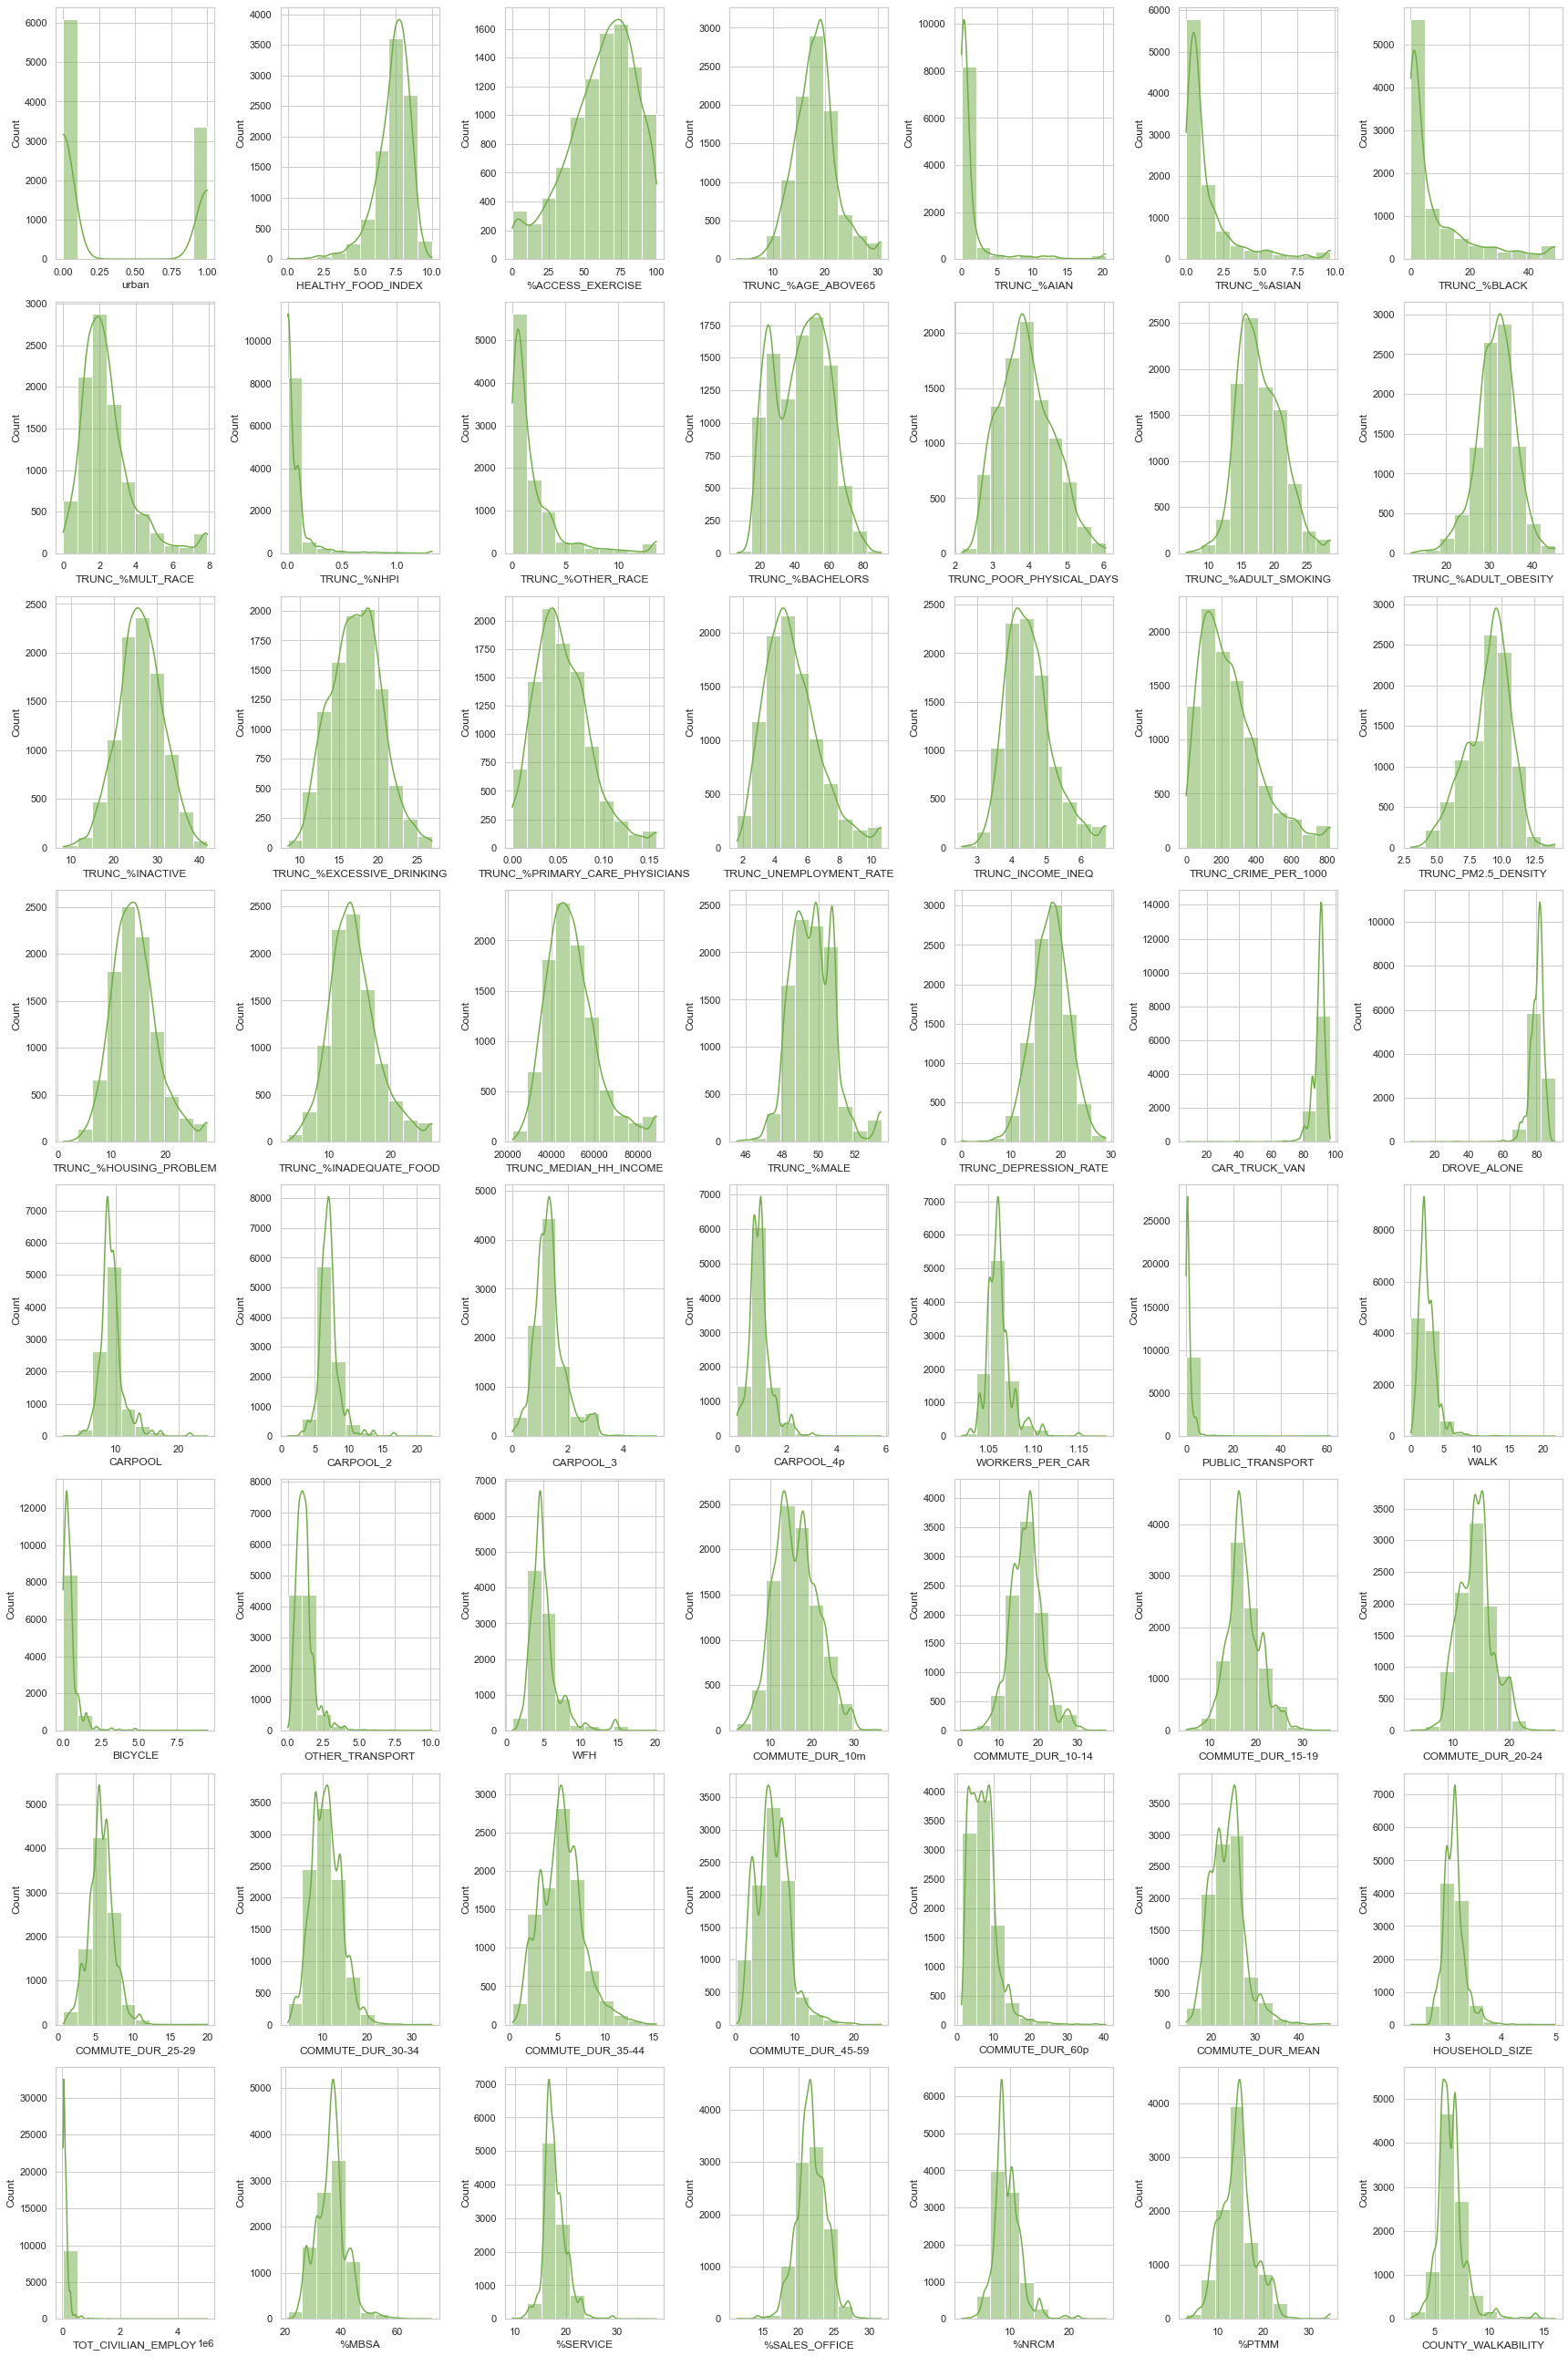

In [164]:
# Generate histograms for numerical data

sns.set(style="whitegrid")  
fig,axs = plt.subplots(8,7, figsize = (24,36))

for i in range(8):
    for j in range(7):
        sns.histplot(data=df, x=numList[7*i+j], kde=True, color="#70AD47", bins=10,ax=axs[i,j])
        
fig.tight_layout()

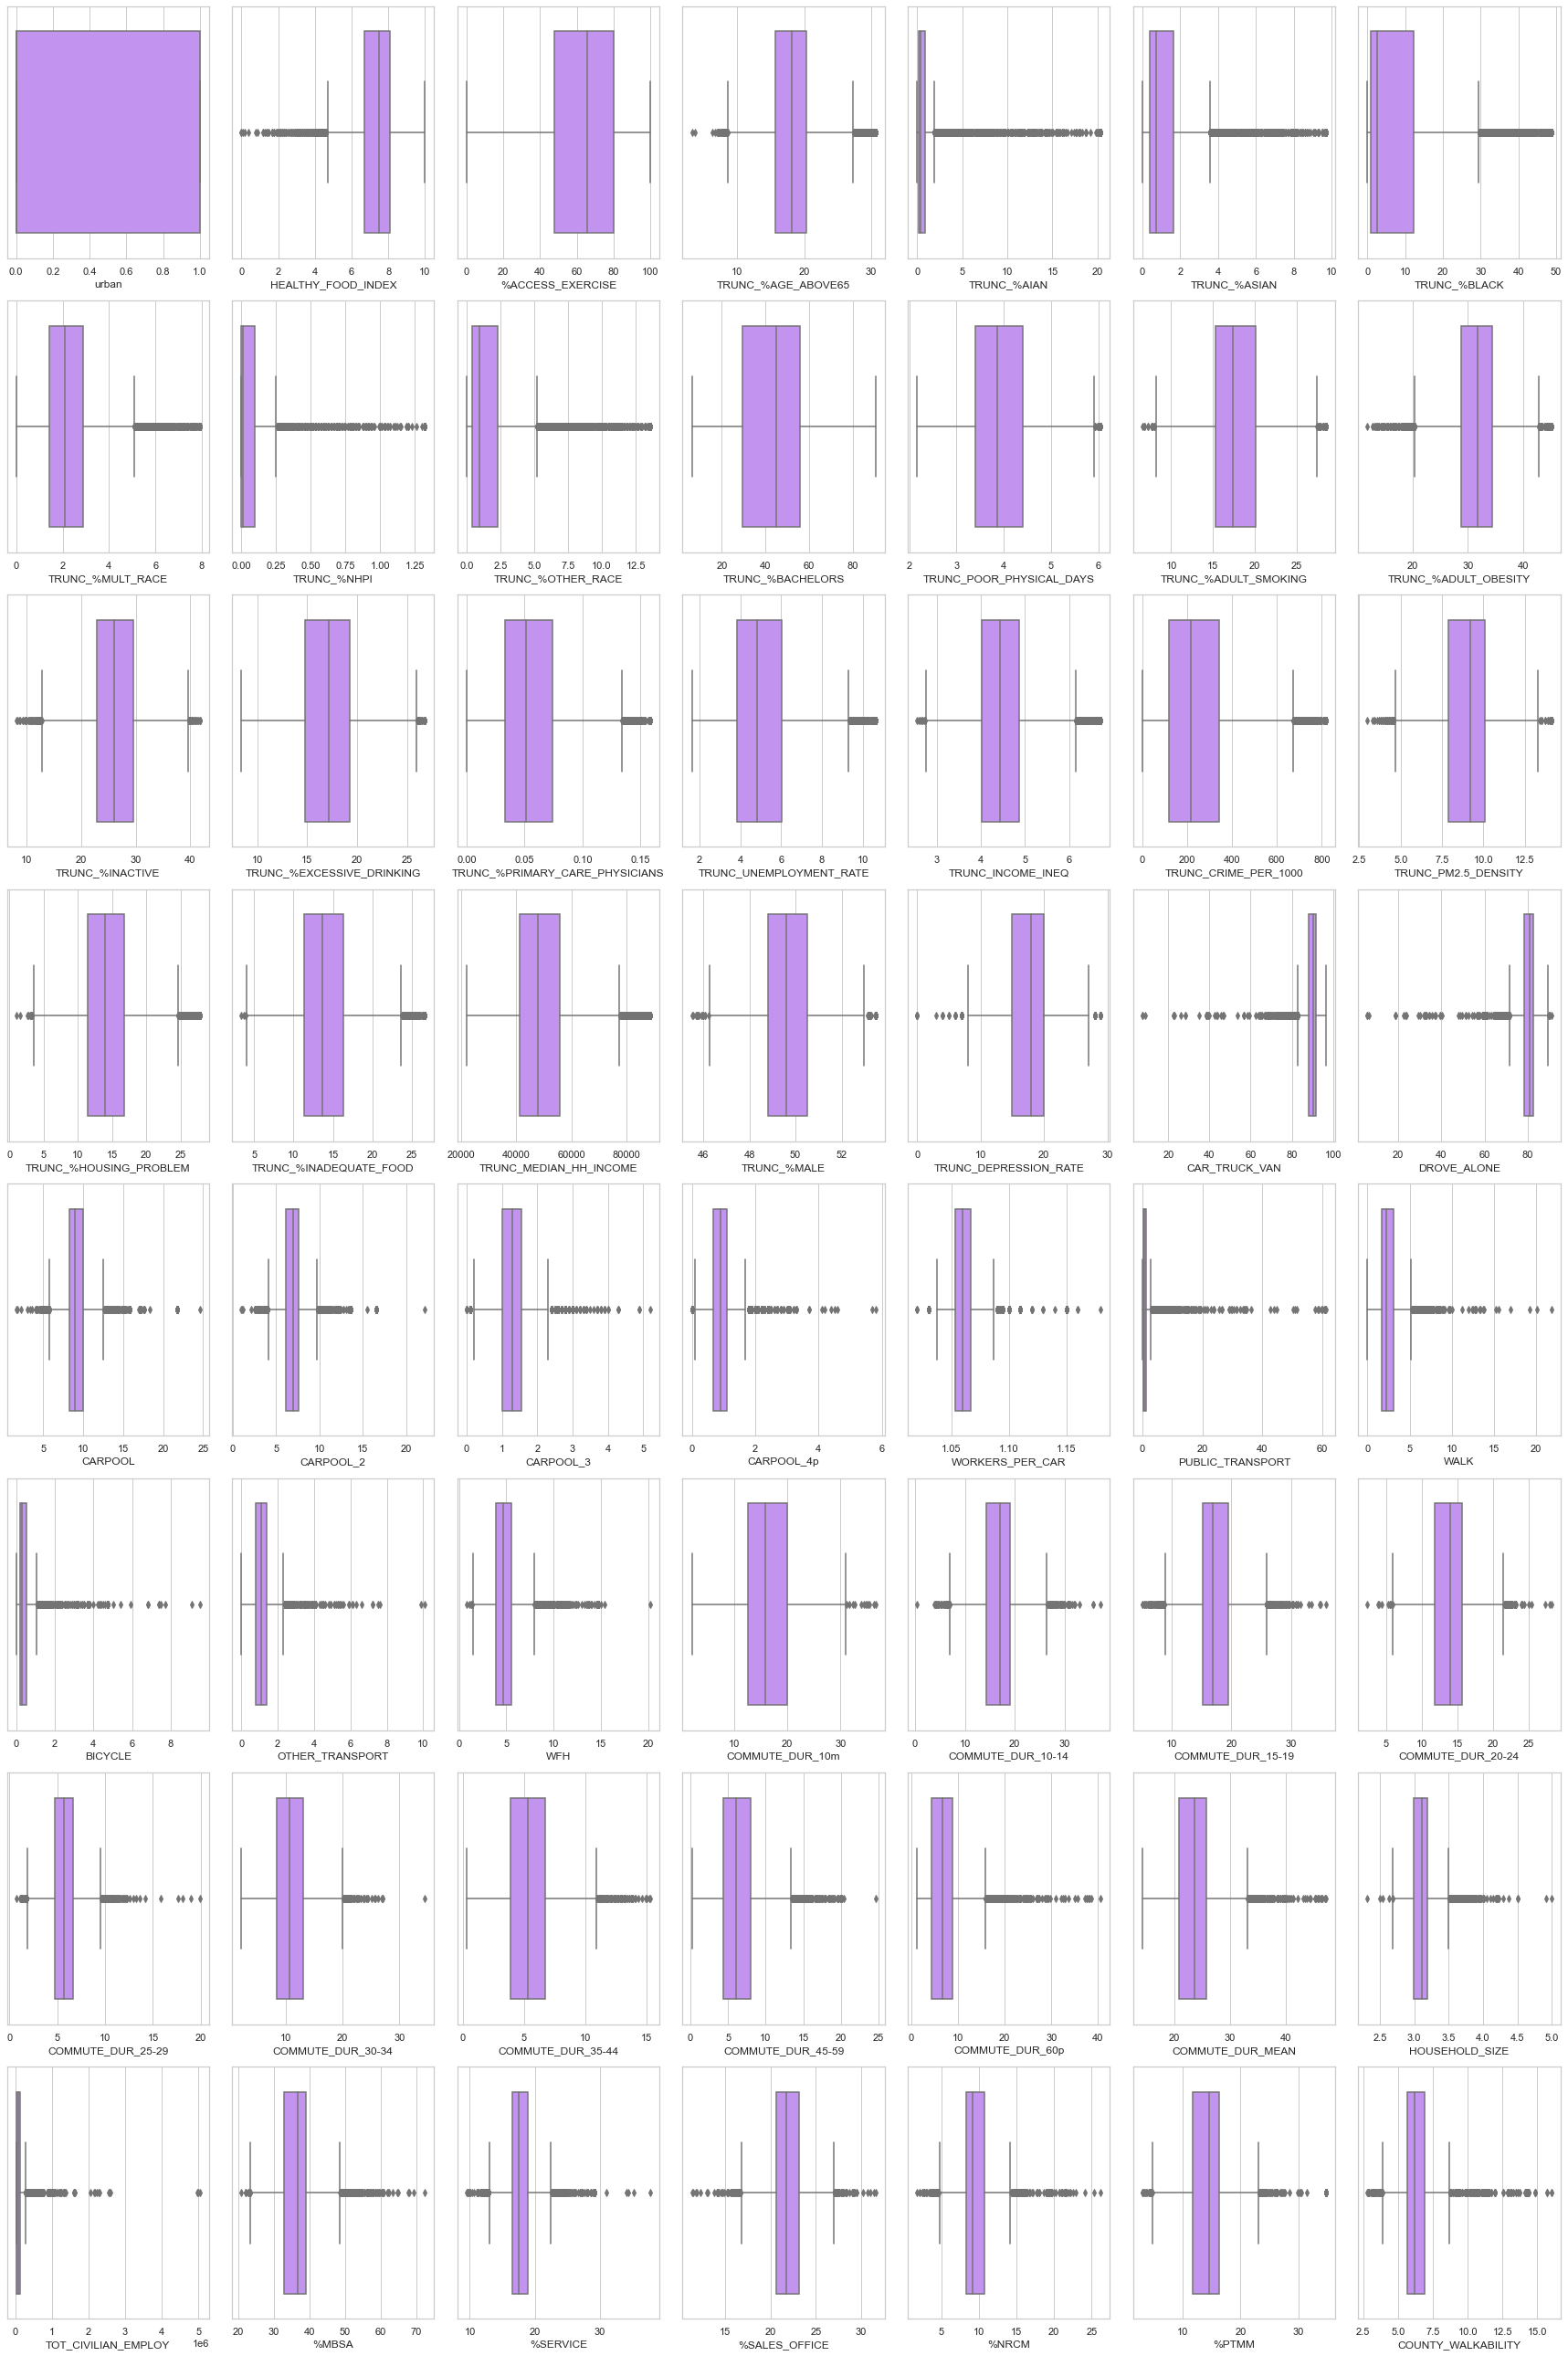

In [165]:
# Generate boxplots for numerical data

''' Generate box plots for numerical data '''

sns.set(style="whitegrid")  
fig,axs = plt.subplots(8,7, figsize = (24,36))
for i in range(8):
    for j in range(7):
        sns.boxplot(data=df, x=numList[7*i+j], color="#C285FF",ax=axs[i,j])
fig.tight_layout()

Most of the distributions look okay (i.e. roughly symmetric) and outliers are reasonably contained.

# Regression and Prediction <a id="6"> </a>

In [166]:
# Load in the right datasets and set up so only the actual features remain

data = pd.read_csv('Apr19AllData.csv')
data = data.drop('Unnamed: 0', axis = 1)
data_features = data.drop(labels = ['fips', 'county', 'STATE', 'year'], axis = 1)

In [167]:
#Splitting data

from sklearn.model_selection import train_test_split

X = data_features.copy()
X = X.drop('ED_VISITS_PER_1000', axis=1)
Y = data_features[['ED_VISITS_PER_1000']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [168]:
#Running decision trees

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 20, min_samples_split = 20)
dt.fit(X_train, Y_train)

dt_train_r2 = dt.score(X_train, Y_train)
print("Decision Tree Train R-squared:", dt_train_r2)
dt_test_r2 = dt.score(X_test, Y_test)
print("Decision Tree Test R-squared:", dt_test_r2)

from sklearn.metrics import mean_squared_error

Y_pred_train = dt.predict(X_train)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = dt.predict(X_test)
Y_pred_test = Y_pred_test.reshape(-1, 1)

dt_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Decision Tree Train RMSE:", dt_train_rmse)
dt_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Decision Tree Test RMSE:", dt_test_rmse)

dt_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("Decision Tree Train MAPE:", dt_train_mape)
dt_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("Decision Tree Test MAPE:", dt_test_mape)

feature_importances = dt.feature_importances_
important_feature_indices = np.argsort(feature_importances)[-10:]
important_features = X.columns[important_feature_indices]

#Printing the most important features
print("\nImportant Features" + ("-" * 25))
for feature in important_features:
    print(feature)

Decision Tree Train R-squared: 0.5508560752092038
Decision Tree Test R-squared: 0.46914150845052505
Decision Tree Train RMSE: 99.20133667551936
Decision Tree Test RMSE: 108.18021101954929
Decision Tree Train MAPE: ED_VISITS_PER_1000    11.458729
dtype: float64
Decision Tree Test MAPE: ED_VISITS_PER_1000    12.807283
dtype: float64

Important Features-------------------------
TOT_CIVILIAN_EMPLOY
OTHER_TRANSPORT
TRUNC_%BLACK
TRUNC_UNEMPLOYMENT_RATE
TRUNC_MEDIAN_HH_INCOME
TRUNC_DEPRESSION_RATE
TRUNC_%ADULT_SMOKING
TRUNC_PM2.5_DENSITY
COMMUTE_DUR_35-44
TRUNC_POOR_PHYSICAL_DAYS


In [169]:
# Linear regression

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

from sklearn.linear_model import LinearRegression

reg = LinearRegression(copy_X=True)
reg.fit(X_train_important, Y_train)

lr_train_r2 = reg.score(X_train_important, Y_train)
print("Linear Regression Train R-squared:", lr_train_r2)
lr_test_r2 = reg.score(X_test_important, Y_test)
print("Linear Regression Test R-squared:", lr_test_r2)

Y_pred_train = reg.predict(X_train_important)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = reg.predict(X_test_important)
Y_pred_test = Y_pred_test.reshape(-1, 1)

lr_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Linear Regression Train RMSE:", lr_train_rmse)
lr_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Linear Regression Test RMSE:", lr_test_rmse)

lr_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("Linear Regression Train MAPE:", lr_train_mape)
lr_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("Linear Regression Test MAPE:", lr_test_mape)

Linear Regression Train R-squared: 0.39688054304315024
Linear Regression Test R-squared: 0.45014845782587165
Linear Regression Train RMSE: 114.95461964758114
Linear Regression Test RMSE: 110.09843954695572
Linear Regression Train MAPE: ED_VISITS_PER_1000    13.598832
dtype: float64
Linear Regression Test MAPE: ED_VISITS_PER_1000    13.319631
dtype: float64


In [170]:
#kNN

train_index = X_train.index
test_index = X_test.index

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_important = X[important_features]
X_train_important, X_test_important = X_important.iloc[train_index], X_important.iloc[test_index]

X_train_important_scaled = scaler.fit_transform(X_train_important)
X_test_important_scaled = scaler.transform(X_test_important)

#Setting up optimal k value
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsRegressor()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='neg_mean_squared_error')
grid.fit(X_train_important_scaled, Y_train)

optimal_k = grid.best_params_['n_neighbors']
print("Optimal k value:", optimal_k)

# Optimized
knn_optimized = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimized.fit(X_train_important_scaled, Y_train)

knn_train_r2 = knn_optimized.score(X_train_important_scaled, Y_train)
print("k-Nearest Neighbors Train R-squared: {:.4f}".format(knn_train_r2))
knn_test_r2 = knn_optimized.score(X_test_important_scaled, Y_test)
print("k-Nearest Neighbors Test R-squared: {:.4f}".format(knn_test_r2))

Y_pred_train = knn_optimized.predict(X_train_important_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = knn_optimized.predict(X_test_important_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

knn_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("kNN Train RMSE: {:.4f}".format(knn_train_rmse))
knn_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("kNN Test RMSE: {:.4f}".format(knn_test_rmse))

knn_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("k-Nearest Neighbors Train MAPE: {:.2f}%".format(knn_train_mape[0]))
knn_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("k-Nearest Neighbors Test MAPE: {:.2f}%".format(knn_test_mape[0]))

Optimal k value: 13
k-Nearest Neighbors Train R-squared: 0.5643
k-Nearest Neighbors Test R-squared: 0.5273
kNN Train RMSE: 97.7078
kNN Test RMSE: 102.0846
k-Nearest Neighbors Train MAPE: 11.36%
k-Nearest Neighbors Test MAPE: 12.17%


In [171]:
# Printing results from the models so far

from tabulate import tabulate

data = {
    'Model': ['Decision Tree', 'Linear Regression', 'k-Nearest Neighbors'],
    'Train R-squared': [dt_train_r2, lr_train_r2, knn_train_r2],
    'Test R-squared': [dt_test_r2, lr_test_r2, knn_test_r2],
    'Train RMSE': [dt_train_rmse, lr_train_rmse, knn_train_rmse],
    'Test RMSE': [dt_test_rmse, lr_test_rmse, knn_test_rmse],
    'Train MAPE': [dt_train_mape, lr_train_mape, knn_train_mape],
    'Test MAPE': [dt_test_mape, lr_test_mape, knn_test_mape],
}

summary_table = pd.DataFrame(data)
summary_table = summary_table.set_index('Model').transpose()

print(tabulate(summary_table, headers='keys', tablefmt='psql', showindex=True, floatfmt=".2f"))

+-----------------+-----------------+---------------------+-----------------------+
|                 |   Decision Tree |   Linear Regression |   k-Nearest Neighbors |
|-----------------+-----------------+---------------------+-----------------------|
| Train R-squared |            0.55 |                0.40 |                  0.56 |
| Test R-squared  |            0.47 |                0.45 |                  0.53 |
| Train RMSE      |           99.20 |              114.95 |                 97.71 |
| Test RMSE       |          108.18 |              110.10 |                102.08 |
| Train MAPE      |           11.46 |               13.60 |                 11.36 |
| Test MAPE       |           12.81 |               13.32 |                 12.17 |
+-----------------+-----------------+---------------------+-----------------------+


Building more complex models now. <a id="7"> </a>

In [172]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(min_samples_split = 20, random_state = 50)
rf.fit(X_train, Y_train)

rf_train_r2 = rf.score(X_train, Y_train)
print("Random Forest Train R-squared:", rf_train_r2)
rf_test_r2 = rf.score(X_test, Y_test)
print("Random Forest Test R-squared:", rf_test_r2)

Y_pred_train = rf.predict(X_train)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = rf.predict(X_test)
Y_pred_test = Y_pred_test.reshape(-1, 1)

rf_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Random Forest Train RMSE:", rf_train_rmse)
rf_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Random Forest Test RMSE:", rf_test_rmse)

rf_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("Random Forest Train MAPE:", rf_train_mape)
rf_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("Random Forest Test MAPE:", rf_test_mape)

C:\Users\24tsagaj\AppData\Local\Temp\ipykernel_11208\1305330212.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Random Forest Train R-squared: 0.832562554710582
Random Forest Test R-squared: 0.6115355468887274
Random Forest Train RMSE: 60.569090684570334
Random Forest Test RMSE: 92.54097739236998
Random Forest Train MAPE: ED_VISITS_PER_1000    6.836224
dtype: float64
Random Forest Test MAPE: ED_VISITS_PER_1000    10.889557
dtype: float64


In [173]:
# Ridge regression
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_scaled, Y_train)

ridge_train_r2 = ridge.score(X_train_scaled, Y_train)
print("Ridge Train R-squared:", ridge_train_r2)
ridge_test_r2 = ridge.score(X_test_scaled, Y_test)
print("Ridge Test R-squared:", ridge_test_r2)

Y_pred_train = ridge.predict(X_train_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = ridge.predict(X_test_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

ridge_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Ridge Train RMSE:", ridge_train_rmse)
ridge_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Ridge Test RMSE:", ridge_test_rmse)

ridge_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train)).values[0] * 100
print("Ridge Train MAPE:", ridge_train_mape)
ridge_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test)).values[0] * 100
print("Ridge Test MAPE:", ridge_test_mape)

Ridge Train R-squared: 0.46735616168152294
Ridge Test R-squared: 0.5106210591388413
Ridge Train RMSE: 108.02971065779347
Ridge Test RMSE: 103.86783473606535
Ridge Train MAPE: 12.538874693800818
Ridge Test MAPE: 12.536949614904044


C:\Users\24tsagaj\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [174]:
#SVR

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma='auto')
svr.fit(X_train_scaled, Y_train)


svr_train_r2 = svr.score(X_train_scaled, Y_train)
print("SVR Train R-squared:", svr_train_r2)
svr_test_r2 = svr.score(X_test_scaled, Y_test)
print("SVR Test R-squared:", svr_test_r2)

Y_pred_train = svr.predict(X_train_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = svr.predict(X_test_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

svr_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("SVR Train RMSE:", svr_train_rmse)
svr_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("SVR Test RMSE:", svr_test_rmse)

svr_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis = 0).values[0] * 100
print("SVR Train MAPE:", svr_train_mape)
svr_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0).values[0] * 100
print("SVR Test MAPE:", svr_test_mape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Train R-squared: 0.6569645479349739
SVR Test R-squared: 0.6125039257523588
SVR Train RMSE: 86.6950421578503
SVR Test RMSE: 92.4255605964806
SVR Train MAPE: 8.340016260916707
SVR Test MAPE: 10.602339200557266


In [175]:
#GBR

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(min_samples_split = 25, max_depth = 7)
gbr.fit(X_train_scaled, Y_train)

gbr_train_r2 = gbr.score(X_train_scaled, Y_train)
print("GBR Train R-squared:", gbr_train_r2)
gbr_test_r2 = gbr.score(X_test_scaled, Y_test)
print("GBR Test R-squared:", gbr_test_r2)

Y_pred_train = gbr.predict(X_train_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = gbr.predict(X_test_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

gbr_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("GBR Train RMSE:", gbr_train_rmse)
gbr_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("GBR Test RMSE:", gbr_test_rmse)

gbr_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis = 0).values[0] * 100
print("GBR Train MAPE:", gbr_train_mape)
gbr_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0).values[0] * 100
print("GBR Test MAPE:", gbr_test_mape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBR Train R-squared: 0.8840230016570904
GBR Test R-squared: 0.6371457807488285
GBR Train RMSE: 50.409302860770715
GBR Test RMSE: 89.43850446884832
GBR Train MAPE: 5.857848365342804
GBR Test MAPE: 10.51611709082696


In [176]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 8) #Started with sqrt and fine tuned but this seemed the best it was gonna get

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

reg_pca = LinearRegression()
reg_pca.fit(X_train_pca, Y_train)

pca_train_r2 = reg_pca.score(X_train_pca, Y_train)
print("PCA Train R-squared:", pca_train_r2)
pca_test_r2 = reg_pca.score(X_test_pca, Y_test)
print("PCA Test R-squared:", pca_test_r2)

Y_pred_train = reg_pca.predict(X_train_pca)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = reg_pca.predict(X_test_pca)
Y_pred_test = Y_pred_test.reshape(-1, 1)

pca_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("PCA Train RMSE:", pca_train_rmse)
pca_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("PCA Test RMSE:", pca_test_rmse)

pca_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis = 0).values[0] * 100
print("PCA Train MAPE:", pca_train_mape)
pca_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0).values[0] * 100
print("PCA Test MAPE:", pca_test_mape)

PCA Train R-squared: 0.3766959801868722
PCA Test R-squared: 0.4249541222207983
PCA Train RMSE: 116.86237898518604
PCA Test RMSE: 112.59255830510581
PCA Train MAPE: 13.934328867832965
PCA Test MAPE: 13.699110107663934


In [177]:
# Printing summary up until now

# Printing results from the models so far

from tabulate import tabulate

data = {
    'Model': ['Decision Tree', 'Linear Regression', 'kNN', 'Random Forest', 'Ridge', 'SVR', 'GBR', 'PCA'],
    'Train R-squared': [dt_train_r2, lr_train_r2, knn_train_r2, rf_train_r2, ridge_train_r2, svr_train_r2, gbr_train_r2, pca_train_r2],
    'Test R-squared': [dt_test_r2, lr_test_r2, knn_test_r2, rf_test_r2, ridge_test_r2, svr_test_r2, gbr_test_r2, pca_test_r2],
    'Train RMSE': [dt_train_rmse, lr_train_rmse, knn_train_rmse, rf_train_rmse, ridge_train_rmse, svr_train_rmse, gbr_train_rmse, pca_train_rmse],
    'Test RMSE': [dt_test_rmse, lr_test_rmse, knn_test_rmse, rf_test_rmse, ridge_test_rmse, svr_test_rmse, gbr_test_rmse, pca_test_rmse],
    'Train MAPE': [dt_train_mape, lr_train_mape, knn_train_mape, rf_train_mape, ridge_train_mape, svr_train_mape, gbr_train_mape, pca_train_mape],
    'Test MAPE': [dt_test_mape, lr_test_mape, knn_test_mape, rf_test_mape, ridge_test_mape, svr_test_mape, gbr_test_mape, pca_test_mape],
}

summary_table = pd.DataFrame(data)
summary_table = summary_table.set_index('Model').transpose()

print(tabulate(summary_table, headers='keys', tablefmt='psql', showindex=True, floatfmt=".2f"))

+-----------------+-----------------+---------------------+--------+-----------------+---------+-------+-------+--------+
|                 |   Decision Tree |   Linear Regression |    kNN |   Random Forest |   Ridge |   SVR |   GBR |    PCA |
|-----------------+-----------------+---------------------+--------+-----------------+---------+-------+-------+--------|
| Train R-squared |            0.55 |                0.40 |   0.56 |            0.83 |    0.47 |  0.66 |  0.88 |   0.38 |
| Test R-squared  |            0.47 |                0.45 |   0.53 |            0.61 |    0.51 |  0.61 |  0.64 |   0.42 |
| Train RMSE      |           99.20 |              114.95 |  97.71 |           60.57 |  108.03 | 86.70 | 50.41 | 116.86 |
| Test RMSE       |          108.18 |              110.10 | 102.08 |           92.54 |  103.87 | 92.43 | 89.44 | 112.59 |
| Train MAPE      |           11.46 |               13.60 |  11.36 |            6.84 |   12.54 |  8.34 |  5.86 |  13.93 |
| Test MAPE       |     

Now trying to group by similarities in predictors to explore some more options and interactions within features present in the data. <a id="8"> </a>

In [178]:
#We'll see if these have any effect
analysis_value = 'ED_VISITS_PER_1000'
environment = ['urban', 'HEALTHY_FOOD_INDEX', 'TRUNC_%PRIMARY_CARE_PHYSICIANS', 'TRUNC_CRIME_PER_1000', 'TRUNC_PM2.5_DENSITY', 
               'TRUNC_%HOUSING_PROBLEM', 'HOUSEHOLD_SIZE', 'COUNTY_WALKABILITY']
exercise = ['%ACCESS_EXERCISE', 'TRUNC_%INACTIVE']
poverty = ['%ACCESS_EXERCISE', 'TRUNC_UNEMPLOYMENT_RATE', 'TRUNC_INCOME_INEQ', 'TRUNC_%INADEQUATE_FOOD', 
           'TRUNC_MEDIAN_HH_INCOME', 'TOT_CIVILIAN_EMPLOY']
age = ['TRUNC_%AGE_ABOVE65']
demographics = ['TRUNC_%AIAN', 'TRUNC_%ASIAN', 'TRUNC_%BLACK',
       'TRUNC_%MULT_RACE', 'TRUNC_%NHPI', 'TRUNC_%OTHER_RACE', 'TRUNC_%MALE']
education = ['TRUNC_%BACHELORS']
health = ['TRUNC_POOR_PHYSICAL_DAYS', 'TRUNC_%ADULT_SMOKING', 'TRUNC_%ADULT_OBESITY', 'TRUNC_%EXCESSIVE_DRINKING',
          'TRUNC_DEPRESSION_RATE']
transport = ['CAR_TRUCK_VAN', 'WORKERS_PER_CAR', 'PUBLIC_TRANSPORT', 'WALK', 'BICYCLE', 'OTHER_TRANSPORT']
work = ['WFH', 'COMMUTE_DUR_10m', 'COMMUTE_DUR_10-14', 'COMMUTE_DUR_15-19', 'COMMUTE_DUR_20-24', 'COMMUTE_DUR_25-29',
        'COMMUTE_DUR_30-34', 'COMMUTE_DUR_35-44', 'COMMUTE_DUR_45-59', 'COMMUTE_DUR_60p', 'COMMUTE_DUR_MEAN', 
        '%MBSA', '%SERVICE', '%SALES_OFFICE', '%NRCM', '%PTMM']

Here the strategy is to go through each of these categories: use polynomial expansion, test for the significance of each expanded feature, then look to see what's best associated with the analysis_value to keep. Start with demographic vars.

In [179]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
X_train_dem = poly.fit_transform(X_train[demographics])

import statsmodels.api as sm

results = sm.OLS(Y_train, X_train_dem).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     49.65
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.15e-302
Time:                        14:16:41   Log-Likelihood:                -41669.
No. Observations:                6615   AIC:                         8.341e+04
Df Residuals:                    6579   BIC:                         8.365e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.267e+04   2267.283      5.587      0.0

In [180]:
# The list of all the significant ones
good_inter = [0,2,3,4,6,7,8,9,10,11,13,17,19,20,21,25,29,30,34,35]
results = sm.OLS(Y_train, X_train_dem[:, good_inter]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     81.02
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.78e-282
Time:                        14:16:41   Log-Likelihood:                -41750.
No. Observations:                6615   AIC:                         8.354e+04
Df Residuals:                    6595   BIC:                         8.368e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.196e+04   2228.507      5.368      0.0

In [181]:
# Look at the corr table
pd.DataFrame(X_train_dem[:, good_inter]).merge(Y_train.reset_index(), left_index = True, right_index = True).corr()

#Corr to BLACK, MALE, (BLACK^2), BLACK*MALE, MALE^2 (|r|>0.2)

0         1         2         3         4         5  \
0                  NaN       NaN       NaN       NaN       NaN       NaN   
1                  NaN  1.000000  0.128202  0.393571  0.328575 -0.132554   
2                  NaN  0.128202  1.000000 -0.040824  0.047622 -0.459880   
3                  NaN  0.393571 -0.040824  1.000000  0.282810 -0.043850   
4                  NaN  0.328575  0.047622  0.282810  1.000000 -0.083156   
5                  NaN -0.132554 -0.459880 -0.043850 -0.083156  1.000000   
6                  NaN -0.068877 -0.126733  0.256643 -0.015750  0.086955   
7                  NaN  0.261945 -0.090913  0.411714  0.092420  0.052873   
8                  NaN  0.005293  0.276052  0.174637  0.024633 -0.128757   
9                  NaN -0.019980 -0.132405  0.548198 -0.012746  0.056001   
10                 NaN  0.016842 -0.093355  0.189691  0.318412  0.047856   
11                 NaN  0.897681  0.076458  0.557423  0.312655 -0.091222   
12                 NaN  0.742189  0.077433  0.300143  0.600343 -0.075667   
13                 NaN  0.999697  0.120607  0.394857  0.328936 -0.118254   
14                 NaN  0.032068  0.945527 -0.104897 -0.015815 -0.384376   
15                 NaN  0.128872  0.999691 -0.039535  0.047548 -0.448750   
16                 NaN  0.388028 -0.056032  0.999067  0.277339 -0.006279   
17                 NaN  0.209201 -0.048573  0.221969  0.098346  0.041697   
18                 NaN  0.327037  0.039856  0.280646  0.999496 -0.066418   
19                 NaN -0.133212 -0.454673 -0.044479 -0.082987  0.999810   
index              NaN -0.015338 -0.047808  0.049446  0.015249  0.005779   
ED_VISITS_PER_1000 NaN -0.097052  0.305577 -0.063236 -0.062050 -0.208613   

                           6         7         8         9  ...        12  \
0                        NaN       NaN       NaN       NaN  ...       NaN   
1                  -0.068877  0.261945  0.005293 -0.019980  ...  0.742189   
2                  -0.126733 -0.090913  0.276052 -0.132405  ...  0.077433   
3                   0.256643  0.411714  0.174637  0.548198  ...  0.300143   
4                  -0.015750  0.092420  0.024633 -0.012746  ...  0.600343   
5                   0.086955  0.052873 -0.128757  0.056001  ... -0.075667   
6                   1.000000  0.522262  0.242393  0.791854  ... -0.050906   
7                   0.522262  1.000000  0.182619  0.623628  ...  0.161062   
8                   0.242393  0.182619  1.000000  0.298182  ...  0.009187   
9                   0.791854  0.623628  0.298182  1.000000  ... -0.026720   
10                  0.563728  0.375075  0.197720  0.397041  ...  0.101403   
11                 -0.003980  0.391029  0.036515  0.096313  ...  0.700568   
12                 -0.050906  0.161062  0.009187 -0.026720  ...  1.000000   
13                 -0.067944  0.265870  0.003968 -0.018390  ...  0.742547   
14                 -0.088205 -0.078794  0.242841 -0.102596  ...  0.010967   
15                 -0.127470 -0.090926  0.276416 -0.132820  ...  0.078049   
16                  0.260016  0.415806  0.170110  0.550971  ...  0.296755   
17                  0.017467  0.166040  0.013165  0.060664  ...  0.161148   
18                 -0.014428  0.093864  0.023076 -0.011783  ...  0.600001   
19                  0.085751  0.051520 -0.127880  0.054426  ... -0.076414   
index               0.012548 -0.023637  0.004718  0.017930  ... -0.027980   
ED_VISITS_PER_1000 -0.088168 -0.115828  0.159627 -0.054140  ... -0.069308   

                          13        14        15        16        17  \
0                        NaN       NaN       NaN       NaN       NaN   
1                   0.999697  0.032068  0.128872  0.388028  0.209201   
2                   0.120607  0.945527  0.999691 -0.056032 -0.048573   
3                   0.394857 -0.104897 -0.039535  0.999067  0.221969   
4                   0.328936 -0.015815  0.047548  0.277339  0.098346   
5                  -0.118254 -0.384376 -0.448750 -0.006279  0.041697

Environment Vars:

In [182]:
poly = PolynomialFeatures()
X_train_env = poly.fit_transform(X_train[environment])
results = sm.OLS(Y_train, X_train_env).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     62.42
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -41311.
No. Observations:                6615   AIC:                         8.271e+04
Df Residuals:                    6571   BIC:                         8.301e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1533.7373    424.431     -3.614      0.0

In [183]:
good_env = [0,2,35,6,7,16,17,20,24,27,28,31,34,35,37,38,39]

results = sm.OLS(Y_train, X_train_env[:, good_env]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     150.8
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -41469.
No. Observations:                6615   AIC:                         8.297e+04
Df Residuals:                    6599   BIC:                         8.308e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1010.3346     54.671     18.480      0.0

In [184]:
pd.DataFrame(X_train_env[:, good_env]).merge(Y_train.reset_index(), left_index = True, right_index = True).corr()
#PM2.5^2, Healthy food ^ 2, PM2.5 * Crime, HHSize * PM2.5

0         1         2         3         4         5  \
0                  NaN       NaN       NaN       NaN       NaN       NaN   
1                  NaN  1.000000  0.104332 -0.237336 -0.161468  0.203117   
2                  NaN  0.104332  1.000000  0.011345 -0.006092  0.297805   
3                  NaN -0.237336  0.011345  1.000000  0.252213  0.248384   
4                  NaN -0.161468 -0.006092  0.252213  1.000000  0.248465   
5                  NaN  0.203117  0.297805  0.248384  0.248465  1.000000   
6                  NaN  0.986837  0.096498 -0.235328 -0.153473  0.208287   
7                  NaN  0.677430  0.788489 -0.147317 -0.104727  0.341988   
8                  NaN  0.123569 -0.071273  0.142798 -0.043773  0.192735   
9                  NaN  0.015572 -0.038945  0.581305  0.083264  0.295274   
10                 NaN  0.127180 -0.050712  0.204217  0.071873  0.225418   
11                 NaN -0.236676  0.366088  0.353239  0.198914  0.242605   
12                 NaN -0.186627  0.120744  0.414640  0.254579  0.354047   
13                 NaN  0.104332  1.000000  0.011345 -0.006092  0.297805   
14                 NaN  0.054793  0.945657  0.091842  0.288437  0.360454   
15                 NaN  0.210703  0.659146  0.160938  0.106500  0.643217   
16                 NaN -0.237242 -0.014341  0.979143  0.283422  0.242243   
index              NaN  0.170765 -0.026257 -0.064390 -0.115343 -0.007843   
ED_VISITS_PER_1000 NaN -0.177369  0.288007  0.120140 -0.066836 -0.069535   

                           6         7         8         9        10  \
0                        NaN       NaN       NaN       NaN       NaN   
1                   0.986837  0.677430  0.123569  0.015572  0.127180   
2                   0.096498  0.788489 -0.071273 -0.038945 -0.050712   
3                  -0.235328 -0.147317  0.142798  0.581305  0.204217   
4                  -0.153473 -0.104727 -0.043773  0.083264  0.071873   
5                   0.208287  0.341988  0.192735  0.295274  0.225418   
6                   1.000000  0.666904  0.129044  0.018175  0.130875   
7                   0.666904  1.000000  0.015245 -0.031249  0.028827   
8                   0.129044  0.015245  1.000000  0.820208  0.937806   
9                   0.018175 -0.031249  0.820208  1.000000  0.874314   
10                  0.130875  0.028827  0.937806  0.874314  1.000000   
11                 -0.257260  0.102027  0.055025  0.232986  0.108533   
12                 -0.203301 -0.041116  0.138527  0.341391  0.200901   
13                  0.096498  0.788489 -0.071273 -0.038945 -0.050712   
14                  0.048677  0.725104 -0.082819 -0.011439 -0.028680   
15                  0.214370  0.611297  0.135755  0.217524  0.174059   
16                 -0.229559 -0.165372  0.146864  0.582604  0.208143   
index               0.178421  0.074226  0.001667 -0.037379 -0.024197   
ED_VISITS_PER_1000 -0.197766  0.097467 -0.153518 -0.073625 -0.139103   

                          11        12        13        14        15  \
0                        NaN       NaN       NaN       NaN       NaN   
1                  -0.236676 -0.186627  0.104332  0.054793  0.210703   
2                   0.366088  0.120744  1.000000  0.945657  0.659146   
3                   0.353239  0.414640  0.011345  0.091842  0.160938   
4                   0.198914  0.254579 -0.006092  0.288437  0.106500   
5                   0.242605  0.354047  0.297805  0.360454  0.643217   
6                  -0.257260 -0.203301  0.096498  0.048677  0.214370   
7                   0.102027 -0.041116  0.788489  0.725104  0.611297   
8                   0.055025  0.138527 -0.071273 -0.082819  0.135755   
9                   0.232986  0.341391 -0.038945 -0.011439  0.217524   
10                  0.108533  0.200901 -0.050712 -0.028680  0.174059   
11                  1.000000  0.885814  0.366088  0.412260  0.323062   
12                  0.885814  1.000000  0.120744  0.190013  0.395231   
13                  0.366088  0.120744  1.000000  0

Economic Metrics:

In [185]:
poly = PolynomialFeatures()
X_train_pov = poly.fit_transform(X_train[poverty])
results = sm.OLS(Y_train, X_train_pov).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     99.60
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -41311.
No. Observations:                6615   AIC:                         8.268e+04
Df Residuals:                    6587   BIC:                         8.287e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -335.4641    144.900     -2.315      0.0

In [186]:
good_pov = [0, 1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,20]

results = sm.OLS(Y_train, X_train_pov[:, good_pov]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     156.3
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -41324.
No. Observations:                6615   AIC:                         8.268e+04
Df Residuals:                    6597   BIC:                         8.281e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -77.4841     95.746     -0.809      0.4

In [187]:
pd.DataFrame(X_train_pov[:, good_pov]).merge(Y_train.reset_index(), left_index = True, right_index = True).corr()
#UNEMP, INEQ, INADEQUATE, UNEMP^2, UNEMP * INEQ, UNEMP * INADEQUATE, INEQ^2

0         1         2         3         4         5  \
0                  NaN       NaN       NaN       NaN       NaN       NaN   
1                  NaN  1.000000 -0.148671 -0.065414 -0.239452  0.419699   
2                  NaN -0.148671  1.000000  0.406165  0.552212 -0.480181   
3                  NaN -0.065414  0.406165  1.000000  0.567820 -0.402153   
4                  NaN -0.239452  0.552212  0.567820  1.000000 -0.632277   
5                  NaN  0.419699 -0.480181 -0.402153 -0.632277  1.000000   
6                  NaN  0.172708 -0.074885  0.057258 -0.049649  0.219360   
7                  NaN  0.969056 -0.143776 -0.039158 -0.230871  0.444788   
8                  NaN  0.704742  0.539406  0.190942  0.154490 -0.008083   
9                  NaN  0.917151 -0.006679  0.305589 -0.023728  0.243970   
10                 NaN  0.755978  0.188979  0.283877  0.399827 -0.051751   
11                 NaN  0.323046 -0.076862  0.061995 -0.077831  0.263712   
12                 NaN -0.156706  0.978691  0.388356  0.525207 -0.461552   
13                 NaN -0.155829  0.932105  0.686723  0.642963 -0.525710   
14                 NaN -0.226698  0.882231  0.533745  0.847509 -0.599003   
15                 NaN  0.189583  0.669857  0.080125  0.054775  0.284933   
16                 NaN -0.068622  0.398429  0.994463  0.562041 -0.390423   
17                 NaN  0.416218 -0.269869  0.207258 -0.326447  0.797725   
index              NaN  0.048537 -0.227124 -0.026001 -0.134211  0.090468   
ED_VISITS_PER_1000 NaN -0.100397  0.388180  0.329860  0.397364 -0.387497   

                           6         7         8         9        10  \
0                        NaN       NaN       NaN       NaN       NaN   
1                   0.172708  0.969056  0.704742  0.917151  0.755978   
2                  -0.074885 -0.143776  0.539406 -0.006679  0.188979   
3                   0.057258 -0.039158  0.190942  0.305589  0.283877   
4                  -0.049649 -0.230871  0.154490 -0.023728  0.399827   
5                   0.219360  0.444788 -0.008083  0.243970 -0.051751   
6                   1.000000  0.221063  0.080428  0.200816  0.114321   
7                   0.221063  1.000000  0.674296  0.897043  0.717470   
8                   0.080428  0.674296  1.000000  0.739652  0.763265   
9                   0.200816  0.897043  0.739652  1.000000  0.833107   
10                  0.114321  0.717470  0.763265  0.833107  1.000000   
11                  0.968194  0.364643  0.196394  0.343188  0.231617   
12                 -0.076953 -0.149270  0.508318 -0.022943  0.160947   
13                 -0.041514 -0.142418  0.473973  0.089706  0.235281   
14                 -0.077078 -0.216314  0.376585 -0.034992  0.294239   
15                  0.104418  0.208456  0.599375  0.196416  0.171372   
16                  0.057462 -0.040856  0.183001  0.300394  0.277384   
17                  0.291815  0.460500  0.118350  0.474860  0.135449   
index               0.010272  0.044231 -0.110729  0.033992 -0.042565   
ED_VISITS_PER_1000 -0.090670 -0.117510  0.163917  0.019702  0.144373   

                          11        12        13        14        15  \
0                        NaN       NaN       NaN       NaN       NaN   
1                   0.323046 -0.156706 -0.155829 -0.226698  0.189583   
2                  -0.076862  0.978691  0.932105  0.882231  0.669857   
3                   0.061995  0.388356  0.686723  0.533745  0.080125   
4                  -0.077831  0.525207  0.642963  0.847509  0.054775   
5                   0.263712 -0.461552 -0.525710 -0.599003  0.284933   
6                   0.968194 -0.076953 -0.041514 -0.077078  0.104418   
7                   0.364643 -0.149270 -0.142418 -0.216314  0.208456   
8                   0.196394  0.508318  0.473973  0.376585  0.599375   
9                   0.343188 -0.022943  0.089706 -0.034992  0.196416   
10                  0.231617  0.160947  0.235281  0.294239  0.171372   
11                  1.000000 -0.081892 -0.04371

Health metrics:

In [188]:
poly = PolynomialFeatures()
X_train_health = poly.fit_transform(X_train[health])
results = sm.OLS(Y_train, X_train_health).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     203.6
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -40853.
No. Observations:                6615   AIC:                         8.175e+04
Df Residuals:                    6594   BIC:                         8.189e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -320.2773    222.969     -1.436      0.1

In [189]:
good_health = [0,1,5,6,9,10,12,13,14,17,18,19]

results = sm.OLS(Y_train, X_train_health[:, good_health]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     364.0
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -40876.
No. Observations:                6615   AIC:                         8.178e+04
Df Residuals:                    6603   BIC:                         8.186e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -667.7353     73.676     -9.063      0.0

In [190]:
pd.DataFrame(X_train_pov[:, good_health]).merge(Y_train.reset_index(), left_index = True, right_index = True).corr()
#DEPRESSION, SMOKING*DRINKING, SMOKING*DEPRESSION, DRINKING^2, DRINKING*DEPRESSION

0         1         2         3         4         5  \
0                  NaN       NaN       NaN       NaN       NaN       NaN   
1                  NaN  1.000000  0.419699  0.172708  0.917151  0.755978   
2                  NaN  0.419699  1.000000  0.219360  0.243970 -0.051751   
3                  NaN  0.172708  0.219360  1.000000  0.200816  0.114321   
4                  NaN  0.917151  0.243970  0.200816  1.000000  0.833107   
5                  NaN  0.755978 -0.051751  0.114321  0.833107  1.000000   
6                  NaN  0.323046  0.263712  0.968194  0.343188  0.231617   
7                  NaN -0.156706 -0.461552 -0.076953 -0.022943  0.160947   
8                  NaN -0.155829 -0.525710 -0.041514  0.089706  0.235281   
9                  NaN  0.128944  0.106724  0.956629  0.184645  0.136476   
10                 NaN -0.068622 -0.390423  0.057462  0.300394  0.277384   
11                 NaN -0.200143 -0.596123 -0.020151  0.096414  0.390195   
index              NaN  0.048537  0.090468  0.010272  0.033992 -0.042565   
ED_VISITS_PER_1000 NaN -0.100397 -0.387497 -0.090670  0.019702  0.144373   

                           6         7         8         9        10  \
0                        NaN       NaN       NaN       NaN       NaN   
1                   0.323046 -0.156706 -0.155829  0.128944 -0.068622   
2                   0.263712 -0.461552 -0.525710  0.106724 -0.390423   
3                   0.968194 -0.076953 -0.041514  0.956629  0.057462   
4                   0.343188 -0.022943  0.089706  0.184645  0.300394   
5                   0.231617  0.160947  0.235281  0.136476  0.277384   
6                   1.000000 -0.081892 -0.043719  0.921370  0.060755   
7                  -0.081892  1.000000  0.921581  0.109798  0.384831   
8                  -0.043719  0.921581  1.000000  0.138913  0.684495   
9                   0.921370  0.109798  0.138913  1.000000  0.130224   
10                  0.060755  0.384831  0.684495  0.130224  1.000000   
11                 -0.038856  0.525497  0.731696  0.080979  0.799691   
index               0.001453 -0.217967 -0.187986 -0.042241 -0.025341   
ED_VISITS_PER_1000 -0.080027  0.339651  0.424066 -0.011845  0.319219   

                          11     index  ED_VISITS_PER_1000  
0                        NaN       NaN                 NaN  
1                  -0.200143  0.048537           -0.100397  
2                  -0.596123  0.090468           -0.387497  
3                  -0.020151  0.010272           -0.090670  
4                   0.096414  0.033992            0.019702  
5                   0.390195 -0.042565            0.144373  
6                  -0.038856  0.001453           -0.080027  
7                   0.525497 -0.217967            0.339651  
8                   0.731696 -0.187986            0.424066  
9                   0.080979 -0.042241           -0.011845  
10                  0.799691 -0.025341            0.319219  
11                  1.000000 -0.103794            0.407272  
index              -0.103794  1.000000           -0.073616  
ED_VISITS_PER_1000  0.407272 -0.073616            1.000000

Transportation features:

In [191]:
poly = PolynomialFeatures()
X_train_trans = poly.fit_transform(X_train[transport])
results = sm.OLS(Y_train, X_train_trans).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     28.55
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.75e-136
Time:                        14:16:41   Log-Likelihood:                -42078.
No. Observations:                6615   AIC:                         8.421e+04
Df Residuals:                    6587   BIC:                         8.440e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.452e+04   8077.662      3.035      0.0

In [192]:
good_trans = [0,1,3,4,5,6,7,8,9,10,16,17,18,19,20,22,24,26,27]

results = sm.OLS(Y_train, X_train_trans[:, good_trans]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     42.12
Date:                Fri, 19 May 2023   Prob (F-statistic):          6.70e-141
Time:                        14:16:41   Log-Likelihood:                -42084.
No. Observations:                6615   AIC:                         8.421e+04
Df Residuals:                    6596   BIC:                         8.434e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.269e+04   1719.654      7.382      0.0

In [193]:
pd.DataFrame(X_train_trans[:, good_trans]).merge(Y_train.reset_index(), left_index = True, right_index = True).corr()
#Nothing :(

0         1         2         3         4         5  \
0                  NaN       NaN       NaN       NaN       NaN       NaN   
1                  NaN  1.000000 -0.802537 -0.617843 -0.446047 -0.273035   
2                  NaN -0.802537  1.000000  0.353450  0.182989  0.114185   
3                  NaN -0.617843  0.353450  1.000000  0.374932  0.077387   
4                  NaN -0.446047  0.182989  0.374932  1.000000  0.173917   
5                  NaN -0.273035  0.114185  0.077387  0.173917  1.000000   
6                  NaN  0.982457 -0.718801 -0.620690 -0.472690 -0.289311   
7                  NaN  0.967991 -0.783607 -0.590186 -0.420409 -0.253264   
8                  NaN -0.696245  0.869058  0.264340  0.170999  0.095491   
9                  NaN -0.401696  0.103410  0.940016  0.311798  0.025128   
10                 NaN -0.450181  0.188418  0.377414  0.999787  0.174300   
11                 NaN -0.279318  0.121110  0.082836  0.175740  0.999616   
12                 NaN -0.676122  0.873702  0.309043  0.114458  0.088943   
13                 NaN -0.713576  0.832318  0.444810  0.196733  0.112752   
14                 NaN -0.676022  0.719393  0.422445  0.367987  0.122083   
15                 NaN -0.630686  0.461877  0.863174  0.328079  0.088561   
16                 NaN -0.629932  0.417551  0.675392  0.385905  0.646262   
17                 NaN -0.393547  0.167479  0.272003  0.794530  0.463655   
18                 NaN -0.219445  0.080241  0.066303  0.173056  0.871510   
index              NaN  0.016350  0.022726 -0.010163 -0.105245  0.025704   
ED_VISITS_PER_1000 NaN  0.113279 -0.055998  0.010997 -0.071687  0.024118   

                           6         7         8         9  ...        11  \
0                        NaN       NaN       NaN       NaN  ...       NaN   
1                   0.982457  0.967991 -0.696245 -0.401696  ... -0.279318   
2                  -0.718801 -0.783607  0.869058  0.103410  ...  0.121110   
3                  -0.620690 -0.590186  0.264340  0.940016  ...  0.082836   
4                  -0.472690 -0.420409  0.170999  0.311798  ...  0.175740   
5                  -0.289311 -0.253264  0.095491  0.025128  ...  0.999616   
6                   1.000000  0.950913 -0.692222 -0.450671  ... -0.294142   
7                   0.950913  1.000000 -0.685380 -0.380249  ... -0.254226   
8                  -0.692222 -0.685380  1.000000  0.123047  ...  0.098779   
9                  -0.450671 -0.380249  0.123047  1.000000  ...  0.027362   
10                 -0.475383 -0.421816  0.173102  0.311244  ...  0.176445   
11                 -0.294142 -0.254226  0.098779  0.027362  ...  1.000000   
12                 -0.539965 -0.655254  0.529774  0.039534  ...  0.096719   
13                 -0.579328 -0.692336  0.513664  0.123987  ...  0.122753   
14                 -0.577181 -0.654090  0.503379  0.145409  ...  0.131044   
15                 -0.574743 -0.606189  0.260492  0.675763  ...  0.096359   
16                 -0.597991 -0.597804  0.260286  0.517768  ...  0.652566   
17                 -0.402136 -0.377881  0.119308  0.189746  ...  0.465208   
18                 -0.229909 -0.203377  0.055747  0.021405  ...  0.871624   
index               0.017785  0.024450  0.036664 -0.006984  ...  0.026543   
ED_VISITS_PER_1000  0.131650  0.130706 -0.088697  0.021952  ...  0.023577   

                          12        13        14        15        16  \
0                        NaN       NaN       NaN       NaN       NaN   
1                  -0.676122 -0.713576 -0.676022 -0.630686 -0.629932   
2                   0.873702  0.832318  0.719393  0.461877  0.417551   
3                   0.309043  0.444810  0.422445  0.863174  0.675392   
4                   0.114458  0.196733  0.367987  0.328079  0.385905   
5                   0.088943  0.112752  0.122083  0.088561  0.646262   
6                  -0.539965 -0.579328 -0.577181 -0.574743 -0.597991   
7                  -0.655254 -0.692336 -0.654090 -0.606189 -0.597804   
8    

Working descriptions:

In [194]:
poly = PolynomialFeatures()
X_train_work = poly.fit_transform(X_train[work])
results = sm.OLS(Y_train, X_train_work).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     16.93
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:41   Log-Likelihood:                -41335.
No. Observations:                6615   AIC:                         8.298e+04
Df Residuals:                    6462   BIC:                         8.402e+04
Df Model:                         152                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.171e+07   7.49e+06      1.564      0.1

In [195]:
good_work = [0,11,133,134,135,136,137]

results = sm.OLS(Y_train, X_train_work[:, good_work]).fit()
print(results.summary())

# None :(

                            OLS Regression Results                            
Dep. Variable:     ED_VISITS_PER_1000   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     138.2
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.54e-165
Time:                        14:16:41   Log-Likelihood:                -42053.
No. Observations:                6615   AIC:                         8.412e+04
Df Residuals:                    6608   BIC:                         8.417e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        525.7508     10.824     48.571      0.0

Done studying interaction effects and here's what we found meaningful:
- BLACK^2
- Black * male
- male^2
- PM2.5 ^ 2
- Healthy food ^ 2
- PM2.5 * crime
- HHSize * Pm2.5
- unemp ^ 2
- unemp * income ineq
- unemp * inadequate food
- ineq^2
- smoke * drink
- smoke * depression
- drink ^ 2
- drink * depression

In [196]:
# Stands for interaction data. Making these realities
int_dat = data_features.copy()

int_dat['%BLACK^2'] = int_dat['TRUNC_%BLACK'] ** 2
int_dat['%BLACK_%MALE'] = int_dat['TRUNC_%BLACK'] * int_dat['TRUNC_%MALE']
int_dat['%MALE^2'] = int_dat['TRUNC_%MALE'] ** 2
int_dat['PM2.5^2'] = int_dat['TRUNC_PM2.5_DENSITY'] ** 2
int_dat['HEALTHY_FOOD_INDEX^2'] = int_dat['HEALTHY_FOOD_INDEX'] ** 2
int_dat['PM2.5_CRIME'] = int_dat['TRUNC_PM2.5_DENSITY'] * int_dat['TRUNC_CRIME_PER_1000']
int_dat['HHSIZE_PM2.5'] = int_dat['HOUSEHOLD_SIZE'] * int_dat['TRUNC_PM2.5_DENSITY']
int_dat['UNEMP^2'] = int_dat['TRUNC_UNEMPLOYMENT_RATE'] ** 2
int_dat['INCOMEINEQ_UNEMPLOYMENT'] = int_dat['TRUNC_INCOME_INEQ'] * int_dat['TRUNC_UNEMPLOYMENT_RATE']
int_dat['UNEMP_INADEQUATEFOOD'] = int_dat['TRUNC_UNEMPLOYMENT_RATE'] * int_dat['TRUNC_%INADEQUATE_FOOD']
int_dat['INCOME_INEQ^2'] = int_dat['TRUNC_INCOME_INEQ'] ** 2
int_dat['SMOKING_DRINKING'] = int_dat['TRUNC_%EXCESSIVE_DRINKING'] * int_dat['TRUNC_%ADULT_SMOKING']
int_dat['SMOKING_DEPRESSION'] = int_dat['TRUNC_%ADULT_SMOKING'] * int_dat['TRUNC_DEPRESSION_RATE']
int_dat['EXCESSIVE_DRINKING^2'] = int_dat['TRUNC_%EXCESSIVE_DRINKING'] ** 2
int_dat['DRINKING_DEPRESSION'] = int_dat['TRUNC_%EXCESSIVE_DRINKING'] * int_dat['TRUNC_DEPRESSION_RATE']

Running all the models again with these new interaction features present. <a id="9"> </a>

In [197]:
X = int_dat.copy()
X = X.drop('ED_VISITS_PER_1000', axis=1)
Y = int_dat[['ED_VISITS_PER_1000']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [198]:
#Running decision trees

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 20, min_samples_split = 20)
dt.fit(X_train, Y_train)

dt_train_r2 = dt.score(X_train, Y_train)
print("Decision Tree Train R-squared:", dt_train_r2)
dt_test_r2 = dt.score(X_test, Y_test)
print("Decision Tree Test R-squared:", dt_test_r2)

from sklearn.metrics import mean_squared_error

Y_pred_train = dt.predict(X_train)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = dt.predict(X_test)
Y_pred_test = Y_pred_test.reshape(-1, 1)

dt_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Decision Tree Train RMSE:", dt_train_rmse)
dt_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Decision Tree Test RMSE:", dt_test_rmse)

dt_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("Decision Tree Train MAPE:", dt_train_mape)
dt_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("Decision Tree Test MAPE:", dt_test_mape)

feature_importances = dt.feature_importances_
important_feature_indices = np.argsort(feature_importances)[-10:]
important_features = X.columns[important_feature_indices]

#Printing important features
print("\nImportant Features" + ("-" * 25))
for feature in important_features:
    print(feature)

Decision Tree Train R-squared: 0.5617254781178196
Decision Tree Test R-squared: 0.45694398777511347
Decision Tree Train RMSE: 98.8069578289222
Decision Tree Test RMSE: 107.28117449977796
Decision Tree Train MAPE: ED_VISITS_PER_1000    11.241344
dtype: float64
Decision Tree Test MAPE: ED_VISITS_PER_1000    12.910468
dtype: float64

Important Features-------------------------
INCOMEINEQ_UNEMPLOYMENT
TOT_CIVILIAN_EMPLOY
TRUNC_%ADULT_SMOKING
TRUNC_MEDIAN_HH_INCOME
TRUNC_%ADULT_OBESITY
CAR_TRUCK_VAN
TRUNC_POOR_PHYSICAL_DAYS
COMMUTE_DUR_35-44
UNEMP_INADEQUATEFOOD
SMOKING_DEPRESSION


In [199]:
# Linear regression

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

from sklearn.linear_model import LinearRegression

reg = LinearRegression(copy_X=True)
reg.fit(X_train_important, Y_train)

lr_train_r2 = reg.score(X_train_important, Y_train)
print("Linear Regression Train R-squared:", lr_train_r2)
lr_test_r2 = reg.score(X_test_important, Y_test)
print("Linear Regression Test R-squared:", lr_test_r2)

Y_pred_train = reg.predict(X_train_important)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = reg.predict(X_test_important)
Y_pred_test = Y_pred_test.reshape(-1, 1)

lr_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Linear Regression Train RMSE:", lr_train_rmse)
lr_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Linear Regression Test RMSE:", lr_test_rmse)

lr_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("Linear Regression Train MAPE:", lr_train_mape)
lr_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("Linear Regression Test MAPE:", lr_test_mape)

Linear Regression Train R-squared: 0.3853072087611138
Linear Regression Test R-squared: 0.4300772439718602
Linear Regression Train RMSE: 117.01552236201628
Linear Regression Test RMSE: 109.9029134326438
Linear Regression Train MAPE: ED_VISITS_PER_1000    13.814459
dtype: float64
Linear Regression Test MAPE: ED_VISITS_PER_1000    13.522168
dtype: float64


In [200]:
#kNN

train_index = X_train.index
test_index = X_test.index

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_important = X[important_features]
X_train_important, X_test_important = X_important.iloc[train_index], X_important.iloc[test_index]

X_train_important_scaled = scaler.fit_transform(X_train_important)
X_test_important_scaled = scaler.transform(X_test_important)

#Setting up optimal k value
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsRegressor()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='neg_mean_squared_error')
grid.fit(X_train_important_scaled, Y_train)

optimal_k = grid.best_params_['n_neighbors']
print("Optimal k value:", optimal_k)

# Optimized
knn_optimized = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimized.fit(X_train_important_scaled, Y_train)

knn_train_r2 = knn_optimized.score(X_train_important_scaled, Y_train)
print("k-Nearest Neighbors Train R-squared: {:.4f}".format(knn_train_r2))
knn_test_r2 = knn_optimized.score(X_test_important_scaled, Y_test)
print("k-Nearest Neighbors Test R-squared: {:.4f}".format(knn_test_r2))

Y_pred_train = knn_optimized.predict(X_train_important_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = knn_optimized.predict(X_test_important_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

knn_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("kNN Train RMSE: {:.4f}".format(knn_train_rmse))
knn_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("kNN Test RMSE: {:.4f}".format(knn_test_rmse))

knn_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("k-Nearest Neighbors Train MAPE: {:.2f}%".format(knn_train_mape[0]))
knn_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("k-Nearest Neighbors Test MAPE: {:.2f}%".format(knn_test_mape[0]))

Optimal k value: 9
k-Nearest Neighbors Train R-squared: 0.5960
k-Nearest Neighbors Test R-squared: 0.5218
kNN Train RMSE: 94.8625
kNN Test RMSE: 100.6690
k-Nearest Neighbors Train MAPE: 10.89%
k-Nearest Neighbors Test MAPE: 12.14%


In [201]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(min_samples_split = 20, random_state = 50)
rf.fit(X_train, Y_train)

rf_train_r2 = rf.score(X_train, Y_train)
print("Random Forest Train R-squared:", rf_train_r2)
rf_test_r2 = rf.score(X_test, Y_test)
print("Random Forest Test R-squared:", rf_test_r2)

Y_pred_train = rf.predict(X_train)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = rf.predict(X_test)
Y_pred_test = Y_pred_test.reshape(-1, 1)

rf_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Random Forest Train RMSE:", rf_train_rmse)
rf_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Random Forest Test RMSE:", rf_test_rmse)

rf_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis=0) * 100
print("Random Forest Train MAPE:", rf_train_mape)
rf_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0) * 100
print("Random Forest Test MAPE:", rf_test_mape)

C:\Users\24tsagaj\AppData\Local\Temp\ipykernel_11208\1305330212.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Random Forest Train R-squared: 0.8370469650901718
Random Forest Test R-squared: 0.6050362535827708
Random Forest Train RMSE: 60.24841725681679
Random Forest Test RMSE: 91.4913052055223
Random Forest Train MAPE: ED_VISITS_PER_1000    6.767171
dtype: float64
Random Forest Test MAPE: ED_VISITS_PER_1000    10.878291
dtype: float64


In [202]:
# Ridge regression
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_scaled, Y_train)

ridge_train_r2 = ridge.score(X_train_scaled, Y_train)
print("Ridge Train R-squared:", ridge_train_r2)
ridge_test_r2 = ridge.score(X_test_scaled, Y_test)
print("Ridge Test R-squared:", ridge_test_r2)

Y_pred_train = ridge.predict(X_train_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = ridge.predict(X_test_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

ridge_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("Ridge Train RMSE:", ridge_train_rmse)
ridge_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Ridge Test RMSE:", ridge_test_rmse)

ridge_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train)).values[0] * 100
print("Ridge Train MAPE:", ridge_train_mape)
ridge_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test)).values[0] * 100
print("Ridge Test MAPE:", ridge_test_mape)

Ridge Train R-squared: 0.49171076622401266
Ridge Test R-squared: 0.5268027311932768
Ridge Train RMSE: 106.40691965768194
Ridge Test RMSE: 100.14339742954297
Ridge Train MAPE: 12.214805561744456
Ridge Test MAPE: 12.004267597386795


C:\Users\24tsagaj\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [203]:
#SVR

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma='auto')
svr.fit(X_train_scaled, Y_train)


svr_train_r2 = svr.score(X_train_scaled, Y_train)
print("SVR Train R-squared:", svr_train_r2)
svr_test_r2 = svr.score(X_test_scaled, Y_test)
print("SVR Test R-squared:", svr_test_r2)

Y_pred_train = svr.predict(X_train_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = svr.predict(X_test_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

svr_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("SVR Train RMSE:", svr_train_rmse)
svr_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("SVR Test RMSE:", svr_test_rmse)

svr_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis = 0).values[0] * 100
print("SVR Train MAPE:", svr_train_mape)
svr_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0).values[0] * 100
print("SVR Test MAPE:", svr_test_mape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Train R-squared: 0.6644911983689832
SVR Test R-squared: 0.6111859243154096
SVR Train RMSE: 86.45027409600932
SVR Test RMSE: 90.77624118123188
SVR Train MAPE: 8.140796023432467
SVR Test MAPE: 10.321060765800297


In [204]:
#GBR

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(min_samples_split = 25, max_depth = 7) #PENALTY -- overfitting (lambda) 3 on cv
gbr.fit(X_train_scaled, Y_train)

gbr_train_r2 = gbr.score(X_train_scaled, Y_train)
print("GBR Train R-squared:", gbr_train_r2)
gbr_test_r2 = gbr.score(X_test_scaled, Y_test)
print("GBR Test R-squared:", gbr_test_r2)

Y_pred_train = gbr.predict(X_train_scaled)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = gbr.predict(X_test_scaled)
Y_pred_test = Y_pred_test.reshape(-1, 1)

gbr_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("GBR Train RMSE:", gbr_train_rmse)
gbr_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("GBR Test RMSE:", gbr_test_rmse)

gbr_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis = 0).values[0] * 100
print("GBR Train MAPE:", gbr_train_mape)
gbr_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0).values[0] * 100
print("GBR Test MAPE:", gbr_test_mape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBR Train R-squared: 0.8947185526127314
GBR Test R-squared: 0.6248467202145693
GBR Train RMSE: 48.427309245551385
GBR Test RMSE: 89.16729258000439
GBR Train MAPE: 5.642578427400959
GBR Test MAPE: 10.446054121565274


In [205]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 8) #Started with sqrt and fine tuned but this seemed the best it was gonna get

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

reg_pca = LinearRegression()
reg_pca.fit(X_train_pca, Y_train)

pca_train_r2 = reg_pca.score(X_train_pca, Y_train)
print("PCA Train R-squared:", pca_train_r2)
pca_test_r2 = reg_pca.score(X_test_pca, Y_test)
print("PCA Test R-squared:", pca_test_r2)

Y_pred_train = reg_pca.predict(X_train_pca)
Y_pred_train = Y_pred_train.reshape(-1, 1)

Y_pred_test = reg_pca.predict(X_test_pca)
Y_pred_test = Y_pred_test.reshape(-1, 1)

pca_train_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
print("PCA Train RMSE:", pca_train_rmse)
pca_test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("PCA Test RMSE:", pca_test_rmse)

pca_train_mape = np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis = 0).values[0] * 100
print("PCA Train MAPE:", pca_train_mape)
pca_test_mape = np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0).values[0] * 100
print("PCA Test MAPE:", pca_test_mape)

PCA Train R-squared: 0.3794692793728828
PCA Test R-squared: 0.41425415431866164
PCA Train RMSE: 117.56987573375201
PCA Test RMSE: 111.41811711729777
PCA Train MAPE: 14.004713492762654
PCA Test MAPE: 13.640809128622196


In [206]:
# Printing summary up until now

from tabulate import tabulate

data = {
    'Model': ['Decision Tree', 'Linear Regression', 'kNN', 'Random Forest', 'Ridge', 'SVR', 'GBR', 'PCA'],
    'Train R-squared': [dt_train_r2, lr_train_r2, knn_train_r2, rf_train_r2, ridge_train_r2, svr_train_r2, gbr_train_r2, pca_train_r2],
    'Test R-squared': [dt_test_r2, lr_test_r2, knn_test_r2, rf_test_r2, ridge_test_r2, svr_test_r2, gbr_test_r2, pca_test_r2],
    'Train RMSE': [dt_train_rmse, lr_train_rmse, knn_train_rmse, rf_train_rmse, ridge_train_rmse, svr_train_rmse, gbr_train_rmse, pca_train_rmse],
    'Test RMSE': [dt_test_rmse, lr_test_rmse, knn_test_rmse, rf_test_rmse, ridge_test_rmse, svr_test_rmse, gbr_test_rmse, pca_test_rmse],
    'Train MAPE': [dt_train_mape, lr_train_mape, knn_train_mape, rf_train_mape, ridge_train_mape, svr_train_mape, gbr_train_mape, pca_train_mape],
    'Test MAPE': [dt_test_mape, lr_test_mape, knn_test_mape, rf_test_mape, ridge_test_mape, svr_test_mape, gbr_test_mape, pca_test_mape],
}

summary_table = pd.DataFrame(data)
summary_table = summary_table.set_index('Model').transpose()

print(tabulate(summary_table, headers='keys', tablefmt='psql', showindex=True, floatfmt=".2f"))

+-----------------+-----------------+---------------------+--------+-----------------+---------+-------+-------+--------+
|                 |   Decision Tree |   Linear Regression |    kNN |   Random Forest |   Ridge |   SVR |   GBR |    PCA |
|-----------------+-----------------+---------------------+--------+-----------------+---------+-------+-------+--------|
| Train R-squared |            0.56 |                0.39 |   0.60 |            0.84 |    0.49 |  0.66 |  0.89 |   0.38 |
| Test R-squared  |            0.46 |                0.43 |   0.52 |            0.61 |    0.53 |  0.61 |  0.62 |   0.41 |
| Train RMSE      |           98.81 |              117.02 |  94.86 |           60.25 |  106.41 | 86.45 | 48.43 | 117.57 |
| Test RMSE       |          107.28 |              109.90 | 100.67 |           91.49 |  100.14 | 90.78 | 89.17 | 111.42 |
| Train MAPE      |           11.24 |               13.81 |  10.89 |            6.77 |   12.21 |  8.14 |  5.64 |  14.00 |
| Test MAPE       |     

# "Cluster Regression" <a id="10"> </a>
After several iterations, we came up with a model that looks something like this:

In [207]:
# These pop up and get annoying so we will suppress
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [208]:
# Read in and do some preliminary work

dataset = pd.read_csv('DATASET2.csv')

X = dataset.copy()
X = X.drop(labels = ['ED_VISITS_PER_1000', 'HOSPITALIZATION_PER_1000'], axis=1)
Y = dataset[['ED_VISITS_PER_1000']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [209]:
# This is a class that organizes all the models for each of the clusters and does a bunch of help in various processes

from sklearn.mixture import GaussianMixture  #Cluster technique

class ClusterRegression:
    def __init__(self):
        self.gmm = None
        self.regs = []
        self.scaler = StandardScaler()
    
    #This optimizes the clustering technique based on some sort of training data
    def optimize(self, X):
        sc = StandardScaler()
        x = sc.fit_transform(X)
        gmm = GaussianMixture()
        params = {
            'n_components': [7, 8, 9],
            'covariance_type': ['full'],
            'init_params': ['kmeans'],
            'n_init': [2, 3, 4, 5],
            'max_iter': [100, 200, 300]
        }
        grid_search = GridSearchCV(gmm, param_grid=params,cv = 3)
        grid_search.fit(x)

        print(grid_search.best_params_)
        
    """
    This takes in a training feature set in for x
    This takes in a training response variable set for Y
    The rest of the parameters are inputs to GaussianMixture which would be optimized and returned visually above.
    """
    def train_models(self, x, Y, param, iter, comp, cov, init):
        self.gmm = GaussianMixture(init_params = param, max_iter = iter, n_components=comp, 
                                   covariance_type = cov, n_init = init, random_state = 42)
        X = self.scaler.fit_transform(x)
        cluster_assignments = self.gmm.fit_predict(X)
        data_idx = []
        for i in range(comp):
            data_idx.append([])
            
        for i in range(len(cluster_assignments)):
            cluster = cluster_assignments[i]
            lst = data_idx[cluster]
            lst.append(x.index[i])
                
        for i in range(comp):
            curr_x = x.loc[data_idx[i]]
            curr_y = Y.loc[data_idx[i]]
            self.regs.append(GradientBoostingRegressor(min_samples_split = 25, 
                                                       max_depth = 5, 
                                                       learning_rate = 0.1,
                                                       n_estimators = 300,
                                                       random_state = 42))

            self.regs[i].fit(curr_x, curr_y)
            
        return data_idx
    
    # This method only returns the cluster assignments for a given feature set
    def get_clusters(self, X):
        return self.gmm.predict(self.scaler.transform(X))
    
    # The methods below are getters for all of the components in the ClusterRegression object
    def get_classifier(self):
        return self.gmm
    
    def get_scaler(self):
        return self.scaler
    
    def get_models(self):
        return self.regs
    
    # This does the whole process of prediction. It assigns clusters to the testing set and returns the predictions
    # from the corresponding model
    def predict(self, X):
        cluster_assignments = self.gmm.predict(self.scaler.transform(X))
        ys = []
        for i in range(len(cluster_assignments)):
            cluster = cluster_assignments[i]
            reg = self.regs[cluster]
            ys.append(reg.predict(X.iloc[i:i+1]))
        return np.array(ys)
    
    # Calculates the r^2 error metric
    def r2(self, actual, predicted):
        mean = np.mean(actual)
        sst = 0
        ssr = 0
        for i in range(len(actual)):
            data = actual.iloc[i].values[0]
            sst += (data - mean) ** 2
            ssr += (data - predicted[i]) ** 2
        return (1 - (ssr / sst))
    
    # This makes an overall residual plot given an X set and its corresponding Y set
    def resid_plot(self, X, Y):
        y_hat = self.predict(X).reshape(1,-1)
        y_actual = Y.values.reshape(1,-1)
        residuals = y_actual - y_hat
        plt.scatter(y_hat, residuals)
        plt.axhline(y=0, color='r', linestyle='-')
        plt.title('Residual Plot')
        plt.xlabel('y_hat')
        plt.ylabel('Residual')
        plt.show()
    
    # This prints out the r2, RMSE, and MAPE error metrics
    def error_metrics(self, X_train, Y_train, X_test, Y_test):
        Y_pred_train = self.predict(X_train).reshape(-1,1)
        Y_pred_test = self.predict(X_test).reshape(-1,1)
        
        print("Train R-squared:", self.r2(Y_train, Y_pred_train))
        print("Test R-squared:", self.r2(Y_test, Y_pred_test))

        print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
        print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

        print("Train MAPE:", np.mean(np.abs((Y_train - Y_pred_train) / Y_train), axis = 0).values[0] * 100)
        print("Test MAPE:", np.mean(np.abs((Y_test - Y_pred_test) / Y_test), axis=0).values[0] * 100)

In [210]:
# l means the features to drop
l = ['TRUNC_%MULT_RACE', 'TRUNC_%NHPI', 'TRUNC_%MALE', 'DROVE_ALONE', 'CARPOOL', 'CARPOOL_2', 'CARPOOL_3', 'CARPOOL_4p',
     'WORKERS_PER_CAR', 'WALK', 'BICYCLE', 'COMMUTE_DUR_10m', 'COMMUTE_DUR_30-34', 'COMMUTE_DUR_MEAN', '%MBSA', '%SERVICE',
     '%SALES_OFFICE', '%PTMM', '%BLACK^2', '%MALE^2', 'HHSIZE_PM2.5', 'EXCESSIVE_DRINKING^2',
     'OTHER_TRANSPORT', 'COMMUTE_DUR_15-19', 'COMMUTE_DUR_35-44', '%NRCM', 'COMMUTE_DUR_20-24','COMMUTE_DUR_25-29',
     'HEALTHY_FOOD_INDEX', 'WFH', 'CAR_TRUCK_VAN']
X_adj = X.drop(labels = l, axis = 1)
X_train_adj = X_train.drop(labels = l, axis = 1)
X_test_adj = X_test.drop(labels = l, axis = 1)

In [211]:
# Make and train a ClusterRegression object

cr = ClusterRegression()
num_c = 5
data_clusters = cr.train_models(X_train_adj, Y_train, 'kmeans', 100, num_c, 'full', 5)

In [212]:
# Get r2, RMSE, MAPE

cr.error_metrics(X_train_adj, Y_train, X_test_adj, Y_test)

Train R-squared: ED_VISITS_PER_1000    0.980851
dtype: float64
Test R-squared: ED_VISITS_PER_1000    0.638062
dtype: float64
Train RMSE: 20.579615680817977
Test RMSE: 87.76515065987023
Train MAPE: 2.2371896845764914
Test MAPE: 10.029046421174954


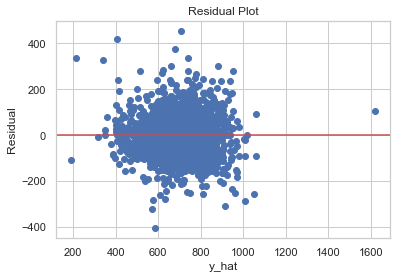

In [213]:
# Get overall residual plot

cr.resid_plot(X_test_adj, Y_test)

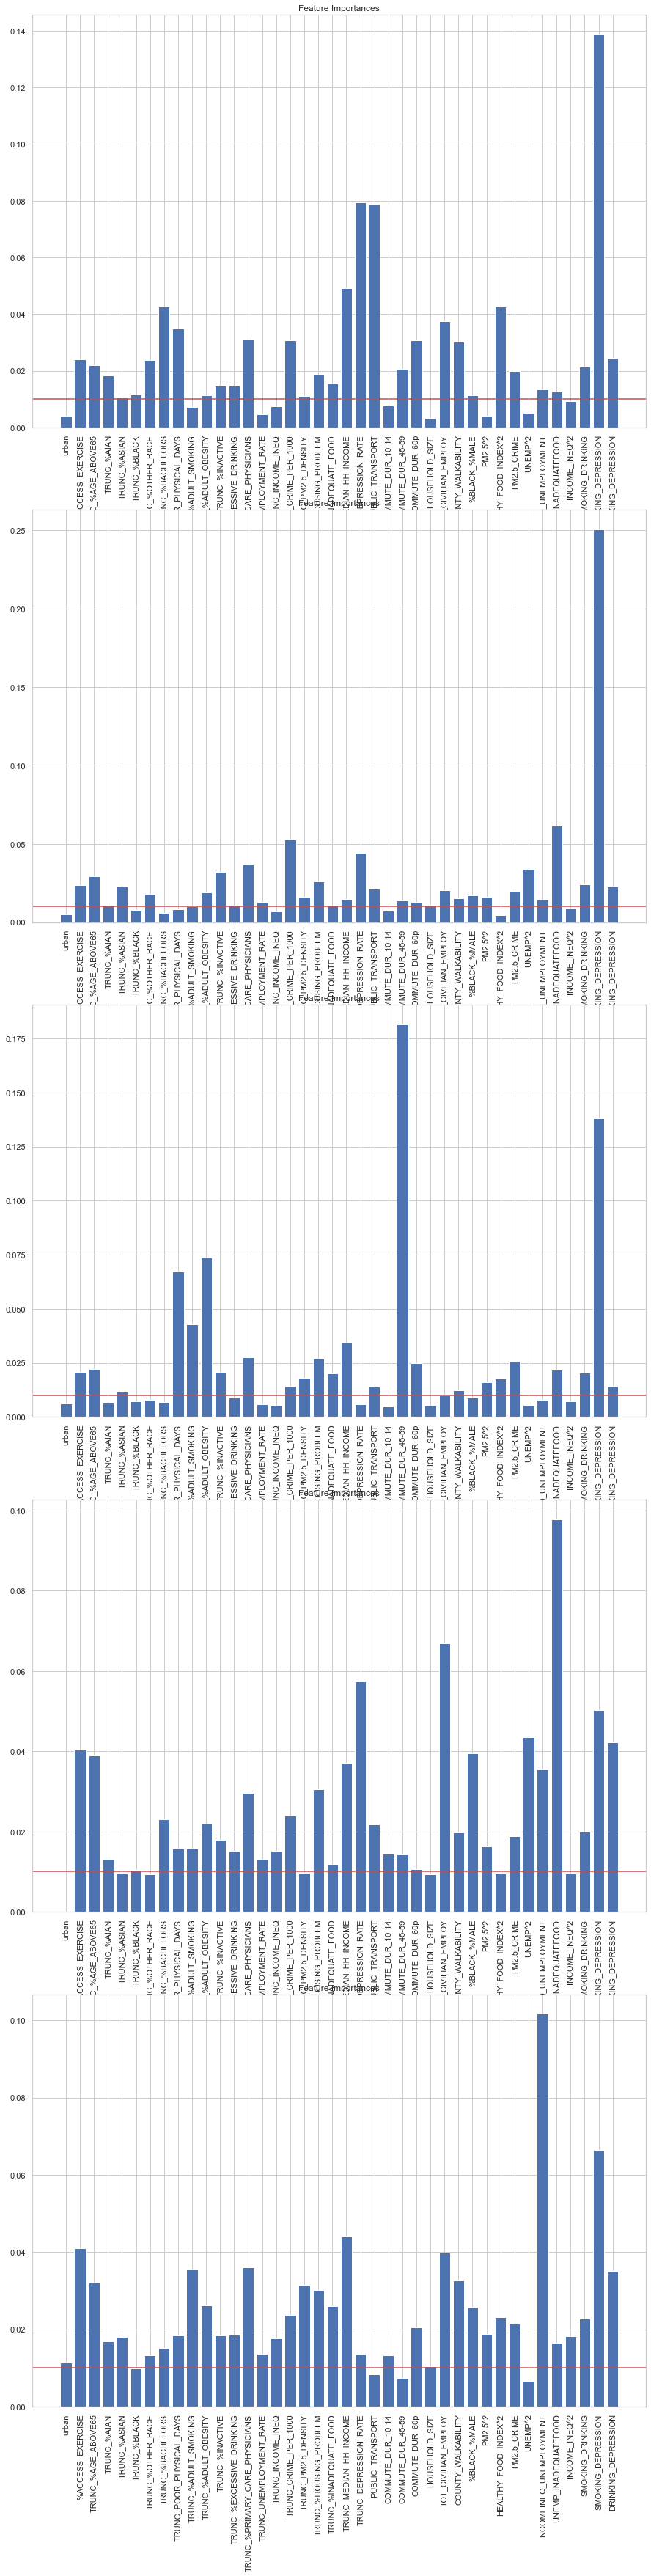

In [214]:
# Look at how important each feature was in each cluster (each separate graph is a cluster)

models = cr.get_models()
fig, ax = plt.subplots(num_c, 1, figsize=(15, 60))
for i in range(len(models)):
    model = models[i]
    importances = model.feature_importances_
    ax[i].bar(range(len(importances)), importances)
    ax[i].set_xticks(range(len(importances)))
    ax[i].set_xticklabels(X_train_adj.columns, rotation=90)
    ax[i].set_title('Feature Importances')
    ax[i].axhline(y=0.01, color='r', linestyle='-')

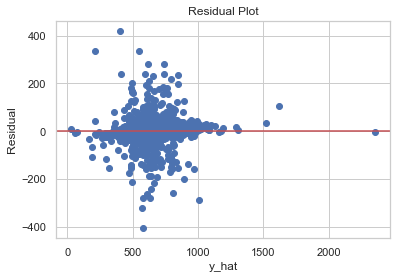

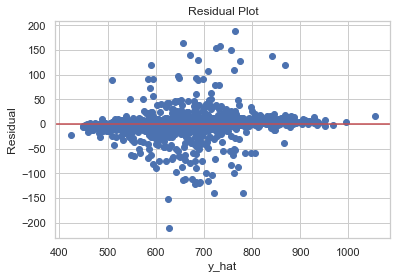

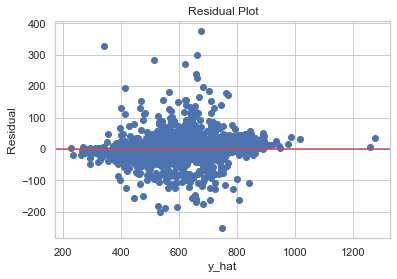

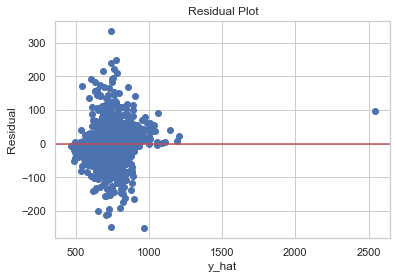

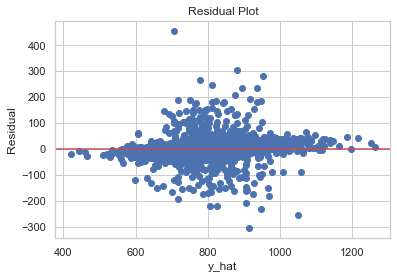

In [215]:
# Look at the residual plots of each cluster to see what's going on

models = cr.get_models()
def resid_plot(model, X, Y):
    y_hat = model.predict(X).reshape(1,-1)
    y_actual = Y.values.reshape(1,-1)
    residuals = y_actual - y_hat
    plt.scatter(y_hat, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residual Plot')
    plt.xlabel('y_hat')
    plt.ylabel('Residual')
    plt.show()
    
clusters = cr.get_clusters(X_adj)
data_clusters = []
for i in range(num_c):
    data_clusters.append([])
for i in range(len(clusters)):
    data_clusters[clusters[i]].append(i)

for i in range(len(models)):
    indices = data_clusters[i] #??
    resid_plot(models[i], X_adj.iloc[indices], Y.iloc[indices])

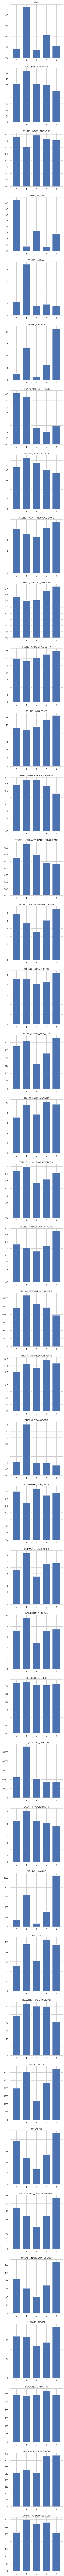

In [216]:
# Look at the means of each feature in each cluster to characterize the clusters

gmm = cr.get_classifier()
scaler = cr.get_scaler()
means = pd.DataFrame(scaler.inverse_transform(gmm.means_)) #means_, weights_, covariances_
means.columns = X_train_adj.columns

fig, ax = plt.subplots(len(means.columns), 1, figsize=(5, 250))
for i in range(len(means.columns)):
    ax[i].bar(range(num_c), means.iloc[:,i])
    ax[i].set_xticks(range(num_c))
    ax[i].set_xticklabels(range(num_c))
    ax[i].set_title(means.columns[i])

<Axes: >

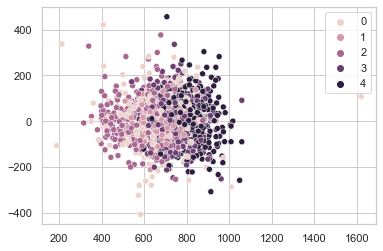

In [217]:
# Look at a residual plot as the combined effect of all the clusters

y_hat = cr.predict(X_test_adj).reshape(1,-1)
y_actual = Y_test.values.reshape(1,-1)
residuals = y_actual - y_hat
sns.scatterplot(x = y_hat.reshape(-1), y = residuals.reshape(-1), hue = gmm.predict(scaler.transform(X_test_adj)).reshape(-1))

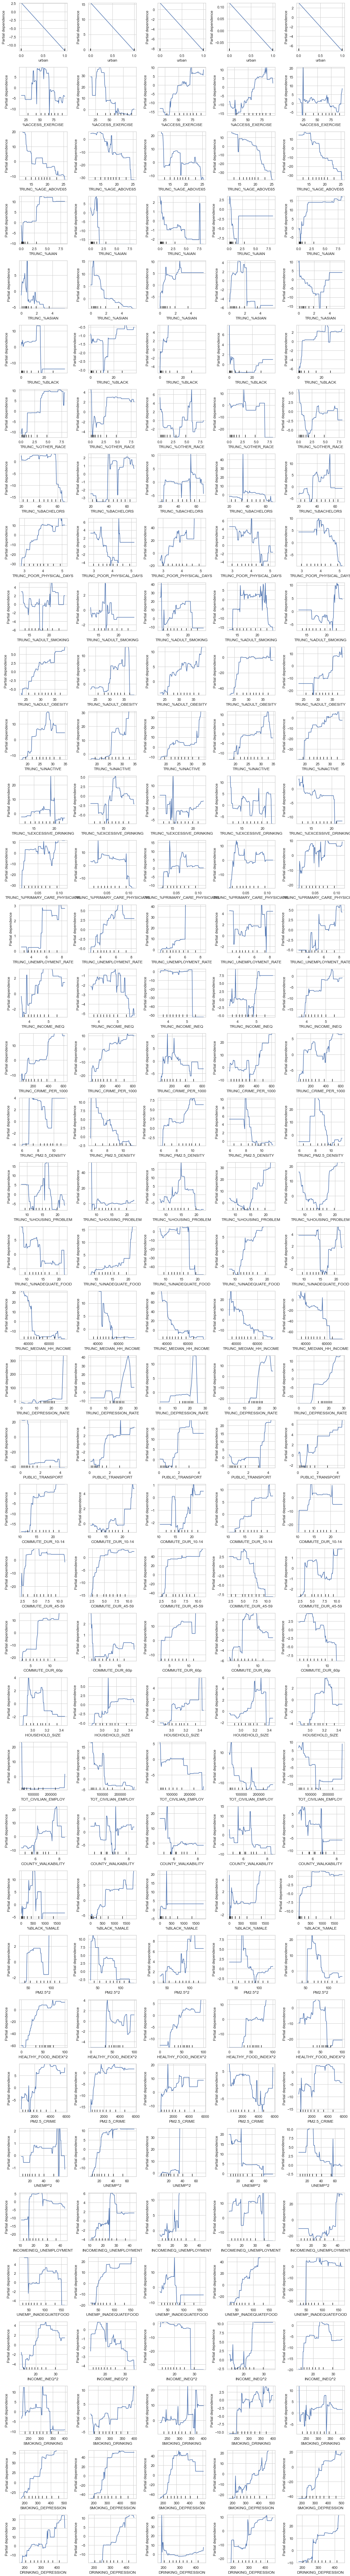

In [218]:
# See general trend of how each feature affects the target value

from sklearn.inspection import plot_partial_dependence
cols = len(X.columns) - len(l)
fig, ax = plt.subplots(cols,num_c, figsize=(15,110))
for i in range(cols):
    for j in range(num_c):
        plot_partial_dependence(models[j], X_adj, features=[i], ax=ax[i, j])
        ax[i, j].set_xlabel('Feature Value')
        ax[i, j].set_ylabel('Predicted Target')

plt.tight_layout()
plt.show()

Note: not everything was replicated perfectly in this combined file. The best results we got are preserved in this [file](https://drive.google.com/file/d/1Ww0tgvAA2zFqnR9aNIuowKEy7KFusfnn/view?usp=share_link) and the full data dictionary can be accessed [here](https://docs.google.com/spreadsheets/d/1sHl1Vx2Nvn-k71G-729xuPiXqvgpDRSQshuwBNJ7To0/edit?usp=share_link). These should cover up any missing information not covered in this notebook.